In [1]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached numpy-2.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstalled scikit-learn-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0

In [2]:
!pip install scikit-learn==1.4

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.4.0-1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached scikit_learn-1.4.0-1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.

In [3]:
import io
from pprint import pprint
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, StackingRegressor
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from tabulate import tabulate

# If you need python-pptx, you can install it in your local environment
# !pip install python-pptx

#############################
# Step 1: Load the Datasets #
#############################

# Replace 'ecological_data.xlsx' with the path to your ecological dataset
df_ecological = pd.read_excel('Ecological_characterization_Hanna_Markle.xlsx')
print("\n--- First Few Rows of the Ecological Dataset ---\n")
print(df_ecological.head())

# Exploratory Data Analysis function
def explore_data(data):
    """Perform exploratory data analysis on the dataset."""
    print("\n--- Dataset Overview ---\n")
    print(data.info())
    print("\n--- Summary Statistics ---\n")
    print(data.describe())

# Perform EDA
explore_data(df_ecological)

# Read the OTUs associated with pathogens
df_gyrb = pd.read_excel('gyrb_fragment_dataset1.xlsx')  # Replace with correct filename/path
print("\n--- First Few Rows of the Pathogen-Associated OTUs ---\n")
print(df_gyrb.head())

# Read the relative abundance info
df_otu_abundance = pd.read_excel('Leaf_and_Root_OTU_Relative_Abundance.xlsx')  # Replace with correct filename/path
print("\n--- First Few Rows of the OTU Abundance Data ---\n")
print(df_otu_abundance.head())

#################################
# Additional Data Processing    #
#################################
# You can now continue with any preprocessing, merging, modeling, etc.

# Example: Print shapes to verify successful loading
print("\nDataset shapes:")
print("Ecological data shape:", df_ecological.shape)
# print("Pathogen OTUs data shape:", df_gyrb.shape)
print("OTU Abundance data shape:", df_otu_abundance.shape)



--- First Few Rows of the Ecological Dataset ---

  population   latitude  longitude  Elevation        MAT      MCMT  \
0     AMBR-A  43.733229   1.823869        136  10.763636  0.154545   
1     ANGE-A  43.911999   1.656649        169  10.536364  0.081818   
2     ANGE-B  43.912140   1.656855        168  10.545455  0.081818   
3     AULO-A  43.190552   0.815774        339  10.081818 -0.072727   
4     AURE-B  43.477976   1.452214        197  10.609091  0.190909   

       PPT_wt     PPT_sp     PPT_sm      PPT_at  ...  plant_OTU203  \
0  128.909091  70.181818  77.636364  171.545455  ...             0   
1  127.272727  70.636364  85.727273  172.181818  ...             0   
2  127.272727  70.636364  85.727273  172.181818  ...             0   
3  117.090909  75.454545  92.181818  186.363636  ...             0   
4  114.000000  73.181818  83.363636  166.363636  ...             0   

   plant_OTU204  plant_OTU216  plant_OTU223  plant_OTU234  plant_richness  \
0             0             0 

In [14]:
import pandas as pd

# 1. Load your existing dataframes (assuming they’re already in memory)
# df_ecological  # your original ecological DataFrame
# df_otu_abundance  # your second DataFrame with only OTU columns

# 2. Make an intermediate copy
df_intermediate = df_ecological.copy()

# 3. Align on 'population' and overwrite all leaf_/root_ columns
df_intermediate.set_index('population', inplace=True)
otu = df_otu_abundance.set_index('population')

# Identify the OTU columns present in otu
otu_cols = [c for c in otu.columns if c.startswith(('leaf_Otu','root_Otu'))]

# Overwrite in one go
df_intermediate.update(otu[otu_cols])

# 4. Drop the unwanted columns
to_drop = [
    # microbial richness / diversity / PCoA metrics
    'richness_microbiota_leaf','Shannon_microbiota_leaf',
    'PCOA1_microbiota_leaf','PCOA2_microbiota_leaf',
    'richness_pathobiota_leaf','Shannon_pathobiota_leaf',
    'PCOA1_pathobiota_leaf','PCOA2_pathobiota_leaf',
    'richness_microbiota_root','Shannon_microbiota_root',
    'PCOA1_microbiota_root','PCOA2_microbiota_root',
    'richness_pathobiota_root','Shannon_pathobiota_root',
    'PCOA2_pathobiota_root',
    # plant PCoA
    'plant_pcoa1','plant_pcoa2','plant_pcoa3'
]
df_intermediate.drop(columns=[c for c in to_drop if c in df_intermediate.columns],
                     inplace=True)

# If you need to restore population as a column
df_intermediate.reset_index(inplace=True)

# df_intermediate now holds your updated data
print(df_intermediate.shape)
print(df_intermediate.columns.tolist())


(168, 179)
['population', 'latitude', 'longitude', 'Elevation', 'MAT', 'MCMT', 'PPT_wt', 'PPT_sp', 'PPT_sm', 'PPT_at', 'Nitrogen', 'CN', 'pH', 'Phosphore', 'Calcium', 'Magnesium', 'Sodium', 'Potassium', 'Iron', 'Aluminium', 'WHC', 'OC', 'SOM', 'Manganese', 'leaf_Otu0000001', 'leaf_Otu0000002', 'leaf_Otu0000003', 'leaf_Otu0000004', 'leaf_Otu0000005', 'leaf_Otu0000006', 'leaf_Otu0000008', 'leaf_Otu0000009', 'leaf_Otu0000010', 'leaf_Otu0000011', 'leaf_Otu0000012', 'leaf_Otu0000013', 'leaf_Otu0000014', 'leaf_Otu0000015', 'leaf_Otu0000016', 'leaf_Otu0000017', 'leaf_Otu0000018', 'leaf_Otu0000022', 'leaf_Otu0000023', 'leaf_Otu0000025', 'leaf_Otu0000027', 'leaf_Otu0000028', 'leaf_Otu0000029', 'leaf_Otu0000030', 'leaf_Otu0000031', 'leaf_Otu0000032', 'leaf_Otu0000033', 'leaf_Otu0000034', 'leaf_Otu0000035', 'leaf_Otu0000036', 'leaf_Otu0000037', 'leaf_Otu0000038', 'leaf_Otu0000042', 'leaf_Otu0000044', 'leaf_Otu0000051', 'leaf_Otu0000052', 'leaf_Otu0000057', 'leaf_Otu0000058', 'leaf_Otu0000063', 'l

In [15]:
# Lead and Root OTUs

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

# 1. Start from the merged & filtered intermediate you already have:
#    (i.e. df_intermediate from the previous snippet)
df_clean = df_intermediate.copy()

# 2. Replace any stray “.” placeholders with actual NaN
df_clean.replace('.', np.nan, inplace=True)

# 3. Drop columns that are nearly empty
#    (here: > 80% missing; you can adjust the threshold)
missing_frac = df_clean.isna().mean()
cols_to_drop = missing_frac[missing_frac > 0.8].index.tolist()
df_clean.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped {len(cols_to_drop)} columns with >80% missing.")

# 4. (Optional) Drop any rows that have no data at all
df_clean.dropna(how='all', inplace=True)

# 5. Impute remaining missing values via KNN
imputer = KNNImputer(n_neighbors=5)
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])
print("Imputed missing numeric values with KNN.")

# 6. Scale all numeric features with a RobustScaler
scaler = RobustScaler()
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])
print("Applied Robust scaling to numeric features.")

# 7. (Optional) If you want to keep a copy before modeling
df_model_ready = df_clean.copy()

# 8. Inspect
print("Final shape:", df_model_ready.shape)
print("Columns remaining:", df_model_ready.columns.tolist())
df_model_ready

Dropped 0 columns with >80% missing.
Imputed missing numeric values with KNN.
Applied Robust scaling to numeric features.
Final shape: (168, 179)
Columns remaining: ['population', 'latitude', 'longitude', 'Elevation', 'MAT', 'MCMT', 'PPT_wt', 'PPT_sp', 'PPT_sm', 'PPT_at', 'Nitrogen', 'CN', 'pH', 'Phosphore', 'Calcium', 'Magnesium', 'Sodium', 'Potassium', 'Iron', 'Aluminium', 'WHC', 'OC', 'SOM', 'Manganese', 'leaf_Otu0000001', 'leaf_Otu0000002', 'leaf_Otu0000003', 'leaf_Otu0000004', 'leaf_Otu0000005', 'leaf_Otu0000006', 'leaf_Otu0000008', 'leaf_Otu0000009', 'leaf_Otu0000010', 'leaf_Otu0000011', 'leaf_Otu0000012', 'leaf_Otu0000013', 'leaf_Otu0000014', 'leaf_Otu0000015', 'leaf_Otu0000016', 'leaf_Otu0000017', 'leaf_Otu0000018', 'leaf_Otu0000022', 'leaf_Otu0000023', 'leaf_Otu0000025', 'leaf_Otu0000027', 'leaf_Otu0000028', 'leaf_Otu0000029', 'leaf_Otu0000030', 'leaf_Otu0000031', 'leaf_Otu0000032', 'leaf_Otu0000033', 'leaf_Otu0000034', 'leaf_Otu0000035', 'leaf_Otu0000036', 'leaf_Otu0000037', 

/state/partition1/job-60096899/ipykernel_2842561/2844685947.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean.replace('.', np.nan, inplace=True)


population  latitude  longitude  Elevation       MAT      MCMT    PPT_wt  \
0       AMBR-A  0.337979   0.246177  -0.523282  0.429150  0.456522  0.004021   
1       ANGE-A  0.588869   0.112610  -0.425721  0.226721  0.282609 -0.044236   
2       ANGE-B  0.589067   0.112775  -0.428677  0.234818  0.282609 -0.044236   
3       AULO-A -0.423628  -0.559038   0.076866 -0.178138 -0.086957 -0.344504   
4       AURE-B -0.020250  -0.050682  -0.342942  0.291498  0.543478 -0.435657   
..         ...       ...        ...        ...       ...       ...       ...   
163    VILLE-A -0.073850   0.124073  -0.369549  0.388664  0.347826 -0.245308   
164    VILLE-B -0.073067   0.122951  -0.372506  0.388664  0.347826 -0.250670   
165    VILLE-C -0.073513   0.123363  -0.369549  0.388664  0.326087 -0.247989   
166    VILLE-D -0.073921   0.123843  -0.369549  0.388664  0.347826 -0.247989   
167   VILLEM-A -0.306775  -0.954049   0.038433 -0.372470 -0.239130  0.068365   

       PPT_sp    PPT_sm    PPT_at  ...  plant_OTU196  plant_OTU198  \
0   -0.259366 -0.370158 -0.280750  ...           0.0      1.139798   
1   -0.230548 -0.114778 -0.267947  ...           0.0      0.862720   
2   -0.230548 -0.114778 -0.267947  ...           0.0     -0.258186   
3    0.074928  0.088953  0.017375  ...           0.0      1.568010   
4   -0.069164 -0.189383 -0.385002  ...           0.0     -0.321159   
..        ...       ...       ...  ...           ...           ...   
163 -0.109510 -0.318508 -0.348422  ...           0.0      0.479849   
164 -0.109510 -0.318508 -0.348422  ...          88.0      3.948363   
165 -0.109510 -0.318508 -0.350251  ...           5.0     -0.447103   
166 -0.109510 -0.318508 -0.348422  ...           0.0     -0.321159   
167  0.023055 -0.220947  0.125286  ...           0.0      0.774559   

     plant_OTU202  plant_OTU203  plant_OTU204  plant_OTU216  plant_OTU223  \
0             0.0           0.0           0.0           0.0           0.0   
1             0.0           0.0           0.0           0.0           0.0   
2             0.0           0.0           0.0           8.0           0.0   
3             0.0           0.0           0.0           0.0           0.0   
4            61.0           0.0           0.0           0.0           2.0   
..            ...           ...           ...           ...           ...   
163           0.0           0.0           5.0           0.0           0.0   
164           0.0           4.0           0.0           0.0           0.0   
165           0.0           0.0           0.0           0.0           0.0   
166           0.0           0.0           0.0           0.0           0.0   
167           0.0           1.0           0.0           0.0           0.0   

     plant_OTU234  plant_richness  plant_Shannon  
0             0.0           1.650       1.146634  
1             0.0          -0.850      -0.785904  
2             0.0           0.150      -0.460421  
3             0.0           0.525       0.695802  
4             0.0           0.400       0.817081  
..            ...             ...            ...  
163           7.6          -0.100      -0.093237  
164           0.0          -0.350      -0.051179  
165           0.0           0.025      -0.008067  
166           0.0          -1.350      -1.102387  
167           0.0          -0.100       0.042308  

[168 rows x 179 columns]

In [16]:
# Save the final cleaned dataset
df_model_ready.to_csv('df_model_ready.csv', index=False)

In [17]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import mean_squared_error

# 1) Load your cleaned, model-ready data
df = pd.read_csv('df_model_ready.csv')
if 'population' in df.columns:
    df.drop(columns=['population'], inplace=True)

# 2) Prepare output directories
os.makedirs('models2/full',  exist_ok=True)
os.makedirs('models2/top20', exist_ok=True)

# 3) Identify all OTU columns
leaf_targets = [c for c in df.columns if c.startswith('leaf_Otu')]
root_targets = [c for c in df.columns if c.startswith('root_Otu')]
all_targets  = leaf_targets + root_targets

# 4) Storage for results
records = []

# 5) Define hyperparameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0.1, 0.5, 1.0],
    'reg_lambda': [0.5, 1.0, 2.0],
    'gamma': [1.0],
    'objective': ['reg:squarederror'],
    'seed': [42]
}

# 6) Loop through each target
for target in all_targets:
    print(f"\n>> Processing target: {target}")

    # a) Prepare X, y
    y = df[target].copy()
    X = df.drop(columns=[target])

    # b) Drop the opposite OTU
    if target.startswith('leaf_Otu'):
        pair = target.replace('leaf_Otu', 'root_Otu')
    else:
        pair = target.replace('root_Otu', 'leaf_Otu')

    dropped_pair = ''
    if pair in X.columns:
        X.drop(columns=[pair], inplace=True)
        dropped_pair = pair
        print(f"   Dropped paired column: {pair}")

    # c) Filter non-missing y
    mask = y.notna()
    X, y = X.loc[mask], y.loc[mask]

    # d) Train/validation/test split
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.25, random_state=42
    )

    # e) DMatrix construction
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval   = xgb.DMatrix(X_val, label=y_val)
    dtest  = xgb.DMatrix(X_test, label=y_test)

    # f) Hyperparameter tuning for full model
    best_rmse_full = float('inf')
    best_model_full = None
    best_params_full = None

    for params in ParameterGrid(param_grid):
        model = xgb.train(
            params,
            dtrain,
            num_boost_round=500,
            evals=[(dtrain, 'train'), (dval, 'valid')],
            early_stopping_rounds=20,
            verbose_eval=False
        )
        preds = model.predict(dtest)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        if rmse < best_rmse_full:
            best_rmse_full = rmse
            best_model_full = model
            best_params_full = params

    std_test = np.std(y_test)

    # g) Extract top-20 features from best full model
    imp_dict = best_model_full.get_score(importance_type='gain')
    imp_df = (
        pd.DataFrame.from_dict(imp_dict, orient='index', columns=['gain'])
          .reset_index().rename(columns={'index':'feature'})
          .sort_values('gain', ascending=False)
    )
    raw_top20 = imp_df['feature'].head(20).tolist()
    top20 = [f for f in raw_top20 if f in X_train.columns]

    # h) Retrain model on top-20 if possible
    rmse_top = np.nan
    top20_path = ''
    if top20:
        X_train20 = X_train[top20]
        X_val20   = X_val[top20]
        X_test20  = X_test[top20]

        dtrain20 = xgb.DMatrix(X_train20, label=y_train)
        dval20   = xgb.DMatrix(X_val20, label=y_val)
        dtest20  = xgb.DMatrix(X_test20, label=y_test)

        top20_model = xgb.train(
            best_params_full,
            dtrain20,
            num_boost_round=500,
            evals=[(dtrain20, 'train'), (dval20, 'valid')],
            early_stopping_rounds=20,
            verbose_eval=False
        )
        y_pred_top = top20_model.predict(dtest20)
        rmse_top = np.sqrt(mean_squared_error(y_test, y_pred_top))
        top20_path = f"models2/top20/xgb_top20_{target}.model"
        top20_model.save_model(top20_path)

    # i) Save best full model
    full_path = f"models2/full/xgb_full_{target}.model"
    best_model_full.save_model(full_path)

    # j) Record results
    records.append({
        'target':           target,
        'dropped_pair':     dropped_pair,
        'rmse_full_test':   best_rmse_full,
        'rmse_top20_test':  rmse_top,
        'test_std':         std_test,
        'top20_feats':      ';'.join(top20),
        'model_full_path':  full_path,
        'model_top20_path': top20_path,
        'best_params':      str(best_params_full)
    })

# 7) Save summary
results_df = pd.DataFrame(records)
results_df.to_csv('models2/model_results.csv', index=False)
print("\n✅ All done! Models saved in 'models1/', summary in 'models2/model_results.csv'")



>> Processing target: leaf_Otu0000001
   Dropped paired column: root_Otu0000001


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [02:24:17] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000002
   Dropped paired column: root_Otu0000002


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [02:34:33] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000003
   Dropped paired column: root_Otu0000003


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [02:35:56] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000004
   Dropped paired column: root_Otu0000004


KeyboardInterrupt: 

In [21]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1) Load your cleaned, model-ready data
df = pd.read_csv('df_model_ready.csv')
if 'population' in df.columns:
    df.drop(columns=['population'], inplace=True)
# 2) Prepare output directories
os.makedirs('models1/full',  exist_ok=True)
os.makedirs('models1/top20', exist_ok=True)

# 3) Identify all OTU columns
leaf_targets = [c for c in df.columns if c.startswith('leaf_Otu')]
root_targets = [c for c in df.columns if c.startswith('root_Otu')]
all_targets  = leaf_targets + root_targets

# 4) Storage for results
records = []

# 5) Shared XGBoost params
xgb_params = {
    'objective':        'reg:squarederror',
    'max_depth':        3,
    'learning_rate':    0.05,
    'min_child_weight': 5,
    'subsample':        0.8,
    'colsample_bytree': 0.8,
    'gamma':            1.0,
    'reg_alpha':        0.5,
    'reg_lambda':       1.0,
    'seed':             42
}

for target in all_targets:
    print(f"\n>> Processing target: {target}")

    # a) Prepare X, y
    y = df[target].copy()
    X = df.drop(columns=[target])

    # b) Identify and drop the opposite OTU
    if target.startswith('leaf_Otu'):
        pair = target.replace('leaf_Otu', 'root_Otu')
    else:
        pair = target.replace('root_Otu', 'leaf_Otu')

    dropped_pair = ''
    if pair in X.columns:
        X.drop(columns=[pair], inplace=True)
        dropped_pair = pair
        print(f"   Dropped paired column: {pair}")

    # c) Keep only non-missing y’s
    mask = y.notna()
    X, y = X.loc[mask], y.loc[mask]

    # d) Split off test set (20%), then split train/val from the remaining 80%
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.25, random_state=42
    )

    # e) Build DMatrix
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval   = xgb.DMatrix(X_val,   label=y_val)
    dtest  = xgb.DMatrix(X_test,  label=y_test)

    # f) Train full-feature model
    full_model = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=500,
        evals=[(dtrain, 'train'), (dval, 'valid')],
        early_stopping_rounds=20,
        verbose_eval=False
    )

    # g) Evaluate full model on test
    y_pred_full = full_model.predict(dtest)
    rmse_full   = np.sqrt(mean_squared_error(y_test, y_pred_full))
    std_test    = np.std(y_test)

    # h) Extract top-20 features
    imp_dict = full_model.get_score(importance_type='gain')
    imp_df   = (
        pd.DataFrame.from_dict(imp_dict, orient='index', columns=['gain'])
          .reset_index().rename(columns={'index':'feature'})
          .sort_values('gain', ascending=False)
    )
    raw_top20 = imp_df['feature'].head(20).tolist()

    # 2) filter to columns that actually exist
    top20 = [f for f in raw_top20 if f in X_train.columns]


    if not top20:
        print(f"   ⚠️ No valid top-20 features for {target}, skipping second train.")
        records.append({
            'target':          target,
            'dropped_pair':    dropped_pair,
            'rmse_full_test':  rmse_full,
            'rmse_top20_test': np.nan,
            'test_std':        std_test,
            'top20_feats':     '',
            'model_full_path': full_path,
            'model_top20_path': ''
        })
        continue

    # i) Retrain on top-20 features
    X_train20 = X_train[top20]
    X_val20   = X_val[top20]
    X_test20  = X_test[top20]

    dtrain20 = xgb.DMatrix(X_train20, label=y_train)
    dval20   = xgb.DMatrix(X_val20,   label=y_val)
    dtest20  = xgb.DMatrix(X_test20,  label=y_test)

    top20_model = xgb.train(
        xgb_params,
        dtrain20,
        num_boost_round=500,
        evals=[(dtrain20, 'train'), (dval20, 'valid')],
        early_stopping_rounds=20,
        verbose_eval=False
    )

    # j) Evaluate top-20 model
    y_pred_top = top20_model.predict(dtest20)
    rmse_top   = np.sqrt(mean_squared_error(y_test, y_pred_top))

    # k) Save models
    full_path  = f"models1/full/xgb_full_{target}.model"
    top20_path = f"models1/top20/xgb_top20_{target}.model"
    full_model.save_model(full_path)
    top20_model.save_model(top20_path)

    # l) Record results
    records.append({
        'target':           target,
        'dropped_pair':     dropped_pair,
        'rmse_full_test':   rmse_full,
        'rmse_top20_test':  rmse_top,
        'test_std':         std_test,
        'top20_feats':      ';'.join(top20),
        'model_full_path':  full_path,
        'model_top20_path': top20_path
    })

# 6) Write out summary table with dropped_pair column
results_df = pd.DataFrame(records)
results_df.to_csv('models1/model_results.csv', index=False)
print("\nAll done! Models under models/, summary in models/model_results.csv")



>> Processing target: leaf_Otu0000001
   Dropped paired column: root_Otu0000001

>> Processing target: leaf_Otu0000002
   Dropped paired column: root_Otu0000002


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:46] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:46] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:46] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000003
   Dropped paired column: root_Otu0000003

>> Processing target: leaf_Otu0000004
   Dropped paired column: root_Otu0000004


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:46] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000005
   Dropped paired column: root_Otu0000005


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:47] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000006
   Dropped paired column: root_Otu0000006


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:47] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000008


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:47] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000009
   Dropped paired column: root_Otu0000009


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:48] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000010


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:48] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000011
   Dropped paired column: root_Otu0000011


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:48] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:48] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000012

>> Processing target: leaf_Otu0000013


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:49] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:49] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000014

>> Processing target: leaf_Otu0000015


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:49] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000016
   Dropped paired column: root_Otu0000016


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:49] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:49] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000017
   Dropped paired column: root_Otu0000017

>> Processing target: leaf_Otu0000018


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:50] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:50] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000022

>> Processing target: leaf_Otu0000023


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:50] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:50] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000025

>> Processing target: leaf_Otu0000027


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:50] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:50] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000028
   Dropped paired column: root_Otu0000028

>> Processing target: leaf_Otu0000029


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:51] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000030
   Dropped paired column: root_Otu0000030


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:51] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:51] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000031

>> Processing target: leaf_Otu0000032


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:51] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:51] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000033

>> Processing target: leaf_Otu0000034


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:51] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000035


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:51] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:52] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000036

>> Processing target: leaf_Otu0000037


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:52] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:52] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000038

>> Processing target: leaf_Otu0000042


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:52] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000044


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:52] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000051
   Dropped paired column: root_Otu0000051


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:52] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:53] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000052

>> Processing target: leaf_Otu0000057


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:53] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:53] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000058
   Dropped paired column: root_Otu0000058

>> Processing target: leaf_Otu0000063
   Dropped paired column: root_Otu0000063


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:53] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000066


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:53] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:53] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000067

>> Processing target: leaf_Otu0000068


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:54] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:54] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000070
   Dropped paired column: root_Otu0000070

>> Processing target: leaf_Otu0000073


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:54] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:54] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000074

>> Processing target: leaf_Otu0000077


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:54] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:54] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000078

>> Processing target: leaf_Otu0000084


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:54] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000089
   ⚠️ No valid top-20 features for leaf_Otu0000089, skipping second train.

>> Processing target: leaf_Otu0000093


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:55] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000094
   ⚠️ No valid top-20 features for leaf_Otu0000094, skipping second train.

>> Processing target: leaf_Otu0000096


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:55] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000100
   Dropped paired column: root_Otu0000100


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:55] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:55] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000101

>> Processing target: leaf_Otu0000109


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:55] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:55] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000115

>> Processing target: leaf_Otu0000116


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:56] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:56] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000117

>> Processing target: leaf_Otu0000120


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:56] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:56] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000137

>> Processing target: leaf_Otu0000152


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:56] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:56] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000157

>> Processing target: leaf_Otu0000179


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:56] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:57] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: leaf_Otu0000246

>> Processing target: leaf_Otu0000365


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:57] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:57] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000001
   Dropped paired column: leaf_Otu0000001

>> Processing target: root_Otu0000002
   Dropped paired column: leaf_Otu0000002


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:57] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:57] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000003
   Dropped paired column: leaf_Otu0000003

>> Processing target: root_Otu0000004
   Dropped paired column: leaf_Otu0000004


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:57] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:58] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000005
   Dropped paired column: leaf_Otu0000005

>> Processing target: root_Otu0000006
   Dropped paired column: leaf_Otu0000006


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:58] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000007


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:58] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:58] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000009
   Dropped paired column: leaf_Otu0000009

>> Processing target: root_Otu0000011
   Dropped paired column: leaf_Otu0000011


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:58] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000016
   Dropped paired column: leaf_Otu0000016


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:59] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000017
   Dropped paired column: leaf_Otu0000017


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:59] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:59] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000019

>> Processing target: root_Otu0000020


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:59] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:59] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000021

>> Processing target: root_Otu0000024


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:25:59] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000026


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:00] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000028
   Dropped paired column: leaf_Otu0000028


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:00] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:00] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000030
   Dropped paired column: leaf_Otu0000030

>> Processing target: root_Otu0000041


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:00] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:00] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000046

>> Processing target: root_Otu0000049


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:00] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:01] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000050

>> Processing target: root_Otu0000051
   Dropped paired column: leaf_Otu0000051


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:01] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000058
   Dropped paired column: leaf_Otu0000058


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:01] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000063
   Dropped paired column: leaf_Otu0000063


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:01] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:01] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000064

>> Processing target: root_Otu0000070
   Dropped paired column: leaf_Otu0000070


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:02] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000075


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:02] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:02] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000076

>> Processing target: root_Otu0000100
   Dropped paired column: leaf_Otu0000100


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:02] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:02] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000102

>> Processing target: root_Otu0000114


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:02] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:02] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000121

>> Processing target: root_Otu0000122


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:03] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:03] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000144

>> Processing target: root_Otu0000146


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:03] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:03] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000156

>> Processing target: root_Otu0000163


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:03] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:03] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000174

>> Processing target: root_Otu0000199


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:03] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000238


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:04] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:04] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)



>> Processing target: root_Otu0000258

>> Processing target: root_Otu0000284

>> Processing target: root_Otu0000989

All done! Models under models/, summary in models/model_results.csv


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:04] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:04] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [18]:
import pandas as pd

# 1) Load the results
df = pd.read_csv('models2/model_results.csv')

# 2) Compute full‐model averages
mean_full_rmse = df['rmse_full_test'].mean()
mean_full_std  = df['test_std'].mean()

# 3) Restrict to targets where a top20 model was actually trained
top20_df = df[df['rmse_top20_test'].notna()]

# 4) Compute top20‐model averages
mean_top20_rmse = top20_df['rmse_top20_test'].mean()
mean_top20_std  = top20_df['test_std'].mean()

# 5) Print or collect into a small DataFrame
summary = pd.DataFrame({
    'Model':         ['Full', 'Top20'],
    'Mean RMSE':     [mean_full_rmse,   mean_top20_rmse],
    'Mean Test STD': [mean_full_std,     mean_top20_std]
})

print(summary)


   Model  Mean RMSE  Mean Test STD
0   Full   1.296102       2.120135
1  Top20   1.400652       2.138563


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, StackingRegressor
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from tabulate import tabulate
# import shap  # Ensure SHAP is installed (pip install shap)
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

class EcodynamicsAI:
    def __init__(self, data_path=""):
        """Initialize the framework with the dataset path."""
        self.data_path = data_path
        self.data = None
        self.target = None
        self.features = None
        self.otu_data = None
    def remove_low_importance_features(self, X, importance_df, threshold=0.01):
        """Remove features with low importance scores."""
        low_importance_features = importance_df[importance_df['Importance'] < threshold]['Feature'].tolist()
        print(f"Removing {len(low_importance_features)} features with importance < {threshold}.")
        return X.drop(columns=low_importance_features, errors='ignore')

    def remove_dominant_features(self, X, importance_df, dominance_threshold=0.1):
        """Remove features that dominate with very high importance scores."""
        dominant_features = importance_df[importance_df['Importance'] > dominance_threshold]['Feature'].tolist()
        print(f"Removing {len(dominant_features)} dominant features with importance > {dominance_threshold}.")
        return X.drop(columns=dominant_features, errors='ignore')

    def remove_top_k_dominant_features(self, X, importance_df, k=1):
        """Remove the top k dominant features with the highest importance."""
        top_features = importance_df.head(k)['Feature'].tolist()
        print(f"Removing top {k} dominant features: {top_features}")
        return X.drop(columns=top_features, errors='ignore')

    def select_top_k_features(self, X, importance_df, k=20):
        """Select the top k most important features and return the filtered dataset."""
        top_k_features = importance_df.head(k)['Feature'].tolist()
        print(f"Selecting top {k} features: {top_k_features}")
        return X[top_k_features]
    def load_data(self):
        """Load and preview the dataset."""
        self.data = df_ecological
        if self.data is None:
            raise ValueError("Dataset not loaded. Please check the data path.")
        if self.data.index.name != 'population' and 'population' in self.data.columns:
            self.data.set_index('population', inplace=True)
        # Replace '.' with NaN (the FutureWarning can be silenced by setting an option if desired)
        self.data = self.data.replace('.', np.nan)
        print(f"Dataset Loaded Successfully. {self.data.shape}")

    def load_otu_data(self):
        """Load, preprocess, and CLR-transform OTU relative abundance data."""
        self.otu_data = df_otu_abundance
        if self.otu_data is None:
            raise ValueError("Dataset otu data not loaded. Please check the data path.")
        if self.otu_data.index.name != 'population' and 'population' in self.otu_data.columns:
            self.otu_data.set_index('population', inplace=True)
        self.otu_data = self.otu_data.replace('.', np.nan)
        print(f"OTU Data Loaded Successfully., {self.otu_data.shape}")

        leaf_otus = [col for col in self.otu_data.columns if col.startswith('leaf_Otu')]
        root_otus = [col for col in self.otu_data.columns if col.startswith('root_Otu')]
        print(f"Number of leaf_OTUs in OTU data: {len(leaf_otus)}")
        print(f"Number of root_OTUs in OTU data: {len(root_otus)}")

        def clr_transformation(df, pseudocount=1e-6):
            """Perform CLR transformation on a DataFrame."""
            if (df <= 0).any().any():
                print(f"Warning: Some values are <= 0. Adding pseudocount {pseudocount}.")
                df = df + pseudocount  # Avoid log(0) issues
            geometric_mean = df.apply(lambda row: np.exp(np.log(row).mean()), axis=1)
            clr_df = df.apply(lambda row: np.log(row / geometric_mean[row.name]), axis=1)
            return clr_df

        self.otu_data[leaf_otus] = clr_transformation(self.otu_data[leaf_otus])
        self.otu_data[root_otus] = clr_transformation(self.otu_data[root_otus])

    def categorize_features(self):
        """Categorize features into predefined groups."""
        self.feature_categories = {
            'environmental': [
                'latitude', 'longitude', 'Elevation', 'MAT', 'MCMT', 'PPT_wt', 'PPT_sp', 'PPT_sm', 'PPT_at',
                'Nitrogen', 'CN', 'pH', 'Phosphore', 'Calcium', 'Magnesium', 'Sodium', 'Potassium', 'Iron',
                'Aluminium', 'WHC', 'OC', 'SOM', 'Manganese'
            ],
            'leaf_otus': [col for col in self.data.columns if col.startswith('leaf_Otu')],
            'root_otus': [col for col in self.data.columns if col.startswith('root_Otu')],
            'plant_otus': [col for col in self.data.columns if col.startswith('plant_OTU')],
            'specific_metrics': [
                'richness_microbiota_leaf', 'Shannon_microbiota_leaf',
                'richness_microbiota_root', 'Shannon_microbiota_root',
                'richness_pathobiota_leaf', 'Shannon_pathobiota_leaf',
                'richness_pathobiota_root', 'Shannon_pathobiota_root'
            ],
            'plant_metrics': [
                'plant_richness', 'plant_Shannon'
            ]
        }
        for category, features in self.feature_categories.items():
            print(f"Category '{category}' has {len(features)} features.")
        total_features = sum(len(features) for features in self.feature_categories.values())
        print(f"Total features: {total_features}")
        print(f"Number of data points: {len(self.data)}")

    def filter_columns_of_interest(self):
        """
        Retain only columns of interest.
        """
        columns_of_interest = (
            self.feature_categories['environmental'] +
            self.feature_categories['leaf_otus'] +
            self.feature_categories['root_otus'] +
            self.feature_categories['specific_metrics'] +
            self.feature_categories['plant_otus'] +
            self.feature_categories['plant_metrics']
        )
        retained_columns = [col for col in columns_of_interest if col in self.data.columns]
        discarded_columns = [col for col in self.data.columns if col not in retained_columns]
        print(f"Retaining {len(retained_columns)} columns.")
        print(f"Discarding {len(discarded_columns)} columns.")
        print("\n--- Discarded Columns ---")
        print(discarded_columns)
        self.data = self.data[retained_columns]

    def validate_and_assign_otu_data(self):
        """Align populations and assign OTU data."""
        if self.otu_data is not None:
            common_populations = self.data.index.intersection(self.otu_data.index)
            if len(common_populations) == 0:
                raise ValueError("No matching populations found between data and OTU data.")
            self.data = self.data.loc[common_populations]
            self.otu_data = self.otu_data.loc[common_populations]
            print(f"Data dimensions after aligning populations: {self.data.shape}")
            leaf_otus = [col for col in self.otu_data.columns if col.startswith('leaf_Otu')]
            root_otus = [col for col in self.otu_data.columns if col.startswith('root_Otu')]
            for col in leaf_otus + root_otus:
                if col in self.otu_data.columns:
                    self.data[col] = self.otu_data[col]
            print(f"Data dimensions after assigning OTU data: {self.data.shape}")

    def select_target_and_features(self, target_column, feature_categories=None):
        """Select target and features."""
        if target_column not in self.data.columns:
            raise ValueError(f"Target column '{target_column}' not found in dataset.")
        target = target_column
        if feature_categories:
            selected_features = []
            for category in feature_categories:
                if category in self.feature_categories:
                    selected_features.extend(self.feature_categories[category])
                else:
                    raise ValueError(f"Feature category '{category}' not defined.")
            features = selected_features
        else:
            features = [col for col in self.data.columns if col != target]
        print(f"Target column set to: {target}")
        print(f"Feature columns selected: {features}")
        return target, features

    def impute_or_drop(self, X, y, strategy='impute'):
        """Handle missing values."""
        valid_rows = ~y.isna()
        X = X[valid_rows]
        y = y[valid_rows]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train, X_test = self.scale_data(X_train, X_test)
        if strategy == 'impute':
            imputer = KNNImputer(n_neighbors=5)
            X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
            X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
            print(f"Training data shape after imputation: {X_train_imputed.shape}")
            print(f"Test data shape after imputation: {X_test_imputed.shape}")
            return X_train_imputed, X_test_imputed, y_train, y_test
        elif strategy == 'drop':
            full_data = pd.concat([X, y], axis=1).dropna()
            X_cleaned = full_data.iloc[:, :-1]
            y_cleaned = full_data.iloc[:, -1]
            X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)
            print(f"Training data shape after dropping missing values: {X_train.shape}")
            print(f"Test data shape after dropping missing values: {X_test.shape}")
            return X_train, X_test, y_train, y_test
        else:
            raise ValueError("Invalid strategy. Use 'impute' or 'drop'.")

    def scale_data(self, X_train, X_test):
        """Scale data using StandardScaler."""
        scaler = StandardScaler()
        X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
        print(f"Training data scaled shape: {X_train_scaled.shape}")
        print(f"Test data scaled shape: {X_test_scaled.shape}")
        return X_train_scaled, X_test_scaled

    def add_polynomial_features(self, X, degree=2, interaction_only=False, include_bias=False):
        """Generate polynomial features."""
        from sklearn.preprocessing import PolynomialFeatures
        poly = PolynomialFeatures(degree=degree, interaction_only=interaction_only, include_bias=include_bias)
        X_poly = poly.fit_transform(X)
        poly_feature_names = poly.get_feature_names_out(X.columns)
        return pd.DataFrame(X_poly, columns=poly_feature_names, index=X.index)

    def optimize_xgb_params(self, X, y):
        """Optimize XGBoost parameters using GridSearchCV."""
        from sklearn.model_selection import GridSearchCV
        import xgboost as xgb
        model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
        param_grid = {
            'max_depth': [3, 4, 5],
            'learning_rate': [0.01, 0.05, 0.1],
            'min_child_weight': [1, 3, 5],
            'subsample': [0.7, 0.8, 0.9],
            'colsample_bytree': [0.7, 0.8, 0.9],
            'reg_alpha': [0.1, 0.5, 1.0],
            'reg_lambda': [0.5, 1.0, 2.0]
        }
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                                   scoring='neg_root_mean_squared_error',
                                   cv=3, verbose=1)
        grid_search.fit(X, y)
        print("Best parameters found: ", grid_search.best_params_)
        print("Best RMSE: ", -grid_search.best_score_)
        return grid_search.best_estimator_

    def train_xgb_with_early_stopping(self, X, y, early_stopping_rounds=20, optimize_params=False):
        """Train an XGBoost model using early stopping."""
        import xgboost as xgb
        from sklearn.metrics import mean_squared_error

        mask = y.notna()
        X = X.loc[mask]
        y = y.loc[mask]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

        dtrain = xgb.DMatrix(X_train_sub, label=y_train_sub)
        dval   = xgb.DMatrix(X_val, label=y_val)
        dtest  = xgb.DMatrix(X_test, label=y_test)

        params = {
            'objective': 'reg:squarederror',
            'max_depth': 3,
            'learning_rate': 0.05,
            'min_child_weight': 5,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'gamma': 1.0,
            'reg_alpha': 0.5,
            'reg_lambda': 1.0,
            'seed': 42
        }
        if optimize_params:
            # Optimize parameters on the full training set
            best_model = self.optimize_xgb_params(X_train, y_train)
            # Update params from the best model found
            params.update(best_model.get_xgb_params())
            print("Using optimized parameters: ", params)

        num_rounds = 500
        watchlist = [(dtrain, 'train'), (dval, 'eval')]
        print("Starting training with early stopping...")
        model = xgb.train(params, dtrain, num_rounds, watchlist,
                          early_stopping_rounds=early_stopping_rounds, verbose_eval=10)

        y_pred_train = model.predict(xgb.DMatrix(X_train))
        y_pred_test  = model.predict(dtest)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        rmse_test  = np.sqrt(mean_squared_error(y_test, y_pred_test))
        print("Training RMSE: {:.3f}".format(rmse_train))
        print("Test RMSE: {:.3f}".format(rmse_test))
        return model, X_test, y_test, rmse_train, rmse_test

    def analyze_feature_importance(self, model, features):
        """Analyze feature importance and identify dominant features."""
        feature_importances = model.feature_importances_
        importance_df = pd.DataFrame({
            'Feature': features,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)

        print("\n--- Feature Importances ---\n")
        print(importance_df)

        # Plot the top 10 most important features
        plt.figure(figsize=(10, 6))
        sns.barplot(data=importance_df.head(20), x='Importance', y='Feature')
        plt.title('Top 20 Feature Importances')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

        return importance_df

    def assess_rmse_quality(self, desc, y_train, y_test, y_train_pred, y_test_pred):
        """Assess the quality of RMSE for training and test sets."""
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        std_test = np.std(y_test)
        print(f"\n--- RMSE Assessment {desc} ---")
        print(f"RMSE (Train): {rmse_train}")
        print(f"RMSE (Test): {rmse_test}")
        print(f"Standard Deviation of Test Target: {std_test}")
        if rmse_test >= std_test:
            print("Test RMSE ≥ SD: Model performs no better than predicting the mean (R² ≤ 0).")
        elif rmse_test <= 0.25 * std_test:
            print("RMSE ≤ 0.25×SD: Exceptional performance (R² ≥ ~0.9).")
        elif rmse_test <= 0.5 * std_test:
            print("RMSE ≤ 0.5×SD: Strong performance (R² ~≥ 0.7).")
        else:
            print("RMSE < SD: Model is useful but has room for improvement.")
        if rmse_test <= 1.15 * rmse_train:
            print("Test RMSE ≤ 1.15× Training RMSE: Model generalizes well.")
        else:
            print("Test RMSE > 1.15× Training RMSE: Model might be overfitting.")
        if abs(rmse_train - rmse_test) / rmse_train < 0.1:
            print("Test RMSE ≈ Training RMSE: Model is underfitting or data has low noise.")
        if not hasattr(self, 'rmse_results'):
            self.rmse_results = {}
        self.rmse_results[desc] = {
            'RMSE Train': rmse_train,
            'RMSE Test': rmse_test,
            'Test Target Std': std_test
        }
        return {
            'RMSE Train': rmse_train,
            'RMSE Test': rmse_test,
            'Test Target Std': std_test
        }

    def train_multiple_models(self, tasks, top_k=None):
        """Train RF-based models for each task."""
        top_k = 20
        self.results = {}
        for task_name, task in tasks.items():
            print(f"\n--- Training Model for {task_name} ---")
            target = task['target']
            features = task['features']
            missing_features = [f for f in features if f not in self.data.columns]
            if target not in self.data.columns or missing_features:
                print(f"Skipping {task_name}: Missing features or target. Missing: {missing_features}")
                continue

            X = self.data[features]
            y = self.data[target]
            X_train, X_test, y_train, y_test = self.impute_or_drop(X, y)

            model = RandomForestRegressor(
                n_estimators=400,
                random_state=42,
                max_features='sqrt',
                oob_score=True,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=3
            )
            model.fit(X_train, y_train)
            importance_df = self.analyze_feature_importance(model, features)
            # Optionally compute SHAP correlations
            # sign_analysis_df = self.analyze_feature_signs(model, X_test, features)

            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
            rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
            correlation, _ = pearsonr(y_test, y_test_pred)
            std_test = np.std(y_test)
            self.assess_rmse_quality("Original " + task_name, y_train, y_test, y_train_pred, y_test_pred)

            # Top-k feature selection
            if top_k is not None:
                X_train_top_k = self.select_top_k_features(X_train, importance_df, k=top_k)
                X_test_top_k = self.select_top_k_features(X_test, importance_df, k=top_k)
                top_k_model = RandomForestRegressor(
                    n_estimators=400,
                    random_state=42,
                    max_features='sqrt',
                    oob_score=True,
                    max_depth=10,
                    min_samples_split=5,
                    min_samples_leaf=3
                )
                top_k_model.fit(X_train_top_k, y_train)
                y_train_pred_top_k = top_k_model.predict(X_train_top_k)
                y_test_pred_top_k = top_k_model.predict(X_test_top_k)
                rmse_train_top_k = np.sqrt(mean_squared_error(y_train, y_train_pred_top_k))
                rmse_test_top_k = np.sqrt(mean_squared_error(y_test, y_test_pred_top_k))
                self.assess_rmse_quality("TOP-K " + task_name, y_train, y_test, y_train_pred_top_k, y_test_pred_top_k)
            else:
                rmse_train_top_k = rmse_test_top_k = None
                top_k_model = None

            # Linear baseline using RidgeCV
            alphas = [1e-2, 1e-1, 1, 10, 100]
            linear_model = RidgeCV(alphas=alphas, store_cv_values=True)
            linear_model.fit(X_train, y_train)
            y_train_pred_linear = linear_model.predict(X_train)
            y_test_pred_linear = linear_model.predict(X_test)
            rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
            rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))

            self.results[task_name] = {
                'RMSE (Train)': rmse_train,
                'RMSE (Test)': rmse_test,
                'Test Target Std': std_test,
                'Correlation': correlation,
                'Linear RMSE (Train)': rmse_train_linear,
                'Linear RMSE (Test)': rmse_test_linear,
                'Top-k RMSE (Train)': rmse_train_top_k,
                'Top-k RMSE (Test)': rmse_test_top_k
            }
        return self.results

    def train_multiple_models_xgb(self, tasks, early_stopping_rounds=20, optimize_params=False):
        """Train XGBoost models with early stopping for each task."""
        import xgboost as xgb
        from sklearn.metrics import mean_squared_error
        self.results_xgb = {}
        for task_name, task in tasks.items():
            print(f"\n--- Training XGBoost for {task_name} ---")
            target = task['target']
            features = task['features']
            missing_features = [f for f in features if f not in self.data.columns]
            if target not in self.data.columns or missing_features:
                print(f"Skipping {task_name}: Missing features or target. Missing: {missing_features}")
                continue

            X = self.data[features]
            y = self.data[target]
            print(f"Training XGBoost for task: {task_name}")
            model, X_test_inner, y_test_inner, rmse_train, rmse_test = self.train_xgb_with_early_stopping(
                X, y, early_stopping_rounds=early_stopping_rounds, optimize_params=optimize_params
            )
            dtest_inner = xgb.DMatrix(X_test_inner)
            y_pred_inner = model.predict(dtest_inner)
            try:
                correlation, _ = pearsonr(y_test_inner, y_pred_inner)
            except Exception as e:
                correlation = np.nan
            std_test = np.std(y_test_inner)
            self.results_xgb[task_name] = {
                'RMSE (Train)': rmse_train,
                'RMSE (Test)': rmse_test,
                'Test Target Std': std_test,
                'Correlation': correlation
            }
        return self.results_xgb

    def display_results(self):
        """Display combined RF and XGB results in a table."""
        # Assume self.results holds RF results and self.results_xgb holds XGB results.
        combined = []
        headers = ["Task", "RF Train RMSE", "RF Test RMSE", "RF Corr", "XGB Train RMSE", "XGB Test RMSE", "XGB Std", "XGB Corr"]
        tasks_all = set(self.results.keys()).union(self.results_xgb.keys())
        for task in tasks_all:
            rf = self.results.get(task, {})
            xgb_res = self.results_xgb.get(task, {})
            combined.append([
                task,
                f"{rf.get('RMSE (Train)', np.nan):.3f}",
                f"{rf.get('RMSE (Test)', np.nan):.3f}",
                f"{rf.get('Correlation', np.nan):.3f}",
                f"{xgb_res.get('RMSE (Train)', np.nan):.3f}",
                f"{xgb_res.get('RMSE (Test)', np.nan):.3f}",
                f"{xgb_res.get('Test Target Std', np.nan):.3f}",
                f"{xgb_res.get('Correlation', np.nan):.3f}"
            ])
        print("\nComparison of RF-based models vs. XGBoost with early stopping:")
        print(tabulate(combined, headers=headers, tablefmt="grid"))

    def print_results_table(self):
        """Print a presentation table of results."""
        table_data = []
        headers = ["Task", "RMSE (Train)", "RMSE (Test)", "Linear RMSE (Train)", "Linear RMSE (Test)",
                   "Test Target Std", "Top-k RMSE (Train)", "Top-k RMSE (Test)"]
        for task_name, metrics in self.results.items():
            table_data.append([
                task_name,
                f"{metrics['RMSE (Train)']:.3f}",
                f"{metrics['RMSE (Test)']:.3f}",
                f"{metrics['Linear RMSE (Train)']:.3f}",
                f"{metrics['Linear RMSE (Test)']:.3f}",
                f"{metrics['Test Target Std']:.3f}",
                f"{metrics['Top-k RMSE (Train)']:.3f}" if metrics['Top-k RMSE (Train)'] is not None else "N/A",
                f"{metrics['Top-k RMSE (Test)']:.3f}" if metrics['Top-k RMSE (Test)'] is not None else "N/A"
            ])
        print(tabulate(table_data, headers=headers, tablefmt="grid"))

# -------------------------------
# NEW METHODS TO INCLUDE POLY & PCA IN XGBOOST PIPELINE
# -------------------------------

    def train_xgb_poly_pca(self, X, y, early_stopping_rounds=20, poly_degree=2, n_components=50, optimize_params=False):
        """
        Train an XGBoost model using early stopping after applying polynomial
        expansion (on environmental features) and PCA.
        """
        import xgboost as xgb
        from sklearn.metrics import mean_squared_error

        # Identify environmental features (assume they are in self.feature_categories['environmental'])
        env_features = [feat for feat in X.columns if feat in self.feature_categories['environmental']]
        non_env_features = [feat for feat in X.columns if feat not in env_features]

        if env_features:
            print(f"Applying polynomial transformation (degree={poly_degree}) to environmental features: {env_features}")
            X_env_poly = self.add_polynomial_features(X[env_features], degree=poly_degree)
            print(f"Environmental features expanded to {X_env_poly.shape[1]} dimensions.")
            # Apply PCA to reduce dimensions
            from sklearn.decomposition import PCA
            print(f"Applying PCA to reduce to {n_components} components.")
            pca = PCA(n_components=n_components, random_state=42)
            X_env_reduced = pd.DataFrame(pca.fit_transform(X_env_poly),
                                         index=X.index,
                                         columns=[f'PC{i+1}' for i in range(n_components)])
            # Combine back with the non-environmental features (if any)
            if non_env_features:
                X = pd.concat([X_env_reduced, X[non_env_features]], axis=1)
            else:
                X = X_env_reduced
            print(f"Combined feature matrix shape after poly & PCA: {X.shape}")
        else:
            print("No environmental features found; skipping polynomial expansion and PCA.")

        # Remove any rows where y is missing
        mask = y.notna()
        X = X.loc[mask]
        y = y.loc[mask]

        # Split data into train, validation and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

        dtrain = xgb.DMatrix(X_train_sub, label=y_train_sub)
        dval   = xgb.DMatrix(X_val, label=y_val)
        dtest  = xgb.DMatrix(X_test, label=y_test)

        # Base parameters (can be updated if optimize_params is True)
        params = {
            'objective': 'reg:squarederror',
            'max_depth': 3,
            'learning_rate': 0.05,
            'min_child_weight': 5,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'gamma': 1.0,
            'reg_alpha': 0.5,
            'reg_lambda': 1.0,
            'seed': 42
        }
        if optimize_params:
            best_model = self.optimize_xgb_params(X_train, y_train)
            params.update(best_model.get_xgb_params())
            print("Using optimized parameters: ", params)

        num_rounds = 500
        watchlist = [(dtrain, 'train'), (dval, 'eval')]
        print("Starting training with early stopping (poly + PCA pipeline)...")
        model = xgb.train(params, dtrain, num_rounds, watchlist,
                          early_stopping_rounds=early_stopping_rounds, verbose_eval=10)

        y_pred_train = model.predict(xgb.DMatrix(X_train))
        y_pred_test  = model.predict(dtest)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        rmse_test  = np.sqrt(mean_squared_error(y_test, y_pred_test))
        print("Training RMSE (poly+PCA): {:.3f}".format(rmse_train))
        print("Test RMSE (poly+PCA): {:.3f}".format(rmse_test))
        return model, X_test, y_test, rmse_train, rmse_test

    def train_multiple_models_xgb_poly_pca(self, tasks, early_stopping_rounds=20, poly_degree=2, n_components=50, optimize_params=False):
        """
        For every task in tasks, train an XGBoost model with polynomial expansion and PCA
        on the environmental features.
        """
        import xgboost as xgb
        from sklearn.metrics import mean_squared_error
        self.results_xgb_poly = {}
        for task_name, task in tasks.items():
            print(f"\n--- Training XGBoost (poly+PCA) for {task_name} ---")
            target = task['target']
            features = task['features']
            missing_features = [f for f in features if f not in self.data.columns]
            if target not in self.data.columns or missing_features:
                print(f"Skipping {task_name}: Missing features or target. Missing: {missing_features}")
                continue

            X = self.data[features]
            y = self.data[target]
            model, X_test_inner, y_test_inner, rmse_train, rmse_test = self.train_xgb_poly_pca(
                X, y, early_stopping_rounds=early_stopping_rounds, poly_degree=poly_degree, n_components=n_components, optimize_params=optimize_params
            )
            import xgboost as xgb
            dtest_inner = xgb.DMatrix(X_test_inner)
            y_pred_inner = model.predict(dtest_inner)
            try:
                correlation, _ = pearsonr(y_test_inner, y_pred_inner)
            except Exception as e:
                correlation = np.nan
            std_test = np.std(y_test_inner)
            self.results_xgb_poly[task_name] = {
                'RMSE (Train)': rmse_train,
                'RMSE (Test)': rmse_test,
                'Test Target Std': std_test,
                'Correlation': correlation
            }
        return self.results_xgb_poly

    def display_combined_results(self):
        """Display a table comparing RF, XGB (early stopping) and XGB (poly+PCA)."""
        combined = []
        headers = ["Task", "RF Train RMSE", "RF Test RMSE", "RF Corr",
                   "XGB Train RMSE", "XGB Test RMSE", "XGB Std", "XGB Corr",
                   "XGB+Poly+PCA Train RMSE", "XGB+Poly+PCA Test RMSE", "XGB+Poly+PCA Std", "XGB+Poly+PCA Corr"]
        tasks_all = set(self.results.keys()).union(self.results_xgb.keys()).union(self.results_xgb_poly.keys())
        for task in tasks_all:
            rf = self.results.get(task, {})
            xgb_res = self.results_xgb.get(task, {})
            xgb_poly = self.results_xgb_poly.get(task, {})
            combined.append([
                task,
                f"{rf.get('RMSE (Train)', np.nan):.3f}",
                f"{rf.get('RMSE (Test)', np.nan):.3f}",
                f"{rf.get('Correlation', np.nan):.3f}",
                f"{xgb_res.get('RMSE (Train)', np.nan):.3f}",
                f"{xgb_res.get('RMSE (Test)', np.nan):.3f}",
                f"{xgb_res.get('Test Target Std', np.nan):.3f}",
                f"{xgb_res.get('Correlation', np.nan):.3f}",
                f"{xgb_poly.get('RMSE (Train)', np.nan):.3f}",
                f"{xgb_poly.get('RMSE (Test)', np.nan):.3f}",
                f"{xgb_poly.get('Test Target Std', np.nan):.3f}",
                f"{xgb_poly.get('Correlation', np.nan):.3f}"
            ])
        print("\nCombined Comparison (RF vs. XGB vs. XGB with Poly+PCA):")
        from tabulate import tabulate
        print(tabulate(combined, headers=headers, tablefmt="grid"))



    def train_linear_regression(self, tasks):
        """Train a basic Linear Regression model for each task without hyperparameter optimization."""
        self.results_linear = {}
        for task_name, task in tasks.items():
            print(f"\n--- Training Linear Regression for {task_name} ---")
            target = task['target']
            features = task['features']
            missing_features = [f for f in features if f not in self.data.columns]
            if target not in self.data.columns or missing_features:
                print(f"Skipping {task_name}: Missing features or target. Missing: {missing_features}")
                continue

            X = self.data[features]
            y = self.data[target]
            # Drop rows with missing values
            mask = y.notna()
            X = X.loc[mask]
            y = y.loc[mask]
            X_train, X_test, y_train, y_test = self.impute_or_drop(X, y, strategy='impute')
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            model = LinearRegression()
            model.fit(X_train, y_train)
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
            rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
            std_test = np.std(y_test)
            correlation, _ = pearsonr(y_test, y_test_pred)

            print(f"RMSE (Train): {rmse_train:.3f}")
            print(f"RMSE (Test): {rmse_test:.3f}")

            self.results_linear[task_name] = {
                'RMSE (Train)': rmse_train,
                'RMSE (Test)': rmse_test,
                'Test Target Std': std_test,
                'Correlation': correlation
            }
        return self.results_linear

    def display_linear_results(self):
        """Display Linear Regression results in a table."""
        headers = ["Task", "LR Train RMSE", "LR Test RMSE", "LR Corr", "Test Target Std"]
        table_data = []
        for task_name, metrics in self.results_linear.items():
            table_data.append([
                task_name,
                f"{metrics['Test Target Std']:.3f}",
                f"{metrics['RMSE (Train)']:.3f}",
                f"{metrics['RMSE (Test)']:.3f}",
                f"{metrics['Correlation']:.3f}"
            ])
        print("\nLinear Regression Results:")
        print(tabulate(table_data, headers=headers, tablefmt="grid"))



    def train_multiple_models_linear(self, tasks):
        """
        Train a plain LinearRegression model for each task,
        reporting test RMSE, Pearson’s r, and test-target standard deviation.
        """
        self.results_linear = {}
        for task_name, task in tasks.items():
            print(f"\n--- Training Linear Regression for {task_name} ---")
            target = task['target']
            features = task['features']

            # Check that features/target exist
            missing = [f for f in features + [target] if f not in self.data.columns]
            if missing:
                print(f"Skipping {task_name}: missing columns {missing}")
                continue

            # Prepare data
            X = self.data[features]
            y = self.data[target]

            # impute/drop + scale as before
            X_train, X_test, y_train, y_test = self.impute_or_drop(X, y, strategy='impute')

            # fit linear regression
            lr = LinearRegression()
            lr.fit(X_train, y_train)

            # predict on test set
            y_pred = lr.predict(X_test)

            # compute metrics
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            std_test = np.std(y_test)
            try:
                corr, _ = pearsonr(y_test, y_pred)
            except Exception:
                corr = np.nan

            print(f"Linear RMSE (Test): {rmse:.3f}")
            print(f"Test Target Std: {std_test:.3f}")
            print(f"Pearson r: {corr:.3f}")

            # store results
            self.results_linear[task_name] = {
                'Linear RMSE (Test)': rmse,
                'Test Target Std': std_test,
                'Linear Corr': corr
            }

        return self.results_linear


# -------------------------------
# USAGE EXAMPLE:
# -------------------------------

# Create the framework object and load data
framework = EcodynamicsAI()
framework.load_data()
framework.load_otu_data()
framework.categorize_features()
framework.filter_columns_of_interest()
framework.validate_and_assign_otu_data()

# Define tasks (as before)
tasks = {
    "Microbiota Richness (Root) with Plant OTUs": {
        "target": "richness_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Richness (Leaf) with Plant OTUs": {
        "target": "richness_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Richness (Root) with Plant Metrics": {
        "target": "richness_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Microbiota Richness (Leaf) with Plant Metrics": {
        "target": "richness_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Microbiota Shannon (Root) with Plant OTUs": {
        "target": "Shannon_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Shannon (Leaf) with Plant OTUs": {
        "target": "Shannon_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Shannon (Root) with Plant Metrics": {
        "target": "Shannon_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Microbiota Shannon (Leaf) with Plant Metrics": {
        "target": "Shannon_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Richness (Root) with Plant OTUs": {
        "target": "richness_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Richness (Leaf) with Plant OTUs": {
        "target": "richness_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Richness (Root) with Plant Metrics": {
        "target": "richness_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Richness (Leaf) with Plant Metrics": {
        "target": "richness_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Shannon (Root) with Plant OTUs": {
        "target": "Shannon_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Shannon (Leaf) with Plant OTUs": {
        "target": "Shannon_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Shannon (Root) with Plant Metrics": {
        "target": "Shannon_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Shannon (Leaf) with Plant Metrics": {
        "target": "Shannon_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    }
}

# # Train models with RF (existing method)
# rf_results = framework.train_multiple_models(tasks)

# # Train XGBoost with early stopping (existing method)
# xgb_results = framework.train_multiple_models_xgb(tasks, early_stopping_rounds=20, optimize_params=True)

# # Train XGBoost with polynomial features and PCA (new method)
# xgb_poly_results = framework.train_multiple_models_xgb_poly_pca(tasks, early_stopping_rounds=20, poly_degree=2, n_components=50, optimize_params=True)

# # Display a combined comparison table
# framework.display_combined_results()
linear_results = framework.train_multiple_models_linear(tasks)

print("\nPlain Linear Regression Results:")
for name, m in linear_results.items():
    print(f"{name}: RMSE={m['Linear RMSE (Test)']:.3f}, Std={m['Test Target Std']:.3f}, r={m['Linear Corr']:.3f}")

/state/partition1/job-60188929/ipykernel_2549527/567137107.py:69: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data = self.data.replace('.', np.nan)


Dataset Loaded Successfully. (168, 196)
OTU Data Loaded Successfully., (159, 109)
Number of leaf_OTUs in OTU data: 65
Number of root_OTUs in OTU data: 44
Category 'environmental' has 23 features.
Category 'leaf_otus' has 65 features.
Category 'root_otus' has 44 features.
Category 'plant_otus' has 44 features.
Category 'specific_metrics' has 8 features.
Category 'plant_metrics' has 2 features.
Total features: 186
Number of data points: 168
Retaining 186 columns.
Discarding 10 columns.

--- Discarded Columns ---
['PCOA1_microbiota_leaf', 'PCOA2_microbiota_leaf', 'PCOA1_pathobiota_leaf', 'PCOA2_pathobiota_leaf', 'PCOA1_microbiota_root', 'PCOA2_microbiota_root', 'PCOA2_pathobiota_root', 'plant_pcoa1', 'plant_pcoa2', 'plant_pcoa3']
Data dimensions after aligning populations: (159, 186)
Data dimensions after assigning OTU data: (159, 186)

--- Training Linear Regression for Microbiota Richness (Root) with Plant OTUs ---
Training data scaled shape: (127, 67)
Test data scaled shape: (32, 67)
T

Dataset Loaded Successfully. (168, 196)
OTU Data Loaded Successfully., (159, 109)
Number of leaf_OTUs in OTU data: 65
Number of root_OTUs in OTU data: 44
Category 'environmental' has 23 features.
Category 'leaf_otus' has 65 features.
Category 'root_otus' has 44 features.
Category 'plant_otus' has 44 features.
Category 'specific_metrics' has 8 features.
Category 'plant_metrics' has 2 features.
Total features: 186
Number of data points: 168
Retaining 186 columns.
Discarding 10 columns.

--- Discarded Columns ---
['PCOA1_microbiota_leaf', 'PCOA2_microbiota_leaf', 'PCOA1_pathobiota_leaf', 'PCOA2_pathobiota_leaf', 'PCOA1_microbiota_root', 'PCOA2_microbiota_root', 'PCOA2_pathobiota_root', 'plant_pcoa1', 'plant_pcoa2', 'plant_pcoa3']
Data dimensions after aligning populations: (159, 186)
Data dimensions after assigning OTU data: (159, 186)

--- Training Model for Microbiota Richness (Root) with Plant OTUs ---
Using RobustScaler for scaling.
Training data scaled shape: (127, 67)
Test data scal

/state/partition1/job-58261888/ipykernel_3804629/1314352207.py:126: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data = self.data.replace('.', np.nan)


Training data shape after imputation: (127, 67)
Test data shape after imputation: (32, 67)

--- Feature Importances ---

         Feature  Importance
7         PPT_sm    0.061495
13       Calcium    0.047513
12     Phosphore    0.045389
1      longitude    0.040802
18     Aluminium    0.039019
..           ...         ...
40   plant_OTU78    0.001409
47  plant_OTU114    0.001046
59  plant_OTU196    0.001032
66  plant_OTU234    0.001006
39   plant_OTU72    0.000154

[67 rows x 2 columns]


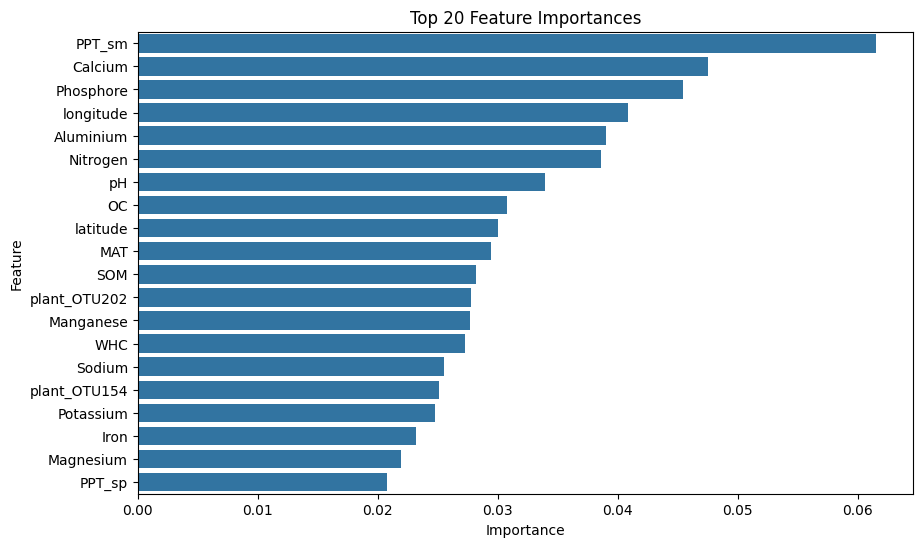


--- RMSE Assessment Original Microbiota Richness (Root) with Plant OTUs ---
RMSE (Train): 0.8476555054669034
RMSE (Test): 1.0547525631486188
Standard Deviation of Test Target: 1.1169306729810924
RMSE < SD: Model is useful but has room for improvement.
Test RMSE > 1.15× Training RMSE: Model might be overfitting.
Selecting top 20 features: ['PPT_sm', 'Calcium', 'Phosphore', 'longitude', 'Aluminium', 'Nitrogen', 'pH', 'OC', 'latitude', 'MAT', 'SOM', 'plant_OTU202', 'Manganese', 'WHC', 'Sodium', 'plant_OTU154', 'Potassium', 'Iron', 'Magnesium', 'PPT_sp']
Selecting top 20 features: ['PPT_sm', 'Calcium', 'Phosphore', 'longitude', 'Aluminium', 'Nitrogen', 'pH', 'OC', 'latitude', 'MAT', 'SOM', 'plant_OTU202', 'Manganese', 'WHC', 'Sodium', 'plant_OTU154', 'Potassium', 'Iron', 'Magnesium', 'PPT_sp']

--- RMSE Assessment TOP-K Microbiota Richness (Root) with Plant OTUs ---
RMSE (Train): 0.8374397170613335
RMSE (Test): 1.0390350512752509
Standard Deviation of Test Target: 1.1169306729810924
RMSE 

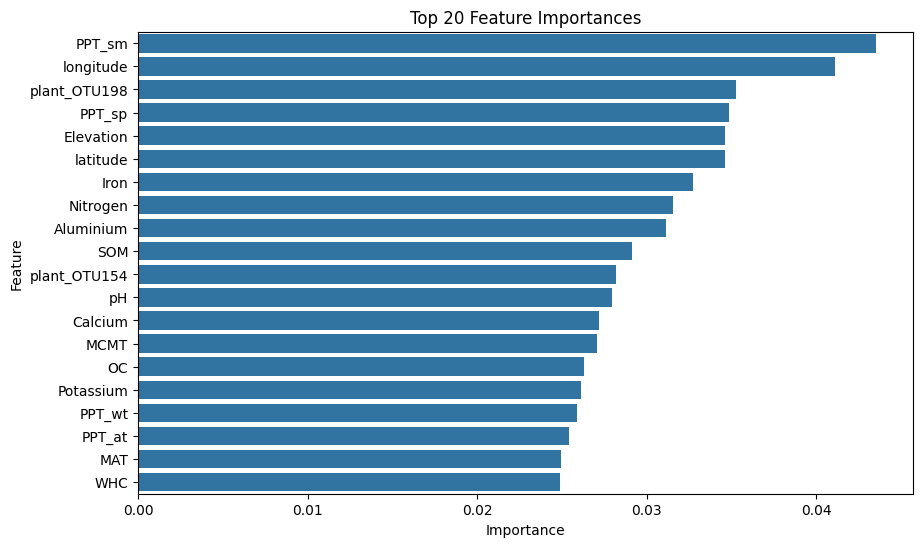


--- RMSE Assessment Original Microbiota Richness (Leaf) with Plant OTUs ---
RMSE (Train): 0.8172444414630805
RMSE (Test): 1.358311552263604
Standard Deviation of Test Target: 1.3310274907757103
Test RMSE ≥ SD: Model performs no better than predicting the mean (R² ≤ 0).
Test RMSE > 1.15× Training RMSE: Model might be overfitting.
Selecting top 20 features: ['PPT_sm', 'longitude', 'plant_OTU198', 'PPT_sp', 'Elevation', 'latitude', 'Iron', 'Nitrogen', 'Aluminium', 'SOM', 'plant_OTU154', 'pH', 'Calcium', 'MCMT', 'OC', 'Potassium', 'PPT_wt', 'PPT_at', 'MAT', 'WHC']
Selecting top 20 features: ['PPT_sm', 'longitude', 'plant_OTU198', 'PPT_sp', 'Elevation', 'latitude', 'Iron', 'Nitrogen', 'Aluminium', 'SOM', 'plant_OTU154', 'pH', 'Calcium', 'MCMT', 'OC', 'Potassium', 'PPT_wt', 'PPT_at', 'MAT', 'WHC']

--- RMSE Assessment TOP-K Microbiota Richness (Leaf) with Plant OTUs ---
RMSE (Train): 0.8158063934293598
RMSE (Test): 1.4047685337225644
Standard Deviation of Test Target: 1.3310274907757103
Tes

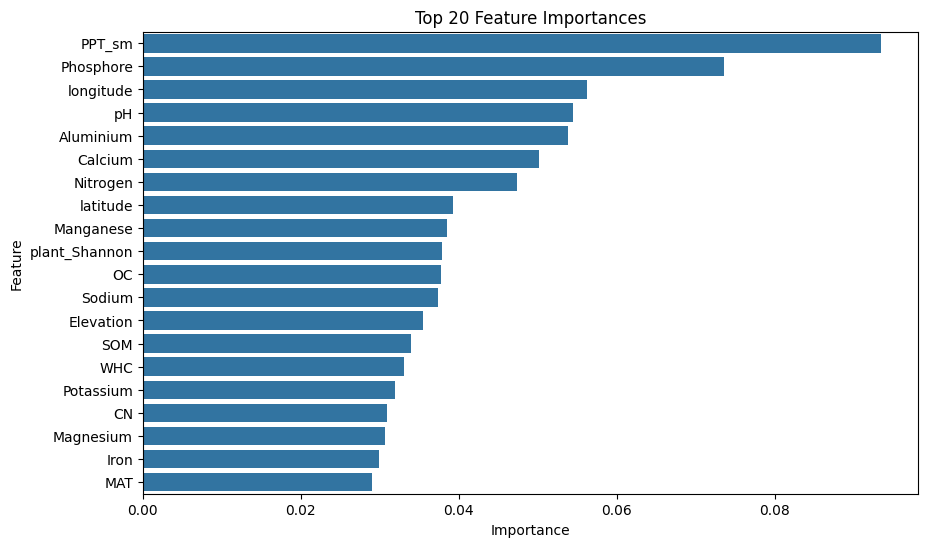


--- RMSE Assessment Original Microbiota Richness (Root) with Plant Metrics ---
RMSE (Train): 0.8210564325618097
RMSE (Test): 1.0671697005316843
Standard Deviation of Test Target: 1.1169306729810924
RMSE < SD: Model is useful but has room for improvement.
Test RMSE > 1.15× Training RMSE: Model might be overfitting.
Selecting top 20 features: ['PPT_sm', 'Phosphore', 'longitude', 'pH', 'Aluminium', 'Calcium', 'Nitrogen', 'latitude', 'Manganese', 'plant_Shannon', 'OC', 'Sodium', 'Elevation', 'SOM', 'WHC', 'Potassium', 'CN', 'Magnesium', 'Iron', 'MAT']
Selecting top 20 features: ['PPT_sm', 'Phosphore', 'longitude', 'pH', 'Aluminium', 'Calcium', 'Nitrogen', 'latitude', 'Manganese', 'plant_Shannon', 'OC', 'Sodium', 'Elevation', 'SOM', 'WHC', 'Potassium', 'CN', 'Magnesium', 'Iron', 'MAT']

--- RMSE Assessment TOP-K Microbiota Richness (Root) with Plant Metrics ---
RMSE (Train): 0.8362889056625218
RMSE (Test): 1.0707508823778713
Standard Deviation of Test Target: 1.1169306729810924
RMSE < SD: 

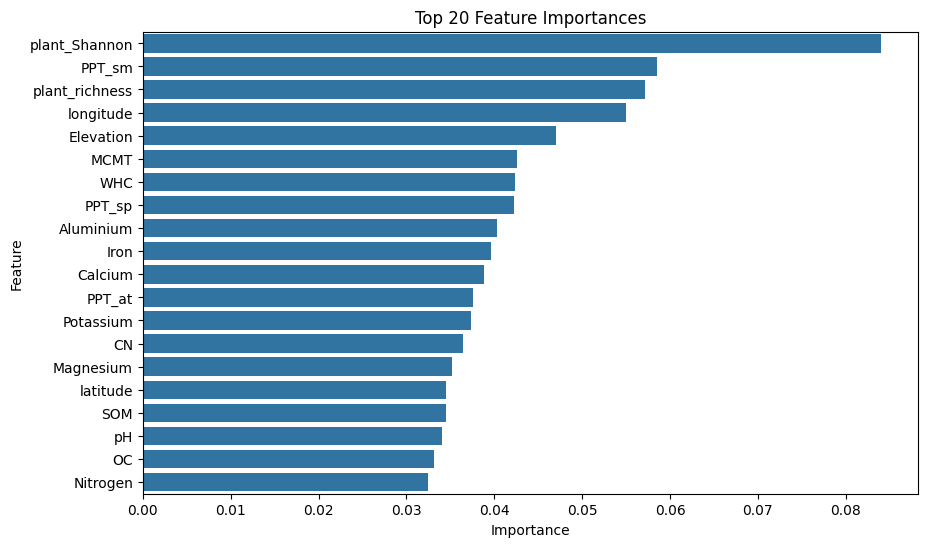


--- RMSE Assessment Original Microbiota Richness (Leaf) with Plant Metrics ---
RMSE (Train): 0.7866206630916726
RMSE (Test): 1.4008566762316683
Standard Deviation of Test Target: 1.3310274907757103
Test RMSE ≥ SD: Model performs no better than predicting the mean (R² ≤ 0).
Test RMSE > 1.15× Training RMSE: Model might be overfitting.
Selecting top 20 features: ['plant_Shannon', 'PPT_sm', 'plant_richness', 'longitude', 'Elevation', 'MCMT', 'WHC', 'PPT_sp', 'Aluminium', 'Iron', 'Calcium', 'PPT_at', 'Potassium', 'CN', 'Magnesium', 'latitude', 'SOM', 'pH', 'OC', 'Nitrogen']
Selecting top 20 features: ['plant_Shannon', 'PPT_sm', 'plant_richness', 'longitude', 'Elevation', 'MCMT', 'WHC', 'PPT_sp', 'Aluminium', 'Iron', 'Calcium', 'PPT_at', 'Potassium', 'CN', 'Magnesium', 'latitude', 'SOM', 'pH', 'OC', 'Nitrogen']

--- RMSE Assessment TOP-K Microbiota Richness (Leaf) with Plant Metrics ---
RMSE (Train): 0.7917648332086081
RMSE (Test): 1.3952191473283913
Standard Deviation of Test Target: 1.331

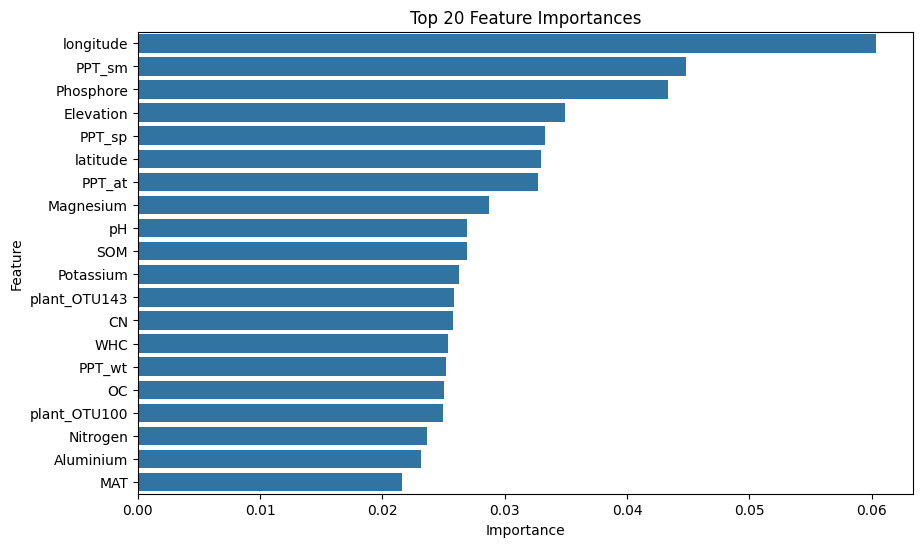


--- RMSE Assessment Original Microbiota Shannon (Root) with Plant OTUs ---
RMSE (Train): 0.19128819996812937
RMSE (Test): 0.26254876527402315
Standard Deviation of Test Target: 0.25314543385423727
Test RMSE ≥ SD: Model performs no better than predicting the mean (R² ≤ 0).
Test RMSE > 1.15× Training RMSE: Model might be overfitting.
Selecting top 20 features: ['longitude', 'PPT_sm', 'Phosphore', 'Elevation', 'PPT_sp', 'latitude', 'PPT_at', 'Magnesium', 'pH', 'SOM', 'Potassium', 'plant_OTU143', 'CN', 'WHC', 'PPT_wt', 'OC', 'plant_OTU100', 'Nitrogen', 'Aluminium', 'MAT']
Selecting top 20 features: ['longitude', 'PPT_sm', 'Phosphore', 'Elevation', 'PPT_sp', 'latitude', 'PPT_at', 'Magnesium', 'pH', 'SOM', 'Potassium', 'plant_OTU143', 'CN', 'WHC', 'PPT_wt', 'OC', 'plant_OTU100', 'Nitrogen', 'Aluminium', 'MAT']

--- RMSE Assessment TOP-K Microbiota Shannon (Root) with Plant OTUs ---
RMSE (Train): 0.18288636106202666
RMSE (Test): 0.26256385345635697
Standard Deviation of Test Target: 0.253145

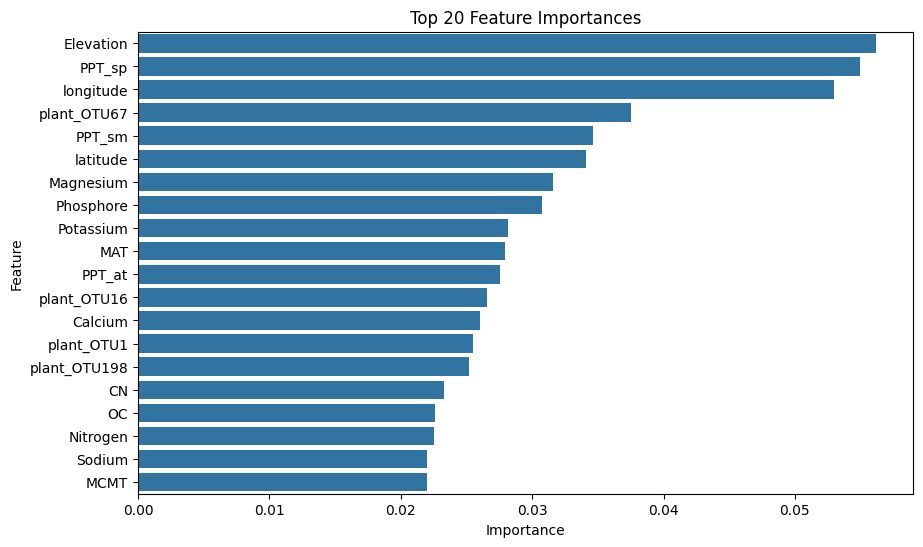


--- RMSE Assessment Original Microbiota Shannon (Leaf) with Plant OTUs ---
RMSE (Train): 0.14092570473412866
RMSE (Test): 0.25212791594205297
Standard Deviation of Test Target: 0.23708230774949685
Test RMSE ≥ SD: Model performs no better than predicting the mean (R² ≤ 0).
Test RMSE > 1.15× Training RMSE: Model might be overfitting.
Selecting top 20 features: ['Elevation', 'PPT_sp', 'longitude', 'plant_OTU67', 'PPT_sm', 'latitude', 'Magnesium', 'Phosphore', 'Potassium', 'MAT', 'PPT_at', 'plant_OTU16', 'Calcium', 'plant_OTU1', 'plant_OTU198', 'CN', 'OC', 'Nitrogen', 'Sodium', 'MCMT']
Selecting top 20 features: ['Elevation', 'PPT_sp', 'longitude', 'plant_OTU67', 'PPT_sm', 'latitude', 'Magnesium', 'Phosphore', 'Potassium', 'MAT', 'PPT_at', 'plant_OTU16', 'Calcium', 'plant_OTU1', 'plant_OTU198', 'CN', 'OC', 'Nitrogen', 'Sodium', 'MCMT']

--- RMSE Assessment TOP-K Microbiota Shannon (Leaf) with Plant OTUs ---
RMSE (Train): 0.13881536804628025
RMSE (Test): 0.24726620208602493
Standard Deviat

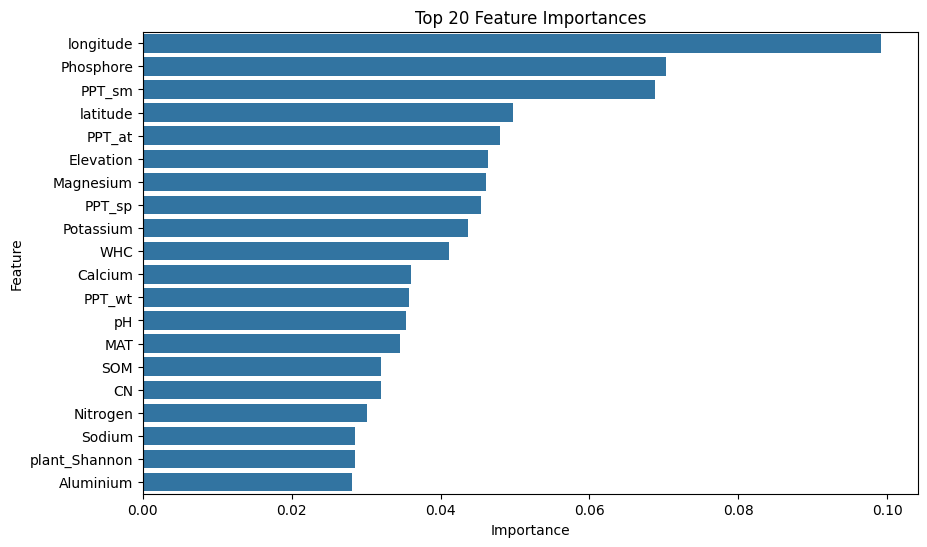


--- RMSE Assessment Original Microbiota Shannon (Root) with Plant Metrics ---
RMSE (Train): 0.1848597023692495
RMSE (Test): 0.2568849847745229
Standard Deviation of Test Target: 0.25314543385423727
Test RMSE ≥ SD: Model performs no better than predicting the mean (R² ≤ 0).
Test RMSE > 1.15× Training RMSE: Model might be overfitting.
Selecting top 20 features: ['longitude', 'Phosphore', 'PPT_sm', 'latitude', 'PPT_at', 'Elevation', 'Magnesium', 'PPT_sp', 'Potassium', 'WHC', 'Calcium', 'PPT_wt', 'pH', 'MAT', 'SOM', 'CN', 'Nitrogen', 'Sodium', 'plant_Shannon', 'Aluminium']
Selecting top 20 features: ['longitude', 'Phosphore', 'PPT_sm', 'latitude', 'PPT_at', 'Elevation', 'Magnesium', 'PPT_sp', 'Potassium', 'WHC', 'Calcium', 'PPT_wt', 'pH', 'MAT', 'SOM', 'CN', 'Nitrogen', 'Sodium', 'plant_Shannon', 'Aluminium']

--- RMSE Assessment TOP-K Microbiota Shannon (Root) with Plant Metrics ---
RMSE (Train): 0.1833179283244459
RMSE (Test): 0.2540739641853441
Standard Deviation of Test Target: 0.2531

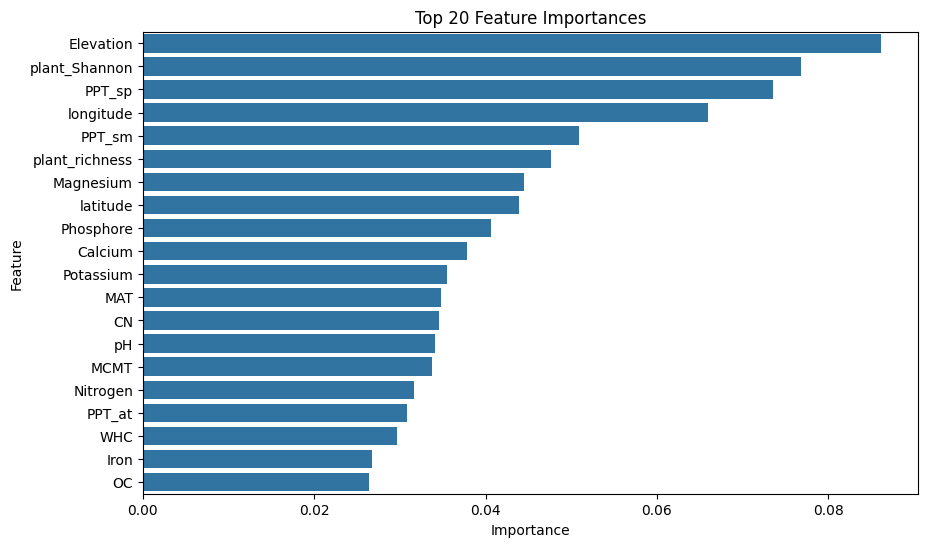


--- RMSE Assessment Original Microbiota Shannon (Leaf) with Plant Metrics ---
RMSE (Train): 0.13407012067999138
RMSE (Test): 0.25597314326914755
Standard Deviation of Test Target: 0.23708230774949685
Test RMSE ≥ SD: Model performs no better than predicting the mean (R² ≤ 0).
Test RMSE > 1.15× Training RMSE: Model might be overfitting.
Selecting top 20 features: ['Elevation', 'plant_Shannon', 'PPT_sp', 'longitude', 'PPT_sm', 'plant_richness', 'Magnesium', 'latitude', 'Phosphore', 'Calcium', 'Potassium', 'MAT', 'CN', 'pH', 'MCMT', 'Nitrogen', 'PPT_at', 'WHC', 'Iron', 'OC']
Selecting top 20 features: ['Elevation', 'plant_Shannon', 'PPT_sp', 'longitude', 'PPT_sm', 'plant_richness', 'Magnesium', 'latitude', 'Phosphore', 'Calcium', 'Potassium', 'MAT', 'CN', 'pH', 'MCMT', 'Nitrogen', 'PPT_at', 'WHC', 'Iron', 'OC']

--- RMSE Assessment TOP-K Microbiota Shannon (Leaf) with Plant Metrics ---
RMSE (Train): 0.1344767459007242
RMSE (Test): 0.25623315526135865
Standard Deviation of Test Target: 0.2

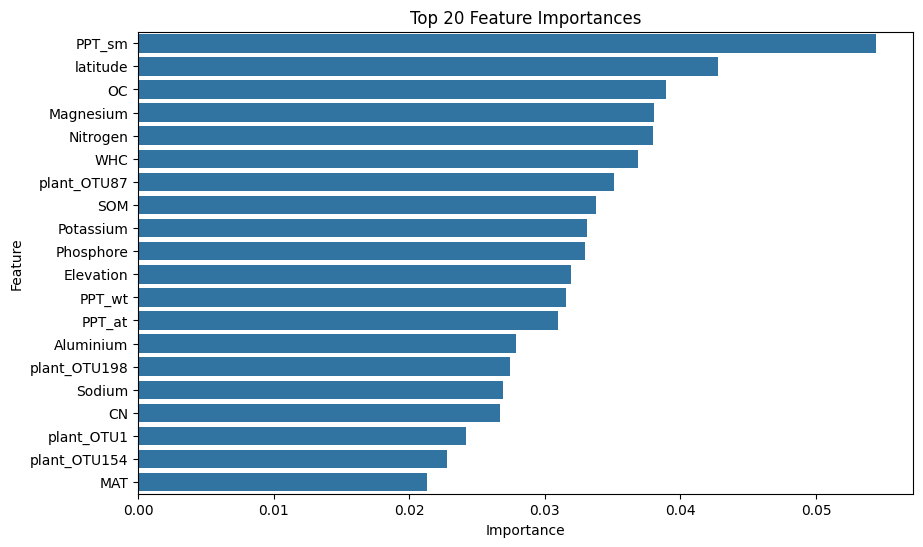


--- RMSE Assessment Original Pathobiota Richness (Root) with Plant OTUs ---
RMSE (Train): 0.12223064911585141
RMSE (Test): 0.2314857201828209
Standard Deviation of Test Target: 0.22759919092467426
Test RMSE ≥ SD: Model performs no better than predicting the mean (R² ≤ 0).
Test RMSE > 1.15× Training RMSE: Model might be overfitting.
Selecting top 20 features: ['PPT_sm', 'latitude', 'OC', 'Magnesium', 'Nitrogen', 'WHC', 'plant_OTU87', 'SOM', 'Potassium', 'Phosphore', 'Elevation', 'PPT_wt', 'PPT_at', 'Aluminium', 'plant_OTU198', 'Sodium', 'CN', 'plant_OTU1', 'plant_OTU154', 'MAT']
Selecting top 20 features: ['PPT_sm', 'latitude', 'OC', 'Magnesium', 'Nitrogen', 'WHC', 'plant_OTU87', 'SOM', 'Potassium', 'Phosphore', 'Elevation', 'PPT_wt', 'PPT_at', 'Aluminium', 'plant_OTU198', 'Sodium', 'CN', 'plant_OTU1', 'plant_OTU154', 'MAT']

--- RMSE Assessment TOP-K Pathobiota Richness (Root) with Plant OTUs ---
RMSE (Train): 0.12189718155293529
RMSE (Test): 0.23807405754595265
Standard Deviation of 

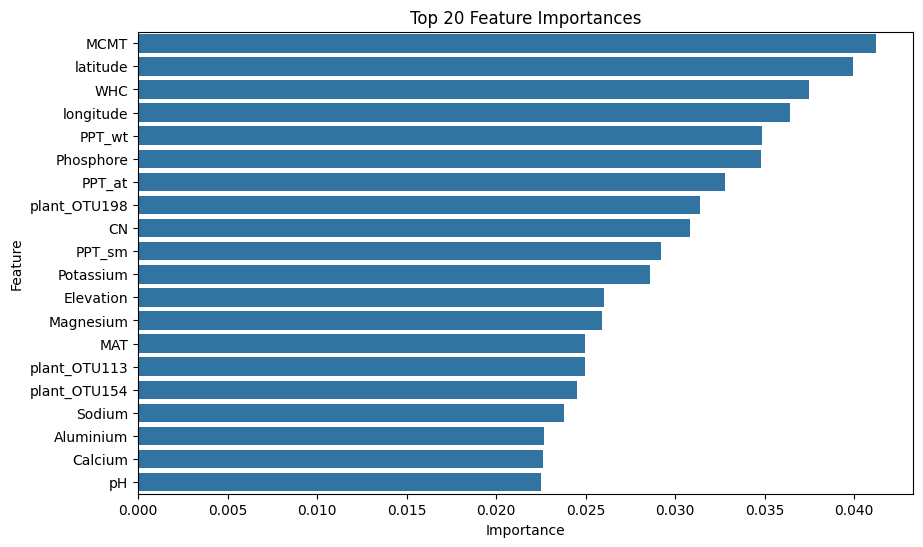


--- RMSE Assessment Original Pathobiota Richness (Leaf) with Plant OTUs ---
RMSE (Train): 0.3290555321208906
RMSE (Test): 0.47023429746433754
Standard Deviation of Test Target: 0.49356700021006056
RMSE < SD: Model is useful but has room for improvement.
Test RMSE > 1.15× Training RMSE: Model might be overfitting.
Selecting top 20 features: ['MCMT', 'latitude', 'WHC', 'longitude', 'PPT_wt', 'Phosphore', 'PPT_at', 'plant_OTU198', 'CN', 'PPT_sm', 'Potassium', 'Elevation', 'Magnesium', 'MAT', 'plant_OTU113', 'plant_OTU154', 'Sodium', 'Aluminium', 'Calcium', 'pH']
Selecting top 20 features: ['MCMT', 'latitude', 'WHC', 'longitude', 'PPT_wt', 'Phosphore', 'PPT_at', 'plant_OTU198', 'CN', 'PPT_sm', 'Potassium', 'Elevation', 'Magnesium', 'MAT', 'plant_OTU113', 'plant_OTU154', 'Sodium', 'Aluminium', 'Calcium', 'pH']

--- RMSE Assessment TOP-K Pathobiota Richness (Leaf) with Plant OTUs ---
RMSE (Train): 0.32467808161802797
RMSE (Test): 0.4592004052241055
Standard Deviation of Test Target: 0.49356

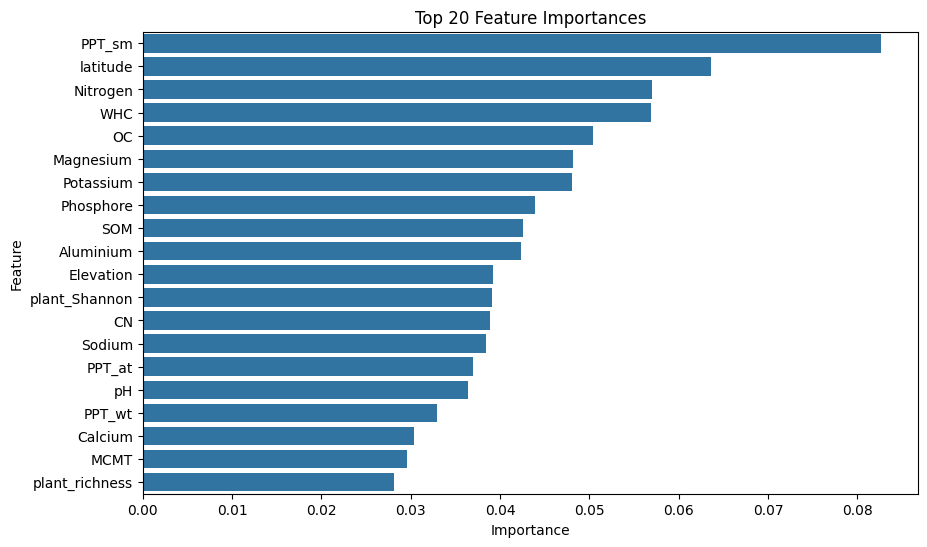


--- RMSE Assessment Original Pathobiota Richness (Root) with Plant Metrics ---
RMSE (Train): 0.11884384683012203
RMSE (Test): 0.23552717935143055
Standard Deviation of Test Target: 0.22759919092467426
Test RMSE ≥ SD: Model performs no better than predicting the mean (R² ≤ 0).
Test RMSE > 1.15× Training RMSE: Model might be overfitting.
Selecting top 20 features: ['PPT_sm', 'latitude', 'Nitrogen', 'WHC', 'OC', 'Magnesium', 'Potassium', 'Phosphore', 'SOM', 'Aluminium', 'Elevation', 'plant_Shannon', 'CN', 'Sodium', 'PPT_at', 'pH', 'PPT_wt', 'Calcium', 'MCMT', 'plant_richness']
Selecting top 20 features: ['PPT_sm', 'latitude', 'Nitrogen', 'WHC', 'OC', 'Magnesium', 'Potassium', 'Phosphore', 'SOM', 'Aluminium', 'Elevation', 'plant_Shannon', 'CN', 'Sodium', 'PPT_at', 'pH', 'PPT_wt', 'Calcium', 'MCMT', 'plant_richness']

--- RMSE Assessment TOP-K Pathobiota Richness (Root) with Plant Metrics ---
RMSE (Train): 0.12029826907560122
RMSE (Test): 0.23676785621115845
Standard Deviation of Test Targ

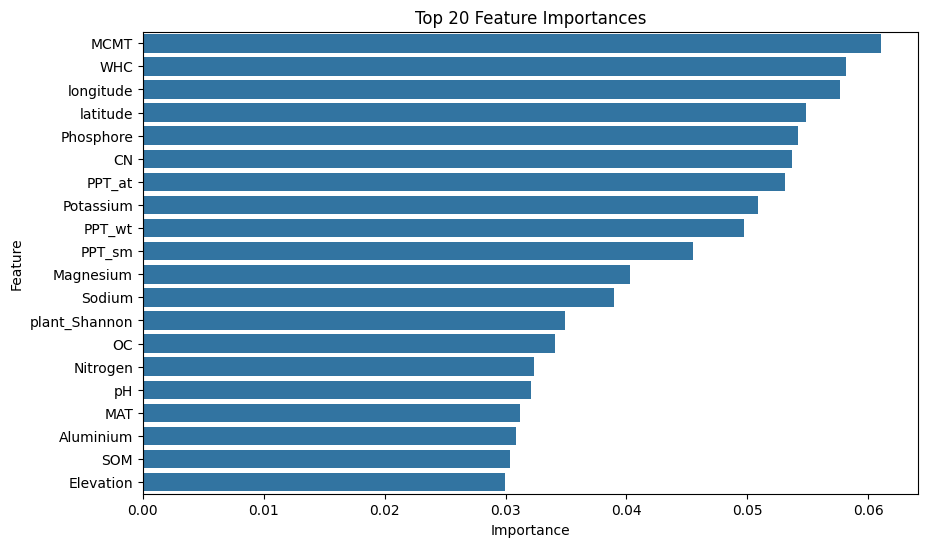


--- RMSE Assessment Original Pathobiota Richness (Leaf) with Plant Metrics ---
RMSE (Train): 0.3184157697957214
RMSE (Test): 0.47084145505276387
Standard Deviation of Test Target: 0.49356700021006056
RMSE < SD: Model is useful but has room for improvement.
Test RMSE > 1.15× Training RMSE: Model might be overfitting.
Selecting top 20 features: ['MCMT', 'WHC', 'longitude', 'latitude', 'Phosphore', 'CN', 'PPT_at', 'Potassium', 'PPT_wt', 'PPT_sm', 'Magnesium', 'Sodium', 'plant_Shannon', 'OC', 'Nitrogen', 'pH', 'MAT', 'Aluminium', 'SOM', 'Elevation']
Selecting top 20 features: ['MCMT', 'WHC', 'longitude', 'latitude', 'Phosphore', 'CN', 'PPT_at', 'Potassium', 'PPT_wt', 'PPT_sm', 'Magnesium', 'Sodium', 'plant_Shannon', 'OC', 'Nitrogen', 'pH', 'MAT', 'Aluminium', 'SOM', 'Elevation']

--- RMSE Assessment TOP-K Pathobiota Richness (Leaf) with Plant Metrics ---
RMSE (Train): 0.32504766412373987
RMSE (Test): 0.4652916721302498
Standard Deviation of Test Target: 0.49356700021006056
RMSE < SD: Mode

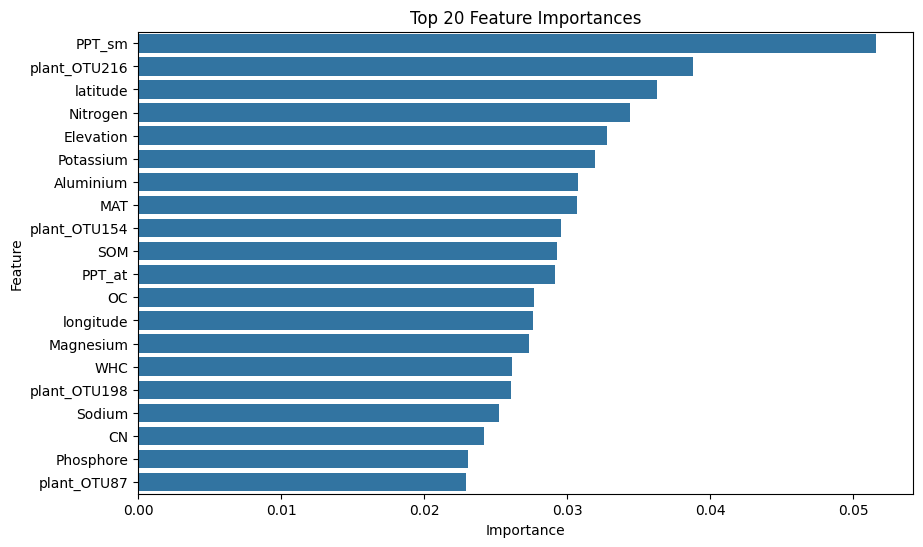


--- RMSE Assessment Original Pathobiota Shannon (Root) with Plant OTUs ---
RMSE (Train): 0.06383622123048625
RMSE (Test): 0.11403993620480046
Standard Deviation of Test Target: 0.11494978312690925
RMSE < SD: Model is useful but has room for improvement.
Test RMSE > 1.15× Training RMSE: Model might be overfitting.
Selecting top 20 features: ['PPT_sm', 'plant_OTU216', 'latitude', 'Nitrogen', 'Elevation', 'Potassium', 'Aluminium', 'MAT', 'plant_OTU154', 'SOM', 'PPT_at', 'OC', 'longitude', 'Magnesium', 'WHC', 'plant_OTU198', 'Sodium', 'CN', 'Phosphore', 'plant_OTU87']
Selecting top 20 features: ['PPT_sm', 'plant_OTU216', 'latitude', 'Nitrogen', 'Elevation', 'Potassium', 'Aluminium', 'MAT', 'plant_OTU154', 'SOM', 'PPT_at', 'OC', 'longitude', 'Magnesium', 'WHC', 'plant_OTU198', 'Sodium', 'CN', 'Phosphore', 'plant_OTU87']

--- RMSE Assessment TOP-K Pathobiota Shannon (Root) with Plant OTUs ---
RMSE (Train): 0.06277590509299294
RMSE (Test): 0.11672267291960951
Standard Deviation of Test Targe

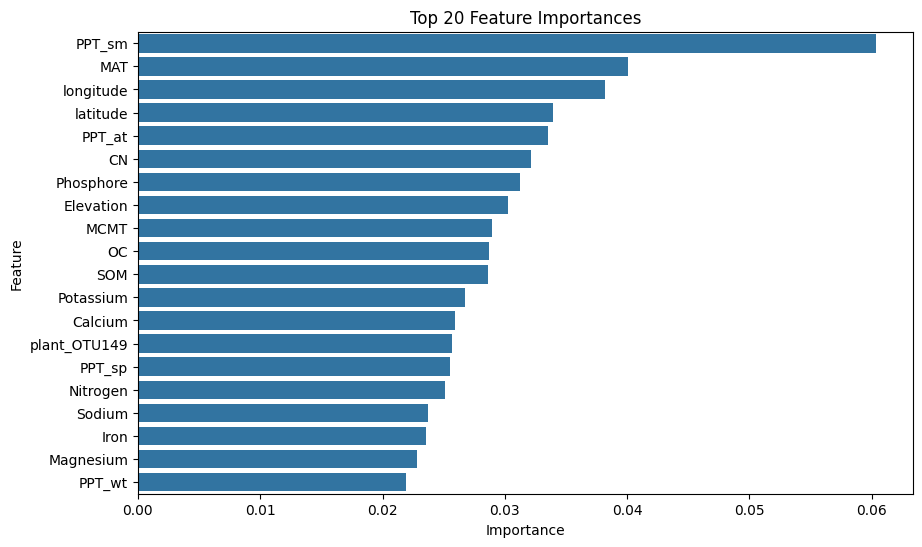


--- RMSE Assessment Original Pathobiota Shannon (Leaf) with Plant OTUs ---
RMSE (Train): 0.0849769656420927
RMSE (Test): 0.12080182191311718
Standard Deviation of Test Target: 0.11296695534417847
Test RMSE ≥ SD: Model performs no better than predicting the mean (R² ≤ 0).
Test RMSE > 1.15× Training RMSE: Model might be overfitting.
Selecting top 20 features: ['PPT_sm', 'MAT', 'longitude', 'latitude', 'PPT_at', 'CN', 'Phosphore', 'Elevation', 'MCMT', 'OC', 'SOM', 'Potassium', 'Calcium', 'plant_OTU149', 'PPT_sp', 'Nitrogen', 'Sodium', 'Iron', 'Magnesium', 'PPT_wt']
Selecting top 20 features: ['PPT_sm', 'MAT', 'longitude', 'latitude', 'PPT_at', 'CN', 'Phosphore', 'Elevation', 'MCMT', 'OC', 'SOM', 'Potassium', 'Calcium', 'plant_OTU149', 'PPT_sp', 'Nitrogen', 'Sodium', 'Iron', 'Magnesium', 'PPT_wt']

--- RMSE Assessment TOP-K Pathobiota Shannon (Leaf) with Plant OTUs ---
RMSE (Train): 0.08431485481246713
RMSE (Test): 0.12174610984780306
Standard Deviation of Test Target: 0.11296695534417847

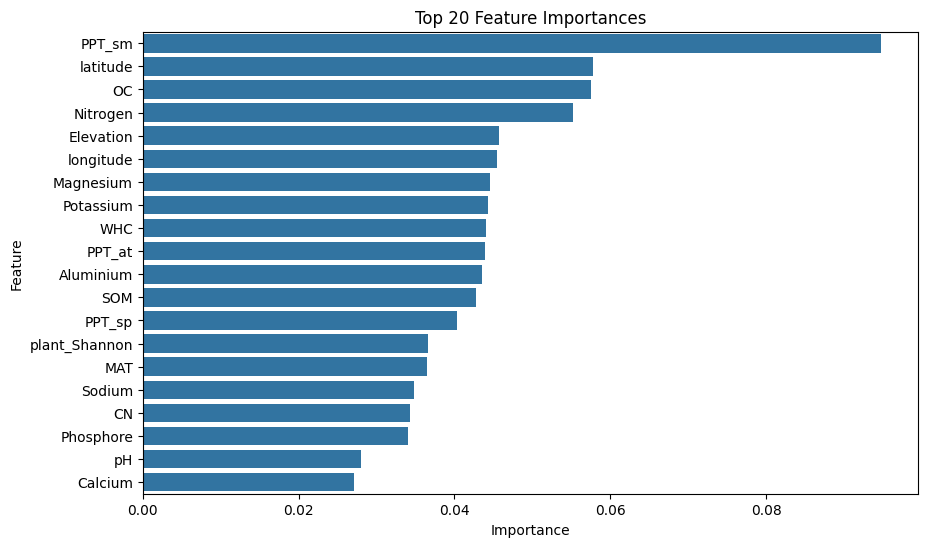


--- RMSE Assessment Original Pathobiota Shannon (Root) with Plant Metrics ---
RMSE (Train): 0.06274054080621781
RMSE (Test): 0.11665471255460767
Standard Deviation of Test Target: 0.11494978312690925
Test RMSE ≥ SD: Model performs no better than predicting the mean (R² ≤ 0).
Test RMSE > 1.15× Training RMSE: Model might be overfitting.
Selecting top 20 features: ['PPT_sm', 'latitude', 'OC', 'Nitrogen', 'Elevation', 'longitude', 'Magnesium', 'Potassium', 'WHC', 'PPT_at', 'Aluminium', 'SOM', 'PPT_sp', 'plant_Shannon', 'MAT', 'Sodium', 'CN', 'Phosphore', 'pH', 'Calcium']
Selecting top 20 features: ['PPT_sm', 'latitude', 'OC', 'Nitrogen', 'Elevation', 'longitude', 'Magnesium', 'Potassium', 'WHC', 'PPT_at', 'Aluminium', 'SOM', 'PPT_sp', 'plant_Shannon', 'MAT', 'Sodium', 'CN', 'Phosphore', 'pH', 'Calcium']

--- RMSE Assessment TOP-K Pathobiota Shannon (Root) with Plant Metrics ---
RMSE (Train): 0.06337941035703186
RMSE (Test): 0.11748063680728886
Standard Deviation of Test Target: 0.11494978

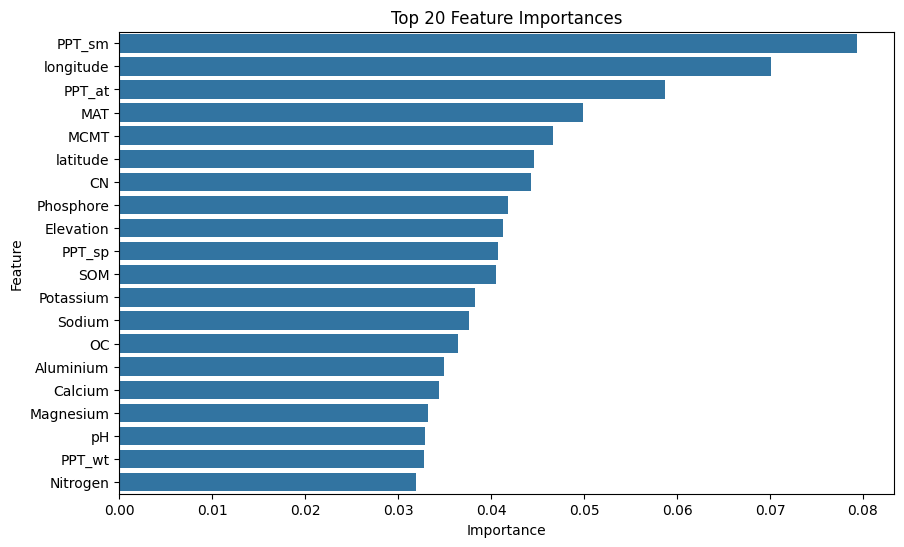


--- RMSE Assessment Original Pathobiota Shannon (Leaf) with Plant Metrics ---
RMSE (Train): 0.08212188619549196
RMSE (Test): 0.12198731488849975
Standard Deviation of Test Target: 0.11296695534417847
Test RMSE ≥ SD: Model performs no better than predicting the mean (R² ≤ 0).
Test RMSE > 1.15× Training RMSE: Model might be overfitting.
Selecting top 20 features: ['PPT_sm', 'longitude', 'PPT_at', 'MAT', 'MCMT', 'latitude', 'CN', 'Phosphore', 'Elevation', 'PPT_sp', 'SOM', 'Potassium', 'Sodium', 'OC', 'Aluminium', 'Calcium', 'Magnesium', 'pH', 'PPT_wt', 'Nitrogen']
Selecting top 20 features: ['PPT_sm', 'longitude', 'PPT_at', 'MAT', 'MCMT', 'latitude', 'CN', 'Phosphore', 'Elevation', 'PPT_sp', 'SOM', 'Potassium', 'Sodium', 'OC', 'Aluminium', 'Calcium', 'Magnesium', 'pH', 'PPT_wt', 'Nitrogen']

--- RMSE Assessment TOP-K Pathobiota Shannon (Leaf) with Plant Metrics ---
RMSE (Train): 0.08392880653743214
RMSE (Test): 0.12290536365879295
Standard Deviation of Test Target: 0.11296695534417847
Te

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)



Task: Microbiota Richness (Root) with Plant OTUs
Full Feature Model - RMSE Train: 1.275, RMSE Test: 1.107
Top-k Feature Model  - RMSE Train: 1.179, RMSE Test: 1.107

--- Training XGBoost (with top features) for Microbiota Richness (Leaf) with Plant OTUs ---
Using RobustScaler for scaling.
Training data scaled shape: (124, 67)
Test data scaled shape: (32, 67)
Training data shape after imputation: (124, 67)
Test data shape after imputation: (32, 67)
Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'subsample': 0.7}
Best RMSE:  1.4500096207854962
Using optimized parameters:  {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.7, 'colsample_bytree': 0.8, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_byle

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.9}
Best RMSE:  1.404288153258693
Using optimized parameters:  {'objective': 'reg:squarederror', 'max_depth': 3, 'learning_rate': 0.1, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all feature

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.8}
Best RMSE:  1.3919805404567123
Using optimized parameters:  {'objective': 'reg:squarederror', 'max_depth': 4, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.8, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all feat

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'subsample': 0.9}
Best RMSE:  0.3240110480007666
Using optimized parameters:  {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 5, 'subsample': 0.9, 'colsample_bytree': 0.8, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all feat

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.8}
Best RMSE:  0.2339418604596495
Using optimized parameters:  {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 3, 'subsample': 0.8, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters':

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'subsample': 0.9}
Best RMSE:  0.3175538849277391
Using optimized parameters:  {'objective': 'reg:squarederror', 'max_depth': 4, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bytree': 0.8, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all feat

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)



Task: Microbiota Shannon (Root) with Plant Metrics
Full Feature Model - RMSE Train: 0.206, RMSE Test: 0.277
Top-k Feature Model  - RMSE Train: 0.211, RMSE Test: 0.273

--- Training XGBoost (with top features) for Microbiota Shannon (Leaf) with Plant Metrics ---
Using RobustScaler for scaling.
Training data scaled shape: (124, 25)
Test data scaled shape: (32, 25)
Training data shape after imputation: (124, 25)
Test data shape after imputation: (32, 25)
Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.7}
Best RMSE:  0.22397335844384839
Using optimized parameters:  {'objective': 'reg:squarederror', 'max_depth': 3, 'learning_rate': 0.05, 'min_child_weight': 3, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'seed': 42, 'base_score': None, 'booster': None, 'colsample

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 2.0, 'subsample': 0.9}
Best RMSE:  0.1997749694265476
Using optimized parameters:  {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 0.5, 'reg_lambda': 2.0, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all feat

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 2.0, 'subsample': 0.7}
Best RMSE:  0.5444751194970935
Using optimized parameters:  {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.5, 'reg_lambda': 2.0, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all feat

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'subsample': 0.9}
Best RMSE:  0.195354951384869
Using optimized parameters:  {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.05, 'min_child_weight': 5, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all featu

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'subsample': 0.7}
Best RMSE:  0.5465439747169677
Using optimized parameters:  {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all feat

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'subsample': 0.9}
Best RMSE:  0.11063090180947344
Using optimized parameters:  {'objective': 'reg:squarederror', 'max_depth': 4, 'learning_rate': 0.1, 'min_child_weight': 5, 'subsample': 0.9, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all featu

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'subsample': 0.7}
Best RMSE:  0.14946583633336719
Using optimized parameters:  {'objective': 'reg:squarederror', 'max_depth': 3, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.7, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all fea

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'subsample': 0.7}
Best RMSE:  0.11076431397930973
Using optimized parameters:  {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.05, 'min_child_weight': 3, 'subsample': 0.7, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all fea

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.1, 'reg_lambda': 2.0, 'subsample': 0.7}
Best RMSE:  0.14844136412602396
Using optimized parameters:  {'objective': 'reg:squarederror', 'max_depth': 4, 'learning_rate': 0.01, 'min_child_weight': 5, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 2.0, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all fea

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, StackingRegressor
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import networkx as nx
from scipy.stats import pearsonr
from sklearn.compose import ColumnTransformer
from tabulate import tabulate
from sklearn.decomposition import PCA

# (Optional) Uncomment the following line if you want to use SHAP for further analysis:
# import shap

# NOTE: Ensure that df_ecological and df_otu_abundance are defined in your environment.

class EcodynamicsAI:
    def __init__(self, data_path=""):
        """Initialize the framework with the dataset path."""
        self.data_path = data_path
        self.data = None
        self.target = None
        self.features = None
        self.otu_data = None
        self.results = {}
        self.results_xgb = {}
        self.results_xgb_poly = {}
        self.rmse_results = {}
        self.results_stack = {}

    def remove_low_importance_features(self, X, importance_df, threshold=0.01):
        low_importance_features = importance_df[importance_df['Importance'] < threshold]['Feature'].tolist()
        print(f"Removing {len(low_importance_features)} features with importance < {threshold}.")
        return X.drop(columns=low_importance_features, errors='ignore')

    def remove_dominant_features(self, X, importance_df, dominance_threshold=0.1):
        dominant_features = importance_df[importance_df['Importance'] > dominance_threshold]['Feature'].tolist()
        print(f"Removing {len(dominant_features)} dominant features with importance > {dominance_threshold}.")
        return X.drop(columns=dominant_features, errors='ignore')

    def remove_top_k_dominant_features(self, X, importance_df, k=1):
        top_features = importance_df.head(k)['Feature'].tolist()
        print(f"Removing top {k} dominant features: {top_features}")
        return X.drop(columns=top_features, errors='ignore')

    def analyze_feature_importance(self, model, features):
        """Analyze feature importance and identify dominant features."""
        feature_importances = model.feature_importances_
        importance_df = pd.DataFrame({
            'Feature': features,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)

        print("\n--- Feature Importances ---\n")
        print(importance_df)

        # Plot the top 10 most important features
        plt.figure(figsize=(10, 6))
        sns.barplot(data=importance_df.head(20), x='Importance', y='Feature')
        plt.title('Top 20 Feature Importances')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

        return importance_df

    def assess_rmse_quality(self, desc, y_train, y_test, y_train_pred, y_test_pred):
        """Assess the quality of RMSE for training and test sets."""
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        std_test = np.std(y_test)
        print(f"\n--- RMSE Assessment {desc} ---")
        print(f"RMSE (Train): {rmse_train}")
        print(f"RMSE (Test): {rmse_test}")
        print(f"Standard Deviation of Test Target: {std_test}")
        if rmse_test >= std_test:
            print("Test RMSE ≥ SD: Model performs no better than predicting the mean (R² ≤ 0).")
        elif rmse_test <= 0.25 * std_test:
            print("RMSE ≤ 0.25×SD: Exceptional performance (R² ≥ ~0.9).")
        elif rmse_test <= 0.5 * std_test:
            print("RMSE ≤ 0.5×SD: Strong performance (R² ~≥ 0.7).")
        else:
            print("RMSE < SD: Model is useful but has room for improvement.")
        if rmse_test <= 1.15 * rmse_train:
            print("Test RMSE ≤ 1.15× Training RMSE: Model generalizes well.")
        else:
            print("Test RMSE > 1.15× Training RMSE: Model might be overfitting.")
        if abs(rmse_train - rmse_test) / rmse_train < 0.1:
            print("Test RMSE ≈ Training RMSE: Model is underfitting or data has low noise.")
        if not hasattr(self, 'rmse_results'):
            self.rmse_results = {}
        self.rmse_results[desc] = {
            'RMSE Train': rmse_train,
            'RMSE Test': rmse_test,
            'Test Target Std': std_test
        }
        return {
            'RMSE Train': rmse_train,
            'RMSE Test': rmse_test,
            'Test Target Std': std_test
        }

    def select_top_k_features(self, X, importance_df, k=20):
        top_k_features = importance_df.head(k)['Feature'].tolist()
        print(f"Selecting top {k} features: {top_k_features}")
        return X[top_k_features]

    def load_data(self):
        """Load and preview the dataset."""
        self.data = df_ecological
        if self.data is None:
            raise ValueError("Dataset not loaded. Please check the data path.")
        if self.data.index.name != 'population' and 'population' in self.data.columns:
            self.data.set_index('population', inplace=True)
        # Replace '.' with NaN
        self.data = self.data.replace('.', np.nan)
        print(f"Dataset Loaded Successfully. {self.data.shape}")

    def load_otu_data(self):
        """Load, preprocess, and CLR-transform OTU relative abundance data."""
        self.otu_data = df_otu_abundance
        if self.otu_data is None:
            raise ValueError("Dataset otu data not loaded. Please check the data path.")
        if self.otu_data.index.name != 'population' and 'population' in self.otu_data.columns:
            self.otu_data.set_index('population', inplace=True)
        self.otu_data = self.otu_data.replace('.', np.nan)
        print(f"OTU Data Loaded Successfully., {self.otu_data.shape}")

        leaf_otus = [col for col in self.otu_data.columns if col.startswith('leaf_Otu')]
        root_otus = [col for col in self.otu_data.columns if col.startswith('root_Otu')]
        print(f"Number of leaf_OTUs in OTU data: {len(leaf_otus)}")
        print(f"Number of root_OTUs in OTU data: {len(root_otus)}")

        def clr_transformation(df, pseudocount=1e-6):
            if (df <= 0).any().any():
                print(f"Warning: Some values are <= 0. Adding pseudocount {pseudocount}.")
                df = df + pseudocount
            geometric_mean = df.apply(lambda row: np.exp(np.log(row).mean()), axis=1)
            clr_df = df.apply(lambda row: np.log(row / geometric_mean[row.name]), axis=1)
            return clr_df

        self.otu_data[leaf_otus] = clr_transformation(self.otu_data[leaf_otus])
        self.otu_data[root_otus] = clr_transformation(self.otu_data[root_otus])

    def categorize_features(self):
        """Categorize features into predefined groups."""
        self.feature_categories = {
            'environmental': [
                'latitude', 'longitude', 'Elevation', 'MAT', 'MCMT', 'PPT_wt', 'PPT_sp', 'PPT_sm', 'PPT_at',
                'Nitrogen', 'CN', 'pH', 'Phosphore', 'Calcium', 'Magnesium', 'Sodium', 'Potassium', 'Iron',
                'Aluminium', 'WHC', 'OC', 'SOM', 'Manganese'
            ],
            'leaf_otus': [col for col in self.data.columns if col.startswith('leaf_Otu')],
            'root_otus': [col for col in self.data.columns if col.startswith('root_Otu')],
            'plant_otus': [col for col in self.data.columns if col.startswith('plant_OTU')],
            'specific_metrics': [
                'richness_microbiota_leaf', 'Shannon_microbiota_leaf',
                'richness_microbiota_root', 'Shannon_microbiota_root',
                'richness_pathobiota_leaf', 'Shannon_pathobiota_leaf',
                'richness_pathobiota_root', 'Shannon_pathobiota_root'
            ],
            'plant_metrics': [
                'plant_richness', 'plant_Shannon'
            ]
        }
        for category, features in self.feature_categories.items():
            print(f"Category '{category}' has {len(features)} features.")
        total_features = sum(len(features) for features in self.feature_categories.values())
        print(f"Total features: {total_features}")
        print(f"Number of data points: {len(self.data)}")

    def filter_columns_of_interest(self):
        """Retain only columns of interest."""
        columns_of_interest = (
            self.feature_categories['environmental'] +
            self.feature_categories['leaf_otus'] +
            self.feature_categories['root_otus'] +
            self.feature_categories['specific_metrics'] +
            self.feature_categories['plant_otus'] +
            self.feature_categories['plant_metrics']
        )
        retained_columns = [col for col in columns_of_interest if col in self.data.columns]
        discarded_columns = [col for col in self.data.columns if col not in retained_columns]
        print(f"Retaining {len(retained_columns)} columns.")
        print(f"Discarding {len(discarded_columns)} columns.")
        print("\n--- Discarded Columns ---")
        print(discarded_columns)
        self.data = self.data[retained_columns]

    def validate_and_assign_otu_data(self):
        """Align populations and assign OTU data."""
        if self.otu_data is not None:
            common_populations = self.data.index.intersection(self.otu_data.index)
            if len(common_populations) == 0:
                raise ValueError("No matching populations found between data and OTU data.")
            self.data = self.data.loc[common_populations]
            self.otu_data = self.otu_data.loc[common_populations]
            print(f"Data dimensions after aligning populations: {self.data.shape}")
            leaf_otus = [col for col in self.otu_data.columns if col.startswith('leaf_Otu')]
            root_otus = [col for col in self.otu_data.columns if col.startswith('root_Otu')]
            for col in leaf_otus + root_otus:
                if col in self.otu_data.columns:
                    self.data[col] = self.otu_data[col]
            print(f"Data dimensions after assigning OTU data: {self.data.shape}")

    def select_target_and_features(self, target_column, feature_categories=None):
        if target_column not in self.data.columns:
            raise ValueError(f"Target column '{target_column}' not found in dataset.")
        target = target_column
        if feature_categories:
            selected_features = []
            for category in feature_categories:
                if category in self.feature_categories:
                    selected_features.extend(self.feature_categories[category])
                else:
                    raise ValueError(f"Feature category '{category}' not defined.")
            features = selected_features
        else:
            features = [col for col in self.data.columns if col != target]
        print(f"Target column set to: {target}")
        print(f"Feature columns selected: {features}")
        return target, features

    def impute_or_drop(self, X, y, strategy='impute'):
        valid_rows = ~y.isna()
        X = X[valid_rows]
        y = y[valid_rows]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # Here we use robust scaling by specifying scaling_method='robust'
        X_train, X_test = self.scale_data(X_train, X_test, scaling_method='robust')
        if strategy == 'impute':
            imputer = KNNImputer(n_neighbors=5)
            X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
            X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
            print(f"Training data shape after imputation: {X_train_imputed.shape}")
            print(f"Test data shape after imputation: {X_test_imputed.shape}")
            return X_train_imputed, X_test_imputed, y_train, y_test
        elif strategy == 'drop':
            full_data = pd.concat([X, y], axis=1).dropna()
            X_cleaned = full_data.iloc[:, :-1]
            y_cleaned = full_data.iloc[:, -1]
            X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)
            print(f"Training data shape after dropping missing values: {X_train.shape}")
            print(f"Test data shape after dropping missing values: {X_test.shape}")
            return X_train, X_test, y_train, y_test
        else:
            raise ValueError("Invalid strategy. Use 'impute' or 'drop'.")

    def scale_data(self, X_train, X_test, scaling_method='standard'):
        if scaling_method == 'robust':
            scaler = RobustScaler()
            print("Using RobustScaler for scaling.")
        else:
            scaler = StandardScaler()
            print("Using StandardScaler for scaling.")
        X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
        print(f"Training data scaled shape: {X_train_scaled.shape}")
        print(f"Test data scaled shape: {X_test_scaled.shape}")
        return X_train_scaled, X_test_scaled

    def add_polynomial_features(self, X, degree=2, interaction_only=False, include_bias=False):
        from sklearn.preprocessing import PolynomialFeatures
        poly = PolynomialFeatures(degree=degree, interaction_only=interaction_only, include_bias=include_bias)
        X_poly = poly.fit_transform(X)
        poly_feature_names = poly.get_feature_names_out(X.columns)
        return pd.DataFrame(X_poly, columns=poly_feature_names, index=X.index)

    def optimize_xgb_params(self, X, y):
        from sklearn.model_selection import GridSearchCV
        import xgboost as xgb
        model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
        param_grid = {
            'max_depth': [3, 4, 5],
            'learning_rate': [0.01, 0.05, 0.1],
            'min_child_weight': [1, 3, 5],
            'subsample': [0.7, 0.8, 0.9],
            'colsample_bytree': [0.7, 0.8, 0.9],
            'reg_alpha': [0.1, 0.5, 1.0],
            'reg_lambda': [0.5, 1.0, 2.0]
        }
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                                   scoring='neg_root_mean_squared_error',
                                   cv=3, verbose=1)
        grid_search.fit(X, y)
        print("Best parameters found: ", grid_search.best_params_)
        print("Best RMSE: ", -grid_search.best_score_)
        return grid_search.best_estimator_

    def train_xgb_with_early_stopping(self, X, y, early_stopping_rounds=20, optimize_params=False):
        import xgboost as xgb
        from sklearn.metrics import mean_squared_error
        mask = y.notna()
        X = X.loc[mask]
        y = y.loc[mask]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
        dtrain = xgb.DMatrix(X_train_sub, label=y_train_sub)
        dval   = xgb.DMatrix(X_val, label=y_val)
        dtest  = xgb.DMatrix(X_test, label=y_test)
        params = {
            'objective': 'reg:squarederror',
            'max_depth': 3,
            'learning_rate': 0.05,
            'min_child_weight': 5,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'gamma': 1.0,
            'reg_alpha': 0.5,
            'reg_lambda': 1.0,
            'seed': 42
        }
        if optimize_params:
            best_model = self.optimize_xgb_params(X_train, y_train)
            params.update(best_model.get_xgb_params())
            print("Using optimized parameters: ", params)
        num_rounds = 500
        watchlist = [(dtrain, 'train'), (dval, 'eval')]
        print("Starting training with early stopping...")
        model = xgb.train(params, dtrain, num_rounds, watchlist,
                          early_stopping_rounds=early_stopping_rounds, verbose_eval=10)
        y_pred_train = model.predict(xgb.DMatrix(X_train))
        y_pred_test  = model.predict(dtest)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        rmse_test  = np.sqrt(mean_squared_error(y_test, y_pred_test))
        print("Training RMSE: {:.3f}".format(rmse_train))
        print("Test RMSE: {:.3f}".format(rmse_test))
        return model, X_test, y_test, rmse_train, rmse_test

    def train_xgb_poly_pca(self, X, y, early_stopping_rounds=20, poly_degree=2, n_components=50, optimize_params=False):
        import xgboost as xgb
        from sklearn.metrics import mean_squared_error
        # Identify environmental features (from our feature categories)
        env_features = [feat for feat in X.columns if feat in self.feature_categories['environmental']]
        non_env_features = [feat for feat in X.columns if feat not in env_features]
        if env_features:
            print(f"Applying polynomial transformation (degree={poly_degree}) to environmental features: {env_features}")
            X_env_poly = self.add_polynomial_features(X[env_features], degree=poly_degree)
            print(f"Environmental features expanded to {X_env_poly.shape[1]} dimensions.")
            print(f"Applying PCA to reduce to {n_components} components.")
            pca = PCA(n_components=n_components, random_state=42)
            X_env_reduced = pd.DataFrame(pca.fit_transform(X_env_poly),
                                         index=X.index,
                                         columns=[f'PC{i+1}' for i in range(n_components)])
            if non_env_features:
                X = pd.concat([X_env_reduced, X[non_env_features]], axis=1)
            else:
                X = X_env_reduced
            print(f"Combined feature matrix shape after poly & PCA: {X.shape}")
        else:
            print("No environmental features found; skipping polynomial expansion and PCA.")
        mask = y.notna()
        X = X.loc[mask]
        y = y.loc[mask]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
        dtrain = xgb.DMatrix(X_train_sub, label=y_train_sub)
        dval   = xgb.DMatrix(X_val, label=y_val)
        dtest  = xgb.DMatrix(X_test, label=y_test)
        params = {
            'objective': 'reg:squarederror',
            'max_depth': 3,
            'learning_rate': 0.05,
            'min_child_weight': 5,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'gamma': 1.0,
            'reg_alpha': 0.5,
            'reg_lambda': 1.0,
            'seed': 42
        }
        if optimize_params:
            best_model = self.optimize_xgb_params(X_train, y_train)
            params.update(best_model.get_xgb_params())
            print("Using optimized parameters: ", params)
        num_rounds = 500
        watchlist = [(dtrain, 'train'), (dval, 'eval')]
        print("Starting training with early stopping (poly + PCA pipeline)...")
        model = xgb.train(params, dtrain, num_rounds, watchlist,
                          early_stopping_rounds=early_stopping_rounds, verbose_eval=10)
        y_pred_train = model.predict(xgb.DMatrix(X_train))
        y_pred_test  = model.predict(dtest)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        rmse_test  = np.sqrt(mean_squared_error(y_test, y_pred_test))
        print("Training RMSE (poly+PCA): {:.3f}".format(rmse_train))
        print("Test RMSE (poly+PCA): {:.3f}".format(rmse_test))
        return model, X_test, y_test, rmse_train, rmse_test

    def train_multiple_models(self, tasks, top_k=None):
        top_k = 20
        self.results = {}
        for task_name, task in tasks.items():
            print(f"\n--- Training Model for {task_name} ---")
            target = task['target']
            features = task['features']
            missing_features = [f for f in features if f not in self.data.columns]
            if target not in self.data.columns or missing_features:
                print(f"Skipping {task_name}: Missing features or target. Missing: {missing_features}")
                continue
            X = self.data[features]
            y = self.data[target]
            X_train, X_test, y_train, y_test = self.impute_or_drop(X, y)
            model = RandomForestRegressor(
                n_estimators=400,
                random_state=42,
                max_features='sqrt',
                oob_score=True,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=3
            )
            model.fit(X_train, y_train)
            importance_df = self.analyze_feature_importance(model, features)
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
            rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
            correlation, _ = pearsonr(y_test, y_test_pred)
            std_test = np.std(y_test)
            self.assess_rmse_quality("Original " + task_name, y_train, y_test, y_train_pred, y_test_pred)
            if top_k is not None:
                X_train_top_k = self.select_top_k_features(X_train, importance_df, k=top_k)
                X_test_top_k = self.select_top_k_features(X_test, importance_df, k=top_k)
                top_k_model = RandomForestRegressor(
                    n_estimators=400,
                    random_state=42,
                    max_features='sqrt',
                    oob_score=True,
                    max_depth=10,
                    min_samples_split=5,
                    min_samples_leaf=3
                )
                top_k_model.fit(X_train_top_k, y_train)
                y_train_pred_top_k = top_k_model.predict(X_train_top_k)
                y_test_pred_top_k = top_k_model.predict(X_test_top_k)
                rmse_train_top_k = np.sqrt(mean_squared_error(y_train, y_train_pred_top_k))
                rmse_test_top_k = np.sqrt(mean_squared_error(y_test, y_test_pred_top_k))
                self.assess_rmse_quality("TOP-K " + task_name, y_train, y_test, y_train_pred_top_k, y_test_pred_top_k)
            else:
                rmse_train_top_k = rmse_test_top_k = None
            alphas = [1e-2, 1e-1, 1, 10, 100]
            linear_model = RidgeCV(alphas=alphas, store_cv_values=True)
            linear_model.fit(X_train, y_train)
            y_train_pred_linear = linear_model.predict(X_train)
            y_test_pred_linear = linear_model.predict(X_test)
            rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
            rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))
            self.results[task_name] = {
                'RMSE (Train)': rmse_train,
                'RMSE (Test)': rmse_test,
                'Test Target Std': std_test,
                'Correlation': correlation,
                'Linear RMSE (Train)': rmse_train_linear,
                'Linear RMSE (Test)': rmse_test_linear,
                'Top-k RMSE (Train)': rmse_train_top_k,
                'Top-k RMSE (Test)': rmse_test_top_k
            }
        return self.results

    def train_multiple_models_xgb(self, tasks, early_stopping_rounds=20, optimize_params=False):
        import xgboost as xgb
        from sklearn.metrics import mean_squared_error
        self.results_xgb = {}
        for task_name, task in tasks.items():
            print(f"\n--- Training XGBoost for {task_name} ---")
            target = task['target']
            features = task['features']
            missing_features = [f for f in features if f not in self.data.columns]
            if target not in self.data.columns or missing_features:
                print(f"Skipping {task_name}: Missing features or target. Missing: {missing_features}")
                continue
            X = self.data[features]
            y = self.data[target]
            print(f"Training XGBoost for task: {task_name}")
            model, X_test_inner, y_test_inner, rmse_train, rmse_test = self.train_xgb_with_early_stopping(
                X, y, early_stopping_rounds=early_stopping_rounds, optimize_params=optimize_params
            )
            dtest_inner = xgb.DMatrix(X_test_inner)
            y_pred_inner = model.predict(dtest_inner)
            try:
                correlation, _ = pearsonr(y_test_inner, y_pred_inner)
            except Exception as e:
                correlation = np.nan
            std_test = np.std(y_test_inner)
            self.results_xgb[task_name] = {
                'RMSE (Train)': rmse_train,
                'RMSE (Test)': rmse_test,
                'Test Target Std': std_test,
                'Correlation': correlation
            }
        return self.results_xgb

    def train_multiple_models_xgb_poly_pca(self, tasks, early_stopping_rounds=20, poly_degree=2, n_components=50, optimize_params=False):
        import xgboost as xgb
        from sklearn.metrics import mean_squared_error
        self.results_xgb_poly = {}
        for task_name, task in tasks.items():
            print(f"\n--- Training XGBoost (poly+PCA) for {task_name} ---")
            target = task['target']
            features = task['features']
            missing_features = [f for f in features if f not in self.data.columns]
            if target not in self.data.columns or missing_features:
                print(f"Skipping {task_name}: Missing features or target. Missing: {missing_features}")
                continue
            X = self.data[features]
            y = self.data[target]
            model, X_test_inner, y_test_inner, rmse_train, rmse_test = self.train_xgb_poly_pca(
                X, y, early_stopping_rounds=early_stopping_rounds, poly_degree=poly_degree, n_components=n_components, optimize_params=optimize_params
            )
            import xgboost as xgb
            dtest_inner = xgb.DMatrix(X_test_inner)
            y_pred_inner = model.predict(dtest_inner)
            try:
                correlation, _ = pearsonr(y_test_inner, y_pred_inner)
            except Exception as e:
                correlation = np.nan
            std_test = np.std(y_test_inner)
            self.results_xgb_poly[task_name] = {
                'RMSE (Train)': rmse_train,
                'RMSE (Test)': rmse_test,
                'Test Target Std': std_test,
                'Correlation': correlation
            }
        return self.results_xgb_poly

    def train_stacking_model(self, X, y, cv=5):
        from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
        from xgboost import XGBRegressor
        from sklearn.linear_model import Ridge
        base_models = [
            RandomForestRegressor(n_estimators=200, max_depth=8, random_state=42),
            ExtraTreesRegressor(n_estimators=200, max_depth=8, random_state=42),
            XGBRegressor(n_estimators=200, max_depth=4, learning_rate=0.05, random_state=42, n_jobs=-1)
        ]
        meta_learner = Ridge(alpha=1.0)
        stack = StackingCVRegressor(regressors=base_models,
                                    meta_regressor=meta_learner,
                                    cv=cv,
                                    use_features_in_secondary=True,
                                    random_state=42)
        stack.fit(X, y)
        return stack

    def train_multiple_models_stacking(self, tasks, cv=5):
        self.results_stack = {}
        for task_name, task in tasks.items():
            print(f"\n--- Training Stacking Ensemble for {task_name} ---")
            target = task['target']
            features = task['features']
            missing_features = [f for f in features if f not in self.data.columns]
            if target not in self.data.columns or missing_features:
                print(f"Skipping {task_name}: Missing features or target. Missing: {missing_features}")
                continue
            X = self.data[features]
            y = self.data[target]
            X_train, X_test, y_train, y_test = self.impute_or_drop(X, y)
            stack_model = self.train_stacking_model(X_train, y_train, cv=cv)
            y_train_pred = stack_model.predict(X_train)
            y_test_pred = stack_model.predict(X_test)
            rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
            rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
            try:
                correlation, _ = pearsonr(y_test, y_test_pred)
            except Exception as e:
                correlation = np.nan
            std_test = np.std(y_test)
            print(f"Stacking Model for {task_name} - Training RMSE: {rmse_train:.3f}, Test RMSE: {rmse_test:.3f}, Test Std: {std_test:.3f}, Corr: {correlation:.3f}")
            self.results_stack[task_name] = {
                'RMSE (Train)': rmse_train,
                'RMSE (Test)': rmse_test,
                'Test Target Std': std_test,
                'Correlation': correlation
            }
        return self.results_stack

    def display_combined_results(self):
        combined = []
        headers = ["Task", "RF Train RMSE", "RF Test RMSE", "RF Corr",
                   "XGB Train RMSE", "XGB Test RMSE", "XGB Std", "XGB Corr",
                   "XGB+Poly+PCA Train RMSE", "XGB+Poly+PCA Test RMSE", "XGB+Poly+PCA Std", "XGB+Poly+PCA Corr",
                   "Stacking Train RMSE", "Stacking Test RMSE", "Stacking Corr"]
        tasks_all = set(self.results.keys()).union(self.results_xgb.keys()).union(self.results_xgb_poly.keys()).union(self.results_stack.keys())
        for task in tasks_all:
            rf = self.results.get(task, {})
            xgb_res = self.results_xgb.get(task, {})
            xgb_poly = self.results_xgb_poly.get(task, {})
            stack = self.results_stack.get(task, {})
            combined.append([
                task,
                f"{rf.get('RMSE (Train)', np.nan):.3f}",
                f"{rf.get('RMSE (Test)', np.nan):.3f}",
                f"{rf.get('Correlation', np.nan):.3f}",
                f"{xgb_res.get('RMSE (Train)', np.nan):.3f}",
                f"{xgb_res.get('RMSE (Test)', np.nan):.3f}",
                f"{xgb_res.get('Test Target Std', np.nan):.3f}",
                f"{xgb_res.get('Correlation', np.nan):.3f}",
                f"{xgb_poly.get('RMSE (Train)', np.nan):.3f}",
                f"{xgb_poly.get('RMSE (Test)', np.nan):.3f}",
                f"{xgb_poly.get('Test Target Std', np.nan):.3f}",
                f"{xgb_poly.get('Correlation', np.nan):.3f}",
                f"{stack.get('RMSE (Train)', np.nan):.3f}",
                f"{stack.get('RMSE (Test)', np.nan):.3f}",
                f"{stack.get('Correlation', np.nan):.3f}"
            ])
        print("\nCombined Comparison (RF vs. XGB vs. XGB with Poly+PCA vs. Stacking):")
        print(tabulate(combined, headers=headers, tablefmt="grid"))

    def print_results_table(self):
        table_data = []
        headers = ["Task", "RMSE (Train)", "RMSE (Test)", "Linear RMSE (Train)", "Linear RMSE (Test)",
                   "Test Target Std", "Top-k RMSE (Train)", "Top-k RMSE (Test)"]
        for task_name, metrics in self.results.items():
            table_data.append([
                task_name,
                f"{metrics['RMSE (Train)']:.3f}",
                f"{metrics['RMSE (Test)']:.3f}",
                f"{metrics.get('Linear RMSE (Train)', np.nan):.3f}",
                f"{metrics.get('Linear RMSE (Test)', np.nan):.3f}",
                f"{metrics['Test Target Std']:.3f}",
                f"{metrics.get('Top-k RMSE (Train)', np.nan):.3f}" if metrics.get('Top-k RMSE (Train)') is not None else "N/A",
                f"{metrics.get('Top-k RMSE (Test)', np.nan):.3f}" if metrics.get('Top-k RMSE (Test)') is not None else "N/A"
            ])
        print(tabulate(table_data, headers=headers, tablefmt="grid"))
    def train_multiple_models_xgb_with_top_features(self, tasks, top_k=20, early_stopping_rounds=20, optimize_params=False):
        import xgboost as xgb
        from sklearn.metrics import mean_squared_error
        from sklearn.model_selection import train_test_split
        results = {}
        
        for task_name, task in tasks.items():
            print(f"\n--- Training XGBoost (with top features) for {task_name} ---")
            target = task['target']
            features = task['features']
            missing_features = [f for f in features if f not in self.data.columns]
            if target not in self.data.columns or missing_features:
                print(f"Skipping {task_name}: Missing features or target. Missing: {missing_features}")
                continue
            
            # Extract data and impute/scale
            X = self.data[features]
            y = self.data[target]
            X_train, X_test, y_train, y_test = self.impute_or_drop(X, y)
            
            # Further split training set for early stopping validation:
            X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
            
            # Prepare DMatrices for full model
            dtrain = xgb.DMatrix(X_train_sub, label=y_train_sub)
            dval   = xgb.DMatrix(X_val, label=y_val)
            dtest  = xgb.DMatrix(X_test, label=y_test)
            
            params = {
                'objective': 'reg:squarederror',
                'max_depth': 3,
                'learning_rate': 0.05,
                'min_child_weight': 5,
                'subsample': 0.8,
                'colsample_bytree': 0.8,
                'gamma': 1.0,
                'reg_alpha': 0.5,
                'reg_lambda': 1.0,
                'seed': 42
            }
            if optimize_params:
                best_model = self.optimize_xgb_params(X_train, y_train)
                params.update(best_model.get_xgb_params())
                print("Using optimized parameters: ", params)
            
            num_rounds = 500
            watchlist = [(dtrain, 'train'), (dval, 'eval')]
            print("Training full XGBoost model on all features...")
            model_full = xgb.train(params, dtrain, num_rounds, watchlist,
                                   early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
            
            # Predict and compute RMSE for full model
            y_train_pred_full = model_full.predict(xgb.DMatrix(X_train))
            y_test_pred_full  = model_full.predict(dtest)
            rmse_train_full = np.sqrt(mean_squared_error(y_train, y_train_pred_full))
            rmse_test_full  = np.sqrt(mean_squared_error(y_test, y_test_pred_full))
            
            # --- Extract Feature Importance from XGBoost ---
            importance_dict = model_full.get_score(importance_type='gain')
            importance_df = pd.DataFrame({
                'Feature': list(importance_dict.keys()),
                'Importance': list(importance_dict.values())
            }).sort_values(by='Importance', ascending=False)
            print("\nXGBoost Feature Importances:")
            print(importance_df)
            
            # Select the top-k features (make sure these exist in the training data)
            top_features = importance_df['Feature'].head(top_k).tolist()
            print(f"\nSelected top {top_k} features: {top_features}")
            
            # Subset the (already imputed/scaled) training and test sets:
            X_train_top = X_train[top_features]
            X_test_top  = X_test[top_features]
            
            # For the top features model, split training data for early stopping:
            X_train_sub_top, X_val_top, y_train_sub_top, y_val_top = train_test_split(X_train_top, y_train, test_size=0.2, random_state=42)
            dtrain_top = xgb.DMatrix(X_train_sub_top, label=y_train_sub_top)
            dval_top   = xgb.DMatrix(X_val_top, label=y_val_top)
            dtest_top  = xgb.DMatrix(X_test_top, label=y_test)
            
            print("Training XGBoost model with top features...")
            model_top = xgb.train(params, dtrain_top, num_rounds, [(dtrain_top, 'train'), (dval_top, 'eval')],
                                  early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
            
            y_train_pred_top = model_top.predict(xgb.DMatrix(X_train_top))
            y_test_pred_top  = model_top.predict(dtest_top)
            rmse_train_top = np.sqrt(mean_squared_error(y_train, y_train_pred_top))
            rmse_test_top  = np.sqrt(mean_squared_error(y_test, y_test_pred_top))
            
            results[task_name] = {
                'All Features': {
                    'RMSE Train': rmse_train_full,
                    'RMSE Test': rmse_test_full
                },
                'Top-k Features': {
                    'RMSE Train': rmse_train_top,
                    'RMSE Test': rmse_test_top
                }
            }
            
            print(f"\nTask: {task_name}")
            print("Full Feature Model - RMSE Train: {:.3f}, RMSE Test: {:.3f}".format(rmse_train_full, rmse_test_full))
            print("Top-k Feature Model  - RMSE Train: {:.3f}, RMSE Test: {:.3f}".format(rmse_train_top, rmse_test_top))
            
        print("\n--- Combined XGBoost with Top Features Results ---")
        for task, metrics in results.items():
            print(f"Task: {task}")
            print("  All Features:", metrics['All Features'])
            print("  Top-k Features:", metrics['Top-k Features'])
        self.results_xgb_top = results
        return results

    def display_final_table(self):
        combined = []
        headers = ["Task", "RF Train RMSE", "RF Test RMSE", "RF Test Std", "XGB Top Train RMSE", "XGB Top Test RMSE", "XGB Top Test Std"]
        # Only include tasks that are present in both RF results and XGB Top Features results
        tasks_all = set(self.results.keys()).intersection(set(self.results_xgb_top.keys()))
        for task in tasks_all:
            rf = self.results.get(task, {})
            xgb_top = self.results_xgb_top.get(task, {})
            combined.append([
                task,
                f"{rf.get('RMSE (Train)', np.nan):.3f}",
                f"{rf.get('RMSE (Test)', np.nan):.3f}",
                f"{rf.get('Test Target Std', np.nan):.3f}",
                f"{xgb_top.get('RMSE (Train)', np.nan):.3f}",
                f"{xgb_top.get('RMSE (Test)', np.nan):.3f}",
                f"{xgb_top.get('Test Target Std', np.nan):.3f}"
            ])
        print("\nFinal Results (Random Forest vs. XGBoost Top Features):")
        print(tabulate(combined, headers=headers, tablefmt="grid"))




# -------------------------------
# USAGE EXAMPLE:
# -------------------------------
# Create the framework object and load data
framework = EcodynamicsAI()
framework.load_data()
framework.load_otu_data()
framework.categorize_features()
framework.filter_columns_of_interest()
framework.validate_and_assign_otu_data()

# Define tasks
tasks = {
    "Microbiota Richness (Root) with Plant OTUs": {
        "target": "richness_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Richness (Leaf) with Plant OTUs": {
        "target": "richness_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Richness (Root) with Plant Metrics": {
        "target": "richness_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Microbiota Richness (Leaf) with Plant Metrics": {
        "target": "richness_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Microbiota Shannon (Root) with Plant OTUs": {
        "target": "Shannon_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Shannon (Leaf) with Plant OTUs": {
        "target": "Shannon_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Shannon (Root) with Plant Metrics": {
        "target": "Shannon_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Microbiota Shannon (Leaf) with Plant Metrics": {
        "target": "Shannon_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Richness (Root) with Plant OTUs": {
        "target": "richness_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Richness (Leaf) with Plant OTUs": {
        "target": "richness_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Richness (Root) with Plant Metrics": {
        "target": "richness_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Richness (Leaf) with Plant Metrics": {
        "target": "richness_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Shannon (Root) with Plant OTUs": {
        "target": "Shannon_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Shannon (Leaf) with Plant OTUs": {
        "target": "Shannon_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Shannon (Root) with Plant Metrics": {
        "target": "Shannon_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Shannon (Leaf) with Plant Metrics": {
        "target": "Shannon_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    }
}

rf_results = framework.train_multiple_models(tasks)
# Train using XGBoost with early stopping (optimized)
# xgb_results = framework.train_multiple_models_xgb(tasks, early_stopping_rounds=20, optimize_params=True)
# Train using XGBoost with poly+PCA (optimized)
# xgb_poly_results = framework.train_multiple_models_xgb_poly_pca(tasks, early_stopping_rounds=20, poly_degree=2, n_components=50, optimize_params=True)
# Train stacked ensemble for all tasks
# stack_results = framework.train_multiple_models_stacking(tasks, cv=5)
xgb_top_features_results = framework.train_multiple_models_xgb_with_top_features(tasks, top_k=20, early_stopping_rounds=20, optimize_params=True)

print(xgb_top_features_results)
# Display the combined comparison table including stacking
framework.display_final_table()

# (Optional) Print presentation table for RF results
framework.print_results_table()


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, StackingRegressor
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import networkx as nx
from scipy.stats import pearsonr
from sklearn.compose import ColumnTransformer
from tabulate import tabulate
from sklearn.decomposition import PCA

# (Optional) Uncomment the following line if you want to use SHAP for further analysis:
import shap

# NOTE: Ensure that df_ecological and df_otu_abundance are defined in your environment.

class EcodynamicsAI:
    def __init__(self, data_path=""):
        """Initialize the framework with the dataset path."""
        self.data_path = data_path
        self.data = None
        self.target = None
        self.features = None
        self.otu_data = None
        self.results = {}
        self.results_xgb = {}
        self.results_xgb_poly = {}
        self.rmse_results = {}
        self.results_stack = {}

    def remove_low_importance_features(self, X, importance_df, threshold=0.01):
        low_importance_features = importance_df[importance_df['Importance'] < threshold]['Feature'].tolist()
        print(f"Removing {len(low_importance_features)} features with importance < {threshold}.")
        return X.drop(columns=low_importance_features, errors='ignore')

    def remove_dominant_features(self, X, importance_df, dominance_threshold=0.1):
        dominant_features = importance_df[importance_df['Importance'] > dominance_threshold]['Feature'].tolist()
        print(f"Removing {len(dominant_features)} dominant features with importance > {dominance_threshold}.")
        return X.drop(columns=dominant_features, errors='ignore')

    def remove_top_k_dominant_features(self, X, importance_df, k=1):
        top_features = importance_df.head(k)['Feature'].tolist()
        print(f"Removing top {k} dominant features: {top_features}")
        return X.drop(columns=top_features, errors='ignore')

    def analyze_feature_importance(self, model, features):
        """
        Analyze feature importance.
        If the model is a Booster, use get_score() with importance_type='gain'.
        Otherwise, try using the model's feature_importances_ attribute.
        """
        # If the model is an XGBoost Booster
        if hasattr(model, 'get_score'):
            # Get the importance dictionary using 'gain'
            importance_dict = model.get_score(importance_type='gain')
            # Convert the dictionary to a DataFrame (keys are feature names)
            importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance'])
        elif hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
        else:
            raise AttributeError("Model does not have feature importances")
        
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        print("\n--- Feature Importances ---\n")
        print(importance_df)
        
        # Plot the top 20 features
        plt.figure(figsize=(10, 6))
        sns.barplot(data=importance_df.head(20), x='Importance', y='Feature')
        plt.title('Top 20 Feature Importances')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
        
        return importance_df


    def assess_rmse_quality(self, desc, y_train, y_test, y_train_pred, y_test_pred):
        """Assess the quality of RMSE for training and test sets."""
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        std_test = np.std(y_test)
        print(f"\n--- RMSE Assessment {desc} ---")
        print(f"RMSE (Train): {rmse_train}")
        print(f"RMSE (Test): {rmse_test}")
        print(f"Standard Deviation of Test Target: {std_test}")
        if rmse_test >= std_test:
            print("Test RMSE ≥ SD: Model performs no better than predicting the mean (R² ≤ 0).")
        elif rmse_test <= 0.25 * std_test:
            print("RMSE ≤ 0.25×SD: Exceptional performance (R² ≥ ~0.9).")
        elif rmse_test <= 0.5 * std_test:
            print("RMSE ≤ 0.5×SD: Strong performance (R² ~≥ 0.7).")
        else:
            print("RMSE < SD: Model is useful but has room for improvement.")
        if rmse_test <= 1.15 * rmse_train:
            print("Test RMSE ≤ 1.15× Training RMSE: Model generalizes well.")
        else:
            print("Test RMSE > 1.15× Training RMSE: Model might be overfitting.")
        if abs(rmse_train - rmse_test) / rmse_train < 0.1:
            print("Test RMSE ≈ Training RMSE: Model is underfitting or data has low noise.")
        if not hasattr(self, 'rmse_results'):
            self.rmse_results = {}
        self.rmse_results[desc] = {
            'RMSE Train': rmse_train,
            'RMSE Test': rmse_test,
            'Test Target Std': std_test
        }
        return {
            'RMSE Train': rmse_train,
            'RMSE Test': rmse_test,
            'Test Target Std': std_test
        }

    def select_top_k_features(self, X, importance_df, k=20):
        top_k_features = importance_df.head(k)['Feature'].tolist()
        print(f"Selecting top {k} features: {top_k_features}")
        return X[top_k_features]

    def load_data(self):
        """Load and preview the dataset."""
        self.data = df_ecological
        if self.data is None:
            raise ValueError("Dataset not loaded. Please check the data path.")
        if self.data.index.name != 'population' and 'population' in self.data.columns:
            self.data.set_index('population', inplace=True)
        # Replace '.' with NaN
        self.data = self.data.replace('.', np.nan)
        print(f"Dataset Loaded Successfully. {self.data.shape}")

    def load_otu_data(self):
        """Load, preprocess, and CLR-transform OTU relative abundance data."""
        self.otu_data = df_otu_abundance
        if self.otu_data is None:
            raise ValueError("Dataset otu data not loaded. Please check the data path.")
        if self.otu_data.index.name != 'population' and 'population' in self.otu_data.columns:
            self.otu_data.set_index('population', inplace=True)
        self.otu_data = self.otu_data.replace('.', np.nan)
        print(f"OTU Data Loaded Successfully., {self.otu_data.shape}")

        leaf_otus = [col for col in self.otu_data.columns if col.startswith('leaf_Otu')]
        root_otus = [col for col in self.otu_data.columns if col.startswith('root_Otu')]
        print(f"Number of leaf_OTUs in OTU data: {len(leaf_otus)}")
        print(f"Number of root_OTUs in OTU data: {len(root_otus)}")

        def clr_transformation(df, pseudocount=1e-6):
            if (df <= 0).any().any():
                print(f"Warning: Some values are <= 0. Adding pseudocount {pseudocount}.")
                df = df + pseudocount
            geometric_mean = df.apply(lambda row: np.exp(np.log(row).mean()), axis=1)
            clr_df = df.apply(lambda row: np.log(row / geometric_mean[row.name]), axis=1)
            return clr_df

        self.otu_data[leaf_otus] = clr_transformation(self.otu_data[leaf_otus])
        self.otu_data[root_otus] = clr_transformation(self.otu_data[root_otus])

    def categorize_features(self):
        """Categorize features into predefined groups."""
        self.feature_categories = {
            'environmental': [
                'latitude', 'longitude', 'Elevation', 'MAT', 'MCMT', 'PPT_wt', 'PPT_sp', 'PPT_sm', 'PPT_at',
                'Nitrogen', 'CN', 'pH', 'Phosphore', 'Calcium', 'Magnesium', 'Sodium', 'Potassium', 'Iron',
                'Aluminium', 'WHC', 'OC', 'SOM', 'Manganese'
            ],
            'leaf_otus': [col for col in self.data.columns if col.startswith('leaf_Otu')],
            'root_otus': [col for col in self.data.columns if col.startswith('root_Otu')],
            'plant_otus': [col for col in self.data.columns if col.startswith('plant_OTU')],
            'specific_metrics': [
                'richness_microbiota_leaf', 'Shannon_microbiota_leaf',
                'richness_microbiota_root', 'Shannon_microbiota_root',
                'richness_pathobiota_leaf', 'Shannon_pathobiota_leaf',
                'richness_pathobiota_root', 'Shannon_pathobiota_root'
            ],
            'plant_metrics': [
                'plant_richness', 'plant_Shannon'
            ]
        }
        for category, features in self.feature_categories.items():
            print(f"Category '{category}' has {len(features)} features.")
        total_features = sum(len(features) for features in self.feature_categories.values())
        print(f"Total features: {total_features}")
        print(f"Number of data points: {len(self.data)}")

    def filter_columns_of_interest(self):
        """Retain only columns of interest."""
        columns_of_interest = (
            self.feature_categories['environmental'] +
            self.feature_categories['leaf_otus'] +
            self.feature_categories['root_otus'] +
            self.feature_categories['specific_metrics'] +
            self.feature_categories['plant_otus'] +
            self.feature_categories['plant_metrics']
        )
        retained_columns = [col for col in columns_of_interest if col in self.data.columns]
        discarded_columns = [col for col in self.data.columns if col not in retained_columns]
        print(f"Retaining {len(retained_columns)} columns.")
        print(f"Discarding {len(discarded_columns)} columns.")
        print("\n--- Discarded Columns ---")
        print(discarded_columns)
        self.data = self.data[retained_columns]

    def validate_and_assign_otu_data(self):
        """Align populations and assign OTU data."""
        if self.otu_data is not None:
            common_populations = self.data.index.intersection(self.otu_data.index)
            if len(common_populations) == 0:
                raise ValueError("No matching populations found between data and OTU data.")
            self.data = self.data.loc[common_populations]
            self.otu_data = self.otu_data.loc[common_populations]
            print(f"Data dimensions after aligning populations: {self.data.shape}")
            leaf_otus = [col for col in self.otu_data.columns if col.startswith('leaf_Otu')]
            root_otus = [col for col in self.otu_data.columns if col.startswith('root_Otu')]
            for col in leaf_otus + root_otus:
                if col in self.otu_data.columns:
                    self.data[col] = self.otu_data[col]
            print(f"Data dimensions after assigning OTU data: {self.data.shape}")

    def select_target_and_features(self, target_column, feature_categories=None):
        if target_column not in self.data.columns:
            raise ValueError(f"Target column '{target_column}' not found in dataset.")
        target = target_column
        if feature_categories:
            selected_features = []
            for category in feature_categories:
                if category in self.feature_categories:
                    selected_features.extend(self.feature_categories[category])
                else:
                    raise ValueError(f"Feature category '{category}' not defined.")
            features = selected_features
        else:
            features = [col for col in self.data.columns if col != target]
        print(f"Target column set to: {target}")
        print(f"Feature columns selected: {features}")
        return target, features

    def impute_or_drop(self, X, y, seed=42, strategy='impute'):
        valid_rows = ~y.isna()
        X = X[valid_rows]
        y = y[valid_rows]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        # Here we use robust scaling by specifying scaling_method='robust'
        X_train, X_test = self.scale_data(X_train, X_test, scaling_method='robust')
        if strategy == 'impute':
            imputer = KNNImputer(n_neighbors=5)
            X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
            X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
            print(f"Training data shape after imputation: {X_train_imputed.shape}")
            print(f"Test data shape after imputation: {X_test_imputed.shape}")
            return X_train_imputed, X_test_imputed, y_train, y_test
        elif strategy == 'drop':
            full_data = pd.concat([X, y], axis=1).dropna()
            X_cleaned = full_data.iloc[:, :-1]
            y_cleaned = full_data.iloc[:, -1]
            X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)
            print(f"Training data shape after dropping missing values: {X_train.shape}")
            print(f"Test data shape after dropping missing values: {X_test.shape}")
            return X_train, X_test, y_train, y_test
        else:
            raise ValueError("Invalid strategy. Use 'impute' or 'drop'.")

    def scale_data(self, X_train, X_test, scaling_method='standard'):
        if scaling_method == 'robust':
            scaler = RobustScaler()
            print("Using RobustScaler for scaling.")
        else:
            scaler = StandardScaler()
            print("Using StandardScaler for scaling.")
        X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
        print(f"Training data scaled shape: {X_train_scaled.shape}")
        print(f"Test data scaled shape: {X_test_scaled.shape}")
        return X_train_scaled, X_test_scaled

    def add_polynomial_features(self, X, degree=2, interaction_only=False, include_bias=False):
        from sklearn.preprocessing import PolynomialFeatures
        poly = PolynomialFeatures(degree=degree, interaction_only=interaction_only, include_bias=include_bias)
        X_poly = poly.fit_transform(X)
        poly_feature_names = poly.get_feature_names_out(X.columns)
        return pd.DataFrame(X_poly, columns=poly_feature_names, index=X.index)

    def optimize_xgb_params(self, X, y, seed=42):
        from sklearn.model_selection import GridSearchCV
        import xgboost as xgb
        model = xgb.XGBRegressor(objective='reg:squarederror', random_state=seed, n_jobs=-1)
        param_grid = {
            'max_depth': [3, 4, 5],
            'learning_rate': [0.01, 0.05, 0.1],
            'min_child_weight': [1, 3, 5],
            'subsample': [0.7, 0.8, 0.9],
            'colsample_bytree': [0.7, 0.8, 0.9],
            'reg_alpha': [0.1, 0.5, 1.0],
            'reg_lambda': [0.5, 1.0, 2.0]
        }
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                                   scoring='neg_root_mean_squared_error',
                                   cv=3, verbose=1)
        grid_search.fit(X, y)
        print("Best parameters found: ", grid_search.best_params_)
        print("Best RMSE: ", -grid_search.best_score_)
        return grid_search.best_estimator_

    def train_xgb_with_early_stopping(self, X, y, early_stopping_rounds=20, optimize_params=False):
        import xgboost as xgb
        from sklearn.metrics import mean_squared_error
        X = X.reset_index(drop=True)
        y = y.reset_index(drop=True)
        mask = y.notna()
        X = X.loc[mask]
        y = y.loc[mask]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
        dtrain = xgb.DMatrix(X_train_sub, label=y_train_sub)
        dval   = xgb.DMatrix(X_val, label=y_val)
        dtest  = xgb.DMatrix(X_test, label=y_test)
        params = {
            'objective': 'reg:squarederror',
            'max_depth': 3,
            'learning_rate': 0.05,
            'min_child_weight': 5,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'gamma': 1.0,
            'reg_alpha': 0.5,
            'reg_lambda': 1.0,
            'seed': 42
        }
        if optimize_params:
            best_model = self.optimize_xgb_params(X_train, y_train)
            params.update(best_model.get_xgb_params())
            print("Using optimized parameters: ", params)
        num_rounds = 500
        watchlist = [(dtrain, 'train'), (dval, 'eval')]
        print("Starting training with early stopping...")
        model = xgb.train(params, dtrain, num_rounds, watchlist,
                          early_stopping_rounds=early_stopping_rounds, verbose_eval=10)
        y_pred_train = model.predict(xgb.DMatrix(X_train))
        y_pred_test  = model.predict(dtest)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        rmse_test  = np.sqrt(mean_squared_error(y_test, y_pred_test))
        print("Training RMSE: {:.3f}".format(rmse_train))
        print("Test RMSE: {:.3f}".format(rmse_test))
        return model, X_test, y_test, rmse_train, rmse_test

    def train_xgb_poly_pca(self, X, y, early_stopping_rounds=20, poly_degree=2, n_components=50, optimize_params=False):
        import xgboost as xgb
        from sklearn.metrics import mean_squared_error
        # Identify environmental features (from our feature categories)
        env_features = [feat for feat in X.columns if feat in self.feature_categories['environmental']]
        non_env_features = [feat for feat in X.columns if feat not in env_features]
        if env_features:
            print(f"Applying polynomial transformation (degree={poly_degree}) to environmental features: {env_features}")
            X_env_poly = self.add_polynomial_features(X[env_features], degree=poly_degree)
            print(f"Environmental features expanded to {X_env_poly.shape[1]} dimensions.")
            print(f"Applying PCA to reduce to {n_components} components.")
            pca = PCA(n_components=n_components, random_state=42)
            X_env_reduced = pd.DataFrame(pca.fit_transform(X_env_poly),
                                         index=X.index,
                                         columns=[f'PC{i+1}' for i in range(n_components)])
            if non_env_features:
                X = pd.concat([X_env_reduced, X[non_env_features]], axis=1)
            else:
                X = X_env_reduced
            print(f"Combined feature matrix shape after poly & PCA: {X.shape}")
        else:
            print("No environmental features found; skipping polynomial expansion and PCA.")
        mask = y.notna()
        X = X.loc[mask]
        y = y.loc[mask]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
        dtrain = xgb.DMatrix(X_train_sub, label=y_train_sub)
        dval   = xgb.DMatrix(X_val, label=y_val)
        dtest  = xgb.DMatrix(X_test, label=y_test)
        params = {
            'objective': 'reg:squarederror',
            'max_depth': 3,
            'learning_rate': 0.05,
            'min_child_weight': 5,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'gamma': 1.0,
            'reg_alpha': 0.5,
            'reg_lambda': 1.0,
            'seed': 42
        }
        if optimize_params:
            best_model = self.optimize_xgb_params(X_train, y_train)
            params.update(best_model.get_xgb_params())
            print("Using optimized parameters: ", params)
        num_rounds = 500
        watchlist = [(dtrain, 'train'), (dval, 'eval')]
        print("Starting training with early stopping (poly + PCA pipeline)...")
        model = xgb.train(params, dtrain, num_rounds, watchlist,
                          early_stopping_rounds=early_stopping_rounds, verbose_eval=10)
        y_pred_train = model.predict(xgb.DMatrix(X_train))
        y_pred_test  = model.predict(dtest)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        rmse_test  = np.sqrt(mean_squared_error(y_test, y_pred_test))
        print("Training RMSE (poly+PCA): {:.3f}".format(rmse_train))
        print("Test RMSE (poly+PCA): {:.3f}".format(rmse_test))
        return model, X_test, y_test, rmse_train, rmse_test

    def train_multiple_models(self, tasks, top_k=None):
        top_k = 20
        self.results = {}
        for task_name, task in tasks.items():
            print(f"\n--- Training Model for {task_name} ---")
            target = task['target']
            features = task['features']
            missing_features = [f for f in features if f not in self.data.columns]
            if target not in self.data.columns or missing_features:
                print(f"Skipping {task_name}: Missing features or target. Missing: {missing_features}")
                continue
            X = self.data[features]
            y = self.data[target]
            X_train, X_test, y_train, y_test = self.impute_or_drop(X, y)
            model = RandomForestRegressor(
                n_estimators=400,
                random_state=42,
                max_features='sqrt',
                oob_score=True,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=3
            )
            model.fit(X_train, y_train)
            importance_df = self.analyze_feature_importance(model, features)
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
            rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
            correlation, _ = pearsonr(y_test, y_test_pred)
            std_test = np.std(y_test)
            self.assess_rmse_quality("Original " + task_name, y_train, y_test, y_train_pred, y_test_pred)
            if top_k is not None:
                X_train_top_k = self.select_top_k_features(X_train, importance_df, k=top_k)
                X_test_top_k = self.select_top_k_features(X_test, importance_df, k=top_k)
                top_k_model = RandomForestRegressor(
                    n_estimators=400,
                    random_state=42,
                    max_features='sqrt',
                    oob_score=True,
                    max_depth=10,
                    min_samples_split=5,
                    min_samples_leaf=3
                )
                top_k_model.fit(X_train_top_k, y_train)
                y_train_pred_top_k = top_k_model.predict(X_train_top_k)
                y_test_pred_top_k = top_k_model.predict(X_test_top_k)
                rmse_train_top_k = np.sqrt(mean_squared_error(y_train, y_train_pred_top_k))
                rmse_test_top_k = np.sqrt(mean_squared_error(y_test, y_test_pred_top_k))
                self.assess_rmse_quality("TOP-K " + task_name, y_train, y_test, y_train_pred_top_k, y_test_pred_top_k)
            else:
                rmse_train_top_k = rmse_test_top_k = None
            alphas = [1e-2, 1e-1, 1, 10, 100]
            linear_model = RidgeCV(alphas=alphas, store_cv_values=True)
            linear_model.fit(X_train, y_train)
            y_train_pred_linear = linear_model.predict(X_train)
            y_test_pred_linear = linear_model.predict(X_test)
            rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
            rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))
            self.results[task_name] = {
                'RMSE (Train)': rmse_train,
                'RMSE (Test)': rmse_test,
                'Test Target Std': std_test,
                'Correlation': correlation,
                'Linear RMSE (Train)': rmse_train_linear,
                'Linear RMSE (Test)': rmse_test_linear,
                'Top-k RMSE (Train)': rmse_train_top_k,
                'Top-k RMSE (Test)': rmse_test_top_k
            }
        return self.results

    def train_multiple_models_xgb(self, tasks, early_stopping_rounds=20, optimize_params=False):
        import xgboost as xgb
        from sklearn.metrics import mean_squared_error
        self.results_xgb = {}
        for task_name, task in tasks.items():
            print(f"\n--- Training XGBoost for {task_name} ---")
            target = task['target']
            features = task['features']
            missing_features = [f for f in features if f not in self.data.columns]
            if target not in self.data.columns or missing_features:
                print(f"Skipping {task_name}: Missing features or target. Missing: {missing_features}")
                continue
            X = self.data[features]
            y = self.data[target]
            print(f"Training XGBoost for task: {task_name}")
            model, X_test_inner, y_test_inner, rmse_train, rmse_test = self.train_xgb_with_early_stopping(
                X, y, early_stopping_rounds=early_stopping_rounds, optimize_params=optimize_params
            )
            dtest_inner = xgb.DMatrix(X_test_inner)
            y_pred_inner = model.predict(dtest_inner)
            try:
                correlation, _ = pearsonr(y_test_inner, y_pred_inner)
            except Exception as e:
                correlation = np.nan
            std_test = np.std(y_test_inner)
            self.results_xgb[task_name] = {
                'RMSE (Train)': rmse_train,
                'RMSE (Test)': rmse_test,
                'Test Target Std': std_test,
                'Correlation': correlation
            }
        return self.results_xgb

    def train_multiple_models_xgb_poly_pca(self, tasks, early_stopping_rounds=20, poly_degree=2, n_components=50, optimize_params=False):
        import xgboost as xgb
        from sklearn.metrics import mean_squared_error
        self.results_xgb_poly = {}
        for task_name, task in tasks.items():
            print(f"\n--- Training XGBoost (poly+PCA) for {task_name} ---")
            target = task['target']
            features = task['features']
            missing_features = [f for f in features if f not in self.data.columns]
            if target not in self.data.columns or missing_features:
                print(f"Skipping {task_name}: Missing features or target. Missing: {missing_features}")
                continue
            X = self.data[features]
            y = self.data[target]
            model, X_test_inner, y_test_inner, rmse_train, rmse_test = self.train_xgb_poly_pca(
                X, y, early_stopping_rounds=early_stopping_rounds, poly_degree=poly_degree, n_components=n_components, optimize_params=optimize_params
            )
            import xgboost as xgb
            dtest_inner = xgb.DMatrix(X_test_inner)
            y_pred_inner = model.predict(dtest_inner)
            try:
                correlation, _ = pearsonr(y_test_inner, y_pred_inner)
            except Exception as e:
                correlation = np.nan
            std_test = np.std(y_test_inner)
            self.results_xgb_poly[task_name] = {
                'RMSE (Train)': rmse_train,
                'RMSE (Test)': rmse_test,
                'Test Target Std': std_test,
                'Correlation': correlation
            }
        return self.results_xgb_poly

    def train_stacking_model(self, X, y, cv=5):
        from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
        from xgboost import XGBRegressor
        from sklearn.linear_model import Ridge
        base_models = [
            RandomForestRegressor(n_estimators=200, max_depth=8, random_state=42),
            ExtraTreesRegressor(n_estimators=200, max_depth=8, random_state=42),
            XGBRegressor(n_estimators=200, max_depth=4, learning_rate=0.05, random_state=42, n_jobs=-1)
        ]
        meta_learner = Ridge(alpha=1.0)
        stack = StackingCVRegressor(regressors=base_models,
                                    meta_regressor=meta_learner,
                                    cv=cv,
                                    use_features_in_secondary=True,
                                    random_state=42)
        stack.fit(X, y)
        return stack

    def train_multiple_models_stacking(self, tasks, cv=5):
        self.results_stack = {}
        for task_name, task in tasks.items():
            print(f"\n--- Training Stacking Ensemble for {task_name} ---")
            target = task['target']
            features = task['features']
            missing_features = [f for f in features if f not in self.data.columns]
            if target not in self.data.columns or missing_features:
                print(f"Skipping {task_name}: Missing features or target. Missing: {missing_features}")
                continue
            X = self.data[features]
            y = self.data[target]
            X_train, X_test, y_train, y_test = self.impute_or_drop(X, y)
            stack_model = self.train_stacking_model(X_train, y_train, cv=cv)
            y_train_pred = stack_model.predict(X_train)
            y_test_pred = stack_model.predict(X_test)
            rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
            rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
            try:
                correlation, _ = pearsonr(y_test, y_test_pred)
            except Exception as e:
                correlation = np.nan
            std_test = np.std(y_test)
            print(f"Stacking Model for {task_name} - Training RMSE: {rmse_train:.3f}, Test RMSE: {rmse_test:.3f}, Test Std: {std_test:.3f}, Corr: {correlation:.3f}")
            self.results_stack[task_name] = {
                'RMSE (Train)': rmse_train,
                'RMSE (Test)': rmse_test,
                'Test Target Std': std_test,
                'Correlation': correlation
            }
        return self.results_stack

    def display_combined_results(self):
        combined = []
        headers = ["Task", "RF Train RMSE", "RF Test RMSE", "RF Corr",
                   "XGB Train RMSE", "XGB Test RMSE", "XGB Std", "XGB Corr",
                   "XGB+Poly+PCA Train RMSE", "XGB+Poly+PCA Test RMSE", "XGB+Poly+PCA Std", "XGB+Poly+PCA Corr",
                   "Stacking Train RMSE", "Stacking Test RMSE", "Stacking Corr"]
        tasks_all = set(self.results.keys()).union(self.results_xgb.keys()).union(self.results_xgb_poly.keys()).union(self.results_stack.keys())
        for task in tasks_all:
            rf = self.results.get(task, {})
            xgb_res = self.results_xgb.get(task, {})
            xgb_poly = self.results_xgb_poly.get(task, {})
            stack = self.results_stack.get(task, {})
            combined.append([
                task,
                f"{rf.get('RMSE (Train)', np.nan):.3f}",
                f"{rf.get('RMSE (Test)', np.nan):.3f}",
                f"{rf.get('Correlation', np.nan):.3f}",
                f"{xgb_res.get('RMSE (Train)', np.nan):.3f}",
                f"{xgb_res.get('RMSE (Test)', np.nan):.3f}",
                f"{xgb_res.get('Test Target Std', np.nan):.3f}",
                f"{xgb_res.get('Correlation', np.nan):.3f}",
                f"{xgb_poly.get('RMSE (Train)', np.nan):.3f}",
                f"{xgb_poly.get('RMSE (Test)', np.nan):.3f}",
                f"{xgb_poly.get('Test Target Std', np.nan):.3f}",
                f"{xgb_poly.get('Correlation', np.nan):.3f}",
                f"{stack.get('RMSE (Train)', np.nan):.3f}",
                f"{stack.get('RMSE (Test)', np.nan):.3f}",
                f"{stack.get('Correlation', np.nan):.3f}"
            ])
        print("\nCombined Comparison (RF vs. XGB vs. XGB with Poly+PCA vs. Stacking):")
        print(tabulate(combined, headers=headers, tablefmt="grid"))

    def print_results_table(self):
        table_data = []
        headers = ["Task", "RMSE (Train)", "RMSE (Test)", "Linear RMSE (Train)", "Linear RMSE (Test)",
                   "Test Target Std", "Top-k RMSE (Train)", "Top-k RMSE (Test)"]
        for task_name, metrics in self.results.items():
            table_data.append([
                task_name,
                f"{metrics['RMSE (Train)']:.3f}",
                f"{metrics['RMSE (Test)']:.3f}",
                f"{metrics.get('Linear RMSE (Train)', np.nan):.3f}",
                f"{metrics.get('Linear RMSE (Test)', np.nan):.3f}",
                f"{metrics['Test Target Std']:.3f}",
                f"{metrics.get('Top-k RMSE (Train)', np.nan):.3f}" if metrics.get('Top-k RMSE (Train)') is not None else "N/A",
                f"{metrics.get('Top-k RMSE (Test)', np.nan):.3f}" if metrics.get('Top-k RMSE (Test)') is not None else "N/A"
            ])
        print(tabulate(table_data, headers=headers, tablefmt="grid"))
    def train_multiple_models_xgb_with_top_features(self, tasks, top_k=20, early_stopping_rounds=20, optimize_params=False):
        import xgboost as xgb
        from sklearn.metrics import mean_squared_error
        from sklearn.model_selection import train_test_split
        import numpy as np
        import pandas as pd
    
        results = {}
        seeds = seeds = [42, 44657, 30983]
    
        for task_name, task in tasks.items():
            print(f"\n=== Task: {task_name} ===")
            target = task['target']
            features = task['features']
            missing_features = [f for f in features if f not in self.data.columns]
            if target not in self.data.columns or missing_features:
                print(f"Skipping {task_name}: Missing features or target. Missing: {missing_features}")
                continue
    
            results[task_name] = {}
    
            for seed in seeds:
                print(f"\n--- Training with seed {seed} ---")
    
                # Extract data and impute/scale
                X = self.data[features]
                y = self.data[target]
                X_train, X_test, y_train, y_test = self.impute_or_drop(X, y, seed)
    
                # Split training for early stopping
                X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)
    
                # Create DMatrix
                dtrain = xgb.DMatrix(X_train_sub, label=y_train_sub)
                dval = xgb.DMatrix(X_val, label=y_val)
                dtest = xgb.DMatrix(X_test, label=y_test)
    
                params = {
                    'objective': 'reg:squarederror',
                    'max_depth': 3,
                    'learning_rate': 0.05,
                    'min_child_weight': 5,
                    'subsample': 0.8,
                    'colsample_bytree': 0.8,
                    'gamma': 1.0,
                    'reg_alpha': 0.5,
                    'reg_lambda': 1.0,
                    'seed': seed
                }
    
                if optimize_params:
                    best_model = self.optimize_xgb_params(X_train, y_train, seed)
                    params.update(best_model.get_xgb_params())
                    print("Using optimized parameters:", params)
    
                num_rounds = 500
                watchlist = [(dtrain, 'train'), (dval, 'eval')]
    
                print("Training full XGBoost model on all features...")
                model_full = xgb.train(params, dtrain, num_rounds, watchlist,
                                       early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
    
                # RMSE Full Model
                y_train_pred_full = model_full.predict(xgb.DMatrix(X_train))
                y_test_pred_full = model_full.predict(dtest)
                rmse_train_full = np.sqrt(mean_squared_error(y_train, y_train_pred_full))
                rmse_test_full = np.sqrt(mean_squared_error(y_test, y_test_pred_full))
    
                # Feature Importance
                importance_dict = model_full.get_score(importance_type='gain')
                importance_df = pd.DataFrame({
                    'Feature': list(importance_dict.keys()),
                    'Importance': list(importance_dict.values())
                }).sort_values(by='Importance', ascending=False)
    
                top_features = importance_df['Feature'].head(top_k).tolist()
                print(f"Top {top_k} features for seed {seed}:", top_features)
    
                # Subset to top-k features
                X_train_top = X_train[top_features]
                X_test_top = X_test[top_features]
                X_train_sub_top, X_val_top, y_train_sub_top, y_val_top = train_test_split(X_train_top, y_train, test_size=0.2, random_state=seed)
    
                dtrain_top = xgb.DMatrix(X_train_sub_top, label=y_train_sub_top)
                dval_top = xgb.DMatrix(X_val_top, label=y_val_top)
                dtest_top = xgb.DMatrix(X_test_top, label=y_test)
    
                print("Training XGBoost model with top features...")
                model_top = xgb.train(params, dtrain_top, num_rounds, [(dtrain_top, 'train'), (dval_top, 'eval')],
                                      early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
    
                y_train_pred_top = model_top.predict(xgb.DMatrix(X_train_top))
                y_test_pred_top = model_top.predict(dtest_top)
                rmse_train_top = np.sqrt(mean_squared_error(y_train, y_train_pred_top))
                rmse_test_top = np.sqrt(mean_squared_error(y_test, y_test_pred_top))
    
                # Save results
                results[task_name][f'Seed {seed}'] = {
                    'All Features': {
                        'RMSE Train': rmse_train_full,
                        'RMSE Test': rmse_test_full,
                        'Test STD': np.std(y_test)
                    },
                    'Top-k Features': {
                        'RMSE Train': rmse_train_top,
                        'RMSE Test': rmse_test_top,
                        'Features': top_features,
                        'Test STD': np.std(y_test)

                    }
                }
    
                print(f"Seed {seed} - Full Model RMSE: Train={rmse_train_full:.3f}, Test={rmse_test_full:.3f}")
                print(f"Seed {seed} - Top-k Model  RMSE: Train={rmse_train_top:.3f}, Test={rmse_test_top:.3f}")
    
        print("\n=== Final Combined Results ===")
        for task, seeds_data in results.items():
            print(f"\nTask: {task}")
            for seed_label, metrics in seeds_data.items():
                print(f"  {seed_label}:")
                print("    All Features -> RMSE Train: {:.3f}, RMSE Test: {:.3f}, Test STD: {:.3f}".format(
                    metrics['All Features']['RMSE Train'],
                    metrics['All Features']['RMSE Test'],
                    metrics['All Features']['Test STD']
                ))
                print("    Top-k Features -> RMSE Train: {:.3f}, RMSE Test: {:.3f}, Test STD: {:.3f}".format(
                    metrics['Top-k Features']['RMSE Train'],
                    metrics['Top-k Features']['RMSE Test'],
                    metrics['Top-k Features']['Test STD']
                ))
                print("    Features Used:", metrics['Top-k Features']['Features'])

    
        self.results_xgb_top = results
        return results


    def display_final_table(self):
        combined = []
        headers = ["Task", "RF Train RMSE", "RF Test RMSE", "RF Test Std", "XGB Top Train RMSE", "XGB Top Test RMSE", "XGB Top Test Std"]
        # Only include tasks that are present in both RF results and XGB Top Features results
        tasks_all = set(self.results.keys()).intersection(set(self.results_xgb_top.keys()))
        for task in tasks_all:
            rf = self.results.get(task, {})
            xgb_top = self.results_xgb_top.get(task, {})
            combined.append([
                task,
                f"{rf.get('RMSE (Train)', np.nan):.3f}",
                f"{rf.get('RMSE (Test)', np.nan):.3f}",
                f"{rf.get('Test Target Std', np.nan):.3f}",
                f"{xgb_top.get('RMSE (Train)', np.nan):.3f}",
                f"{xgb_top.get('RMSE (Test)', np.nan):.3f}",
                f"{xgb_top.get('Test Target Std', np.nan):.3f}"
            ])
        print("\nFinal Results (Random Forest vs. XGBoost Top Features):")
        print(tabulate(combined, headers=headers, tablefmt="grid"))


    def shap_value_analysis_for_top_features(self, model, X_train, top_k=20):
        """
        Compute and plot SHAP values for the top_k important features
        from the given XGBoost model (model must be a trained XGB model).
        
        Parameters
        ----------
        model : xgboost.Booster or xgboost.XGBRegressor
            A trained XGBoost model.
        X_train : pd.DataFrame
            The training data (after imputation/scaling) used to fit the model.
        top_k : int
            Number of top features (by XGBoost's gain-based importance) to analyze with SHAP.
        
        Returns
        -------
        None
            Displays a SHAP summary plot for the top-k features.
        """
        # 1) Get XGBoost feature importances from the model
        if hasattr(model, "get_score"):
            # model is likely a Booster (from xgboost.train)
            importance_dict = model.get_score(importance_type='gain')
        else:
            # model is likely an XGBRegressor
            importance_dict = model.get_booster().get_score(importance_type='gain')
            
        importance_df = (
            pd.DataFrame({
                'Feature': list(importance_dict.keys()),
                'Importance': list(importance_dict.values())
            })
            .sort_values(by='Importance', ascending=False)
        )
        
        # 2) Extract the top-k feature names
        top_features = importance_df['Feature'].head(top_k).tolist()
        print(f"Top {top_k} features (by XGBoost gain):\n{top_features}")
        
        # If any of the top feature names are not found in X_train columns,
        # it usually means they were "f0", "f1", ... from a DMatrix.
        # We'll do a safe subset for whatever columns are in X_train.
        # In typical usage, X_train columns match "f0", "f1", etc. 
        # or you have used XGB with feature_names=...
        safe_features = [f for f in top_features if f in X_train.columns]
        X_top = X_train[safe_features]
        
        # 3) Compute SHAP values
        explainer = shap.TreeExplainer(model)
        # For a Booster model, pass xgboost.DMatrix or the raw DataFrame
        # (the explainer can handle it if feature alignment matches).
        shap_values = explainer.shap_values(X_top)
        
        # 4) Create a SHAP summary plot
        # This will show the global importance and direction of each feature:
        shap.summary_plot(shap_values, X_top)

# -------------------------------
# USAGE EXAMPLE:
# -------------------------------
# Create the framework object and load data
framework = EcodynamicsAI()
framework.load_data()
framework.load_otu_data()
framework.categorize_features()
framework.filter_columns_of_interest()
framework.validate_and_assign_otu_data()

# Define tasks
tasks = {
    "Microbiota Richness (Root) with Plant OTUs": {
        "target": "richness_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Richness (Leaf) with Plant OTUs": {
        "target": "richness_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Richness (Root) with Plant Metrics": {
        "target": "richness_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Microbiota Richness (Leaf) with Plant Metrics": {
        "target": "richness_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Microbiota Shannon (Root) with Plant OTUs": {
        "target": "Shannon_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Shannon (Leaf) with Plant OTUs": {
        "target": "Shannon_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Shannon (Root) with Plant Metrics": {
        "target": "Shannon_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Microbiota Shannon (Leaf) with Plant Metrics": {
        "target": "Shannon_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Richness (Root) with Plant OTUs": {
        "target": "richness_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Richness (Leaf) with Plant OTUs": {
        "target": "richness_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Richness (Root) with Plant Metrics": {
        "target": "richness_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Richness (Leaf) with Plant Metrics": {
        "target": "richness_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Shannon (Root) with Plant OTUs": {
        "target": "Shannon_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Shannon (Leaf) with Plant OTUs": {
        "target": "Shannon_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Shannon (Root) with Plant Metrics": {
        "target": "Shannon_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Shannon (Leaf) with Plant Metrics": {
        "target": "Shannon_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    }
}

# rf_results = framework.train_multiple_models(tasks)
# Train using XGBoost with early stopping (optimized)
# xgb_results = framework.train_multiple_models_xgb(tasks, early_stopping_rounds=20, optimize_params=True)
# Train using XGBoost with poly+PCA (optimized)
# xgb_poly_results = framework.train_multiple_models_xgb_poly_pca(tasks, early_stopping_rounds=20, poly_degree=2, n_components=50, optimize_params=True)
# Train stacked ensemble for all tasks
# # stack_results = framework.train_multiple_models_stacking(tasks, cv=5)
xgb_top_features_results = framework.train_multiple_models_xgb_with_top_features(tasks, top_k=20, early_stopping_rounds=20, optimize_params=True)

print(xgb_top_features_results)
# # Display the combined comparison table including stacking
# # framework.display_final_table()
# framework.shap_value_analysis_for_top_features(model_top, X_train_top, top_k=20)

# # (Optional) Print presentation table for RF results
# # framework.print_results_table()


/state/partition1/job-59480551/ipykernel_3925547/4216345652.py:138: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data = self.data.replace('.', np.nan)


Dataset Loaded Successfully. (168, 196)
OTU Data Loaded Successfully., (159, 109)
Number of leaf_OTUs in OTU data: 65
Number of root_OTUs in OTU data: 44
Category 'environmental' has 23 features.
Category 'leaf_otus' has 65 features.
Category 'root_otus' has 44 features.
Category 'plant_otus' has 44 features.
Category 'specific_metrics' has 8 features.
Category 'plant_metrics' has 2 features.
Total features: 186
Number of data points: 168
Retaining 186 columns.
Discarding 10 columns.

--- Discarded Columns ---
['PCOA1_microbiota_leaf', 'PCOA2_microbiota_leaf', 'PCOA1_pathobiota_leaf', 'PCOA2_pathobiota_leaf', 'PCOA1_microbiota_root', 'PCOA2_microbiota_root', 'PCOA2_pathobiota_root', 'plant_pcoa1', 'plant_pcoa2', 'plant_pcoa3']
Data dimensions after aligning populations: (159, 186)
Data dimensions after assigning OTU data: (159, 186)

=== Task: Microbiota Richness (Root) with Plant OTUs ===

--- Training with seed 42 ---
Using RobustScaler for scaling.
Training data scaled shape: (127, 

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 2.0, 'subsample': 0.7}
Best RMSE:  1.3995920896953968
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 4, 'learning_rate': 0.1, 'min_child_weight': 1, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 2.0, 'seed': 44657, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 44657, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all f

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.8}
Best RMSE:  1.330514327421246
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 3, 'learning_rate': 0.05, 'min_child_weight': 3, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'seed': 30983, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 30983, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all 

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'subsample': 0.7}
Best RMSE:  1.4500096207854962
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.7, 'colsample_bytree': 0.8, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all featu

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.8}
Best RMSE:  1.3361902266566263
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.1, 'min_child_weight': 1, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'seed': 44657, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 44657, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all f

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'subsample': 0.7}
Best RMSE:  1.4174764086665448
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 5, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'seed': 30983, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 30983, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.9}
Best RMSE:  1.404288153258693
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 3, 'learning_rate': 0.1, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all features

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.8}
Best RMSE:  1.4242116519710357
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'seed': 44657, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 44657, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.9}
Best RMSE:  1.3434725406031875
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'seed': 30983, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 30983, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.8}
Best RMSE:  1.3919805404567123
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 4, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.8, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all featu

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.7}
Best RMSE:  1.3704513038560162
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 3, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.7, 'colsample_bytree': 0.8, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'seed': 44657, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 44657, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.9}
Best RMSE:  1.3931308066703336
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bytree': 0.8, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'seed': 30983, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 30983, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'subsample': 0.9}
Best RMSE:  0.3240110480007666
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 5, 'subsample': 0.9, 'colsample_bytree': 0.8, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all featu

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.9}
Best RMSE:  0.30161817780747985
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 3, 'learning_rate': 0.1, 'min_child_weight': 5, 'subsample': 0.9, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'seed': 44657, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 44657, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_paramete

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 2.0, 'subsample': 0.7}
Best RMSE:  0.29802361160904606
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.1, 'min_child_weight': 3, 'subsample': 0.7, 'colsample_bytree': 0.8, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 2.0, 'seed': 30983, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 30983, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all 

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.8}
Best RMSE:  0.2339418604596495
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 3, 'subsample': 0.8, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all featu

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 2.0, 'subsample': 0.8}
Best RMSE:  0.22240475144775337
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 2.0, 'seed': 44657, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 44657, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on al

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Training data shape after imputation: (124, 67)
Test data shape after imputation: (32, 67)
Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 2.0, 'subsample': 0.9}
Best RMSE:  0.2162224927245858
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 2.0, 'seed': 30983, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 30983

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Seed 30983 - Full Model RMSE: Train=0.130, Test=0.245
Seed 30983 - Top-k Model  RMSE: Train=0.135, Test=0.249

=== Task: Microbiota Shannon (Root) with Plant Metrics ===

--- Training with seed 42 ---
Using RobustScaler for scaling.
Training data scaled shape: (127, 25)
Test data scaled shape: (32, 25)
Training data shape after imputation: (127, 25)
Test data shape after imputation: (32, 25)
Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'subsample': 0.9}
Best RMSE:  0.3175538849277391
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 4, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bytree': 0.8, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Seed 42 - Full Model RMSE: Train=0.206, Test=0.277
Seed 42 - Top-k Model  RMSE: Train=0.211, Test=0.273

--- Training with seed 44657 ---
Using RobustScaler for scaling.
Training data scaled shape: (127, 25)
Test data scaled shape: (32, 25)
Training data shape after imputation: (127, 25)
Test data shape after imputation: (32, 25)
Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.8}
Best RMSE:  0.30304938951905963
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 4, 'learning_rate': 0.05, 'min_child_weight': 3, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'seed': 44657, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constrain

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'subsample': 0.8}
Best RMSE:  0.3033224604536058
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 4, 'learning_rate': 0.05, 'min_child_weight': 5, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'seed': 30983, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 30983, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.7}
Best RMSE:  0.22397335844384839
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 3, 'learning_rate': 0.05, 'min_child_weight': 3, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all feat

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.9}
Best RMSE:  0.22233868674487
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'seed': 44657, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 44657, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all f

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.8}
Best RMSE:  0.21565806929893372
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 3, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.8, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'seed': 30983, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 30983, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on al

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Training data shape after imputation: (110, 67)
Test data shape after imputation: (28, 67)
Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 2.0, 'subsample': 0.9}
Best RMSE:  0.1997749694265476
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 0.5, 'reg_lambda': 2.0, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sam

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.7}
Best RMSE:  0.2179674198105548
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 4, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'seed': 44657, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 44657, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 3, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'subsample': 0.7}
Best RMSE:  0.20608749707693141
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 4, 'learning_rate': 0.01, 'min_child_weight': 3, 'subsample': 0.7, 'colsample_bytree': 0.8, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'seed': 30983, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 30983, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parame

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 2.0, 'subsample': 0.7}
Best RMSE:  0.5444751194970935
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.5, 'reg_lambda': 2.0, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all featu

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.8}
Best RMSE:  0.5362109926028134
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 3, 'subsample': 0.8, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'seed': 44657, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 44657, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'reg_alpha': 0.5, 'reg_lambda': 2.0, 'subsample': 0.7}
Best RMSE:  0.5113604971809013
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 3, 'learning_rate': 0.05, 'min_child_weight': 5, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.5, 'reg_lambda': 2.0, 'seed': 30983, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 30983, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'subsample': 0.9}
Best RMSE:  0.195354951384869
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.05, 'min_child_weight': 5, 'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all featur

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 0.5, 'subsample': 0.7}
Best RMSE:  0.21396263446794914
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 4, 'learning_rate': 0.1, 'min_child_weight': 1, 'subsample': 0.7, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 0.5, 'reg_lambda': 0.5, 'seed': 44657, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 44657, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all 

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'subsample': 0.7}
Best RMSE:  0.20419700716374742
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.7, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'seed': 30983, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 30983, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on al

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'subsample': 0.7}
Best RMSE:  0.5465439747169677
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all featu

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.8}
Best RMSE:  0.5242517032652682
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 4, 'learning_rate': 0.05, 'min_child_weight': 1, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'seed': 44657, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 44657, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'subsample': 0.9}
Best RMSE:  0.5177639731397045
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.05, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'seed': 30983, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 30983, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'subsample': 0.9}
Best RMSE:  0.11063090180947344
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 4, 'learning_rate': 0.1, 'min_child_weight': 5, 'subsample': 0.9, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all featur

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'subsample': 0.7}
Best RMSE:  0.11889501600556925
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 5, 'subsample': 0.7, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'seed': 44657, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 44657, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on al

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'subsample': 0.7}
Best RMSE:  0.10528970262000481
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.1, 'min_child_weight': 5, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'seed': 30983, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 30983, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all 

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'subsample': 0.7}
Best RMSE:  0.14946583633336719
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 3, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.7, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all feat

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 3, 'reg_alpha': 0.5, 'reg_lambda': 1.0, 'subsample': 0.7}
Best RMSE:  0.15387168256729575
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 4, 'learning_rate': 0.01, 'min_child_weight': 3, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.5, 'reg_lambda': 1.0, 'seed': 44657, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 44657, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on al

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'reg_alpha': 0.5, 'reg_lambda': 1.0, 'subsample': 0.9}
Best RMSE:  0.13547097223617785
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.1, 'min_child_weight': 5, 'subsample': 0.9, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.5, 'reg_lambda': 1.0, 'seed': 30983, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 30983, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all 

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'subsample': 0.7}
Best RMSE:  0.11076431397930973
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 5, 'learning_rate': 0.05, 'min_child_weight': 3, 'subsample': 0.7, 'colsample_bytree': 0.9, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all feat

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'subsample': 0.7}
Best RMSE:  0.11888631672359218
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 4, 'learning_rate': 0.01, 'min_child_weight': 5, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'seed': 44657, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 44657, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on al

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'subsample': 0.8}
Best RMSE:  0.1058211878827889
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 3, 'learning_rate': 0.1, 'min_child_weight': 1, 'subsample': 0.8, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'seed': 30983, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 30983, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all f

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.1, 'reg_lambda': 2.0, 'subsample': 0.7}
Best RMSE:  0.14844136412602396
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 4, 'learning_rate': 0.01, 'min_child_weight': 5, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 2.0, 'seed': 42, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all feat

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.8}
Best RMSE:  0.15184084387015753
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 4, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 0.8, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'seed': 44657, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 44657, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on al

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.5, 'reg_lambda': 0.5, 'subsample': 0.7}
Best RMSE:  0.13278332017190234
Using optimized parameters: {'objective': 'reg:squarederror', 'max_depth': 4, 'learning_rate': 0.1, 'min_child_weight': 5, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': None, 'reg_alpha': 0.5, 'reg_lambda': 0.5, 'seed': 30983, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'device': None, 'eval_metric': None, 'grow_policy': None, 'interaction_constraints': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_leaves': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 30983, 'sampling_method': None, 'scale_pos_weight': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Training full XGBoost model on all 

/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


In [8]:
import pandas as pd

def summarize_xgb_results(results_dict, seeds=(42, 44657, 30983)):
    """
    Build a tidy summary table from the nested results produced by
    train_multiple_models_xgb_with_top_features().
    
    Columns:
        Task
        <seed>_RMSE, <seed>_STD  (for each seed)
        Majority RMSE < STD?     (True if ≥ 2 seeds beat the STD)
        At least one better?     (True if any seed beats the STD)
    """

    rows = []
    for task, seed_data in results_dict.items():
        row = {"Task": task}

        # --- collect metrics for every seed -------------------------------
        comparisons = []          # True / False flags for RMSE < STD
        for seed in seeds:
            label = f"Seed {seed}"
            if label not in seed_data:        # skip if that seed is missing
                continue

            # You can switch to ['All Features'] if you prefer
            rmse = seed_data[label]["Top-k Features"]["RMSE Test"]
            std  = seed_data[label]["Top-k Features"]["Test STD"]

            row[f"{seed}_RMSE"] = rmse
            row[f"{seed}_STD"]  = std
            comparisons.append(rmse < std)

        # --- add boolean summary columns ----------------------------------
        row["Majority RMSE < STD?"] = sum(comparisons) >= (len(comparisons) + 1) // 2
        row["At least one better?"] = any(comparisons)

        rows.append(row)

    # nice ordering of columns
    rmse_cols = [f"{s}_RMSE" for s in seeds]
    std_cols  = [f"{s}_STD"  for s in seeds]
    bool_cols = ["Majority RMSE < STD?", "At least one better?"]

    cols = ["Task"] + [val for pair in zip(rmse_cols, std_cols) for val in pair] + bool_cols
    df = pd.DataFrame(rows)[cols]

    return df.sort_values("Task").reset_index(drop=True)

# -------------------------------------------------------------------------
summary_df = summarize_xgb_results(xgb_top_features_results)
summary_df


Task   42_RMSE    42_STD  \
0   Microbiota Richness (Leaf) with Plant Metrics  1.361799  1.331027   
1      Microbiota Richness (Leaf) with Plant OTUs  1.340959  1.331027   
2   Microbiota Richness (Root) with Plant Metrics  1.190122  1.116931   
3      Microbiota Richness (Root) with Plant OTUs  1.106691  1.116931   
4    Microbiota Shannon (Leaf) with Plant Metrics  0.244883  0.237082   
5       Microbiota Shannon (Leaf) with Plant OTUs  0.235256  0.237082   
6    Microbiota Shannon (Root) with Plant Metrics  0.273466  0.253145   
7       Microbiota Shannon (Root) with Plant OTUs  0.269079  0.253145   
8   Pathobiota Richness (Leaf) with Plant Metrics  0.496650  0.493567   
9      Pathobiota Richness (Leaf) with Plant OTUs  0.497771  0.493567   
10  Pathobiota Richness (Root) with Plant Metrics  0.234588  0.227599   
11     Pathobiota Richness (Root) with Plant OTUs  0.230960  0.227599   
12   Pathobiota Shannon (Leaf) with Plant Metrics  0.118370  0.112967   
13      Pathobiota Shannon (Leaf) with Plant OTUs  0.120116  0.112967   
14   Pathobiota Shannon (Root) with Plant Metrics  0.115068  0.114950   
15      Pathobiota Shannon (Root) with Plant OTUs  0.109011  0.114950   

    44657_RMSE  44657_STD  30983_RMSE  30983_STD  Majority RMSE < STD?  \
0     1.478518   1.407974    1.418898   1.441894                 False   
1     1.512783   1.407974    1.444111   1.441894                 False   
2     1.252683   1.325411    1.453776   1.650045                  True   
3     1.193004   1.325411    1.532805   1.650045                  True   
4     0.253175   0.262212    0.252314   0.275825                  True   
5     0.253414   0.262212    0.248611   0.275825                  True   
6     0.279499   0.294783    0.309624   0.324398                  True   
7     0.268905   0.294783    0.312459   0.324398                  True   
8     0.526444   0.499900    0.502020   0.532320                 False   
9     0.531082   0.499900    0.542384   0.532320                 False   
10    0.198180   0.187102    0.219255   0.221654                 False   
11    0.188364   0.187102    0.220391   0.221654                 False   
12    0.108941   0.105670    0.151090   0.136774                 False   
13    0.113886   0.105670    0.146842   0.136774                 False   
14    0.093525   0.096235    0.132627   0.135162                  True   
15    0.092487   0.096235    0.130087   0.135162                  True   

    At least one better?  
0                   True  
1                  False  
2                   True  
3                   True  
4                   True  
5                   True  
6                   True  
7                   True  
8                   True  
9                  False  
10                  True  
11                  True  
12                 False  
13                 False  
14                  True  
15                  True

In [9]:
output_path = "xgb_top_features_summary.xlsx"     # pick any name you like
summary_df.to_excel(output_path, index=False)
print(f"✔️  File saved to: {output_path}")

✔️  File saved to: xgb_top_features_summary.xlsx


In [14]:
"""
CONDITIONAL INDEPENDENCE TESTING USING HARDCODED XGBOOST PARAMETERS
with RECURSIVE FEATURE SELECTION that avoids data leakage by using a holdout set
and handles missing data + robust scaling.
"""

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
import xgboost as xgb

# ---------------------------------------------------------------------
# 1) HELPER: Preprocess and Split (Impute/Drop + Scaling)
# ---------------------------------------------------------------------

tasks = {
    "Microbiota Richness (Root) with Plant OTUs": {
        "target": "richness_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Richness (Leaf) with Plant OTUs": {
        "target": "richness_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Richness (Root) with Plant Metrics": {
        "target": "richness_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Microbiota Richness (Leaf) with Plant Metrics": {
        "target": "richness_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Microbiota Shannon (Root) with Plant OTUs": {
        "target": "Shannon_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Shannon (Leaf) with Plant OTUs": {
        "target": "Shannon_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Shannon (Root) with Plant Metrics": {
        "target": "Shannon_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Microbiota Shannon (Leaf) with Plant Metrics": {
        "target": "Shannon_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Richness (Root) with Plant OTUs": {
        "target": "richness_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Richness (Leaf) with Plant OTUs": {
        "target": "richness_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Richness (Root) with Plant Metrics": {
        "target": "richness_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Richness (Leaf) with Plant Metrics": {
        "target": "richness_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Shannon (Root) with Plant OTUs": {
        "target": "Shannon_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Shannon (Leaf) with Plant OTUs": {
        "target": "Shannon_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Shannon (Root) with Plant Metrics": {
        "target": "Shannon_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Shannon (Leaf) with Plant Metrics": {
        "target": "Shannon_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    }
}

from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

def preprocess_data_for_task(full_df, features, target, strategy='impute', polynomial_degree=None):
    """
    Cleans and splits the data for a given task:
      1) Remove rows where target is NaN.
      2) Split into train (80%) and holdout (20%).
      3) On the training set:
         - If strategy='drop', drop rows with any missing feature.
         - If strategy='impute', use KNNImputer to fill missing features.
      4) If polynomial_degree > 1, expand the feature set with polynomial terms.
      5) Robust-scale both train and holdout features using scaler fit on train.
      6) If we used imputation, apply the same imputer to the holdout as well.

    Returns
    -------
    X_train_scaled : DataFrame
    y_train : Series
    X_holdout_scaled : DataFrame
    y_holdout : Series
    """
    # 1) Drop rows where target is NaN
    valid_idx = full_df[target].notna()
    df_clean = full_df[valid_idx].copy()  # keep only rows with a valid target

    # 2) Train/Holdout split
    train_df, holdout_df = train_test_split(df_clean, test_size=0.2, random_state=42)
    train_df   = train_df.reset_index(drop=True)
    holdout_df = holdout_df.reset_index(drop=True)

    # Extract X, y from the train split
    X_train = train_df[features].copy()
    y_train = train_df[target].copy()

    # Extract X, y from the holdout split
    X_holdout = holdout_df[features].copy()
    y_holdout = holdout_df[target].copy()

    # 3) Handle missing values in features (drop or impute)
    if strategy == 'drop':
        # Drop rows in the *train* set that have missing features
        train_valid = X_train.notna().all(axis=1)
        X_train = X_train[train_valid].copy()
        y_train = y_train[train_valid].copy()

        # Drop from holdout also
        holdout_valid = X_holdout.notna().all(axis=1)
        X_holdout = X_holdout[holdout_valid].copy()
        y_holdout = y_holdout[holdout_valid].copy()

    elif strategy == 'impute':
        imputer = KNNImputer(n_neighbors=5)
        X_train_array = imputer.fit_transform(X_train)
        X_holdout_array = imputer.transform(X_holdout)
        X_train = pd.DataFrame(X_train_array, columns=X_train.columns, index=X_train.index)
        X_holdout = pd.DataFrame(X_holdout_array, columns=X_holdout.columns, index=X_holdout.index)
    else:
        raise ValueError("Invalid strategy. Must be 'impute' or 'drop'.")

    # 4) If requested, create polynomial features (degree 2, for example)
    #    This might produce columns like x1, x2, x1^2, x2^2, x1*x2, etc.
    if polynomial_degree is not None and polynomial_degree > 1:
        poly = PolynomialFeatures(degree=polynomial_degree, include_bias=False)
        X_train_poly    = poly.fit_transform(X_train)
        X_holdout_poly  = poly.transform(X_holdout)
        # The get_feature_names_out method in newer sklearn versions:
        feature_names = poly.get_feature_names_out(X_train.columns)
        
        X_train = pd.DataFrame(X_train_poly, columns=feature_names, index=X_train.index)
        X_holdout = pd.DataFrame(X_holdout_poly, columns=feature_names, index=X_holdout.index)

    # 5) Robust scaling based on train statistics
    scaler = RobustScaler()
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train),
        columns=X_train.columns,
        index=X_train.index
    )
    X_holdout_scaled = pd.DataFrame(
        scaler.transform(X_holdout),
        columns=X_holdout.columns,
        index=X_holdout.index
    )

    return X_train_scaled, y_train, X_holdout_scaled, y_holdout

# ---------------------------------------------------------------------
# 2) XGBoost Training with Early Stopping (Hardcoded Params)
# ---------------------------------------------------------------------
def xgb_train_early_stopping(X, y, params, early_stopping_rounds=20, num_rounds=500, random_state=42):
    """
    Trains an XGBoost model with early stopping using the provided hardcoded parameters.
    This function performs its own split into training and validation sets (for early stopping)
    on the provided data (assumed to be the training set from the outer split).
    
    Returns
    -------
    model : xgboost.Booster
    rmse_train : float
    rmse_val   : float
    """
    # Reset index to ensure alignment
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    # Split into training and validation for early stopping
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )
    
    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X_train.columns.tolist())
    dval   = xgb.DMatrix(X_val,   label=y_val,   feature_names=X_val.columns.tolist())
    
    watchlist = [(dtrain, 'train'), (dval, 'eval')]
    model = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=num_rounds,
        evals=watchlist,  # pass evals explicitly
        early_stopping_rounds=early_stopping_rounds,
        verbose_eval=False
    )

    # Predictions on training and validation sets
    y_pred_train = model.predict(xgb.DMatrix(X_train, feature_names=X_train.columns.tolist()))
    y_pred_val   = model.predict(xgb.DMatrix(X_val,   feature_names=X_val.columns.tolist()))
    
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_val   = sqrt(mean_squared_error(y_val,   y_pred_val))
    
    return model, rmse_train, rmse_val

# ---------------------------------------------------------------------
# 3) Nested CV: compute_cv_rmse
# ---------------------------------------------------------------------
def compute_cv_rmse(X, y, params, features, n_splits=5):
    """
    Helper to compute mean CV RMSE with the given subset of features on X, y.
    Each fold calls xgb_train_early_stopping to get a validation RMSE.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rmse_list = []
    for train_idx, val_idx in kf.split(X):
        X_tr = X.iloc[train_idx][features]
        y_tr = y.iloc[train_idx]
        # We use the existing early-stopping function to fit on each fold
        _, _, rmse_val = xgb_train_early_stopping(X_tr, y_tr, params)
        rmse_list.append(rmse_val)
    return np.mean(rmse_list)

# ---------------------------------------------------------------------
# 4) Recursive Feature Selection (Nested CV on Training Set Only)
# ---------------------------------------------------------------------
def recursive_feature_selection(
    X_train, y_train, params,
    current_features=None,
    drop_history=None,
    n_splits=5,
    rmse_history=None
):
    """
    Recursively drops one feature at a time (using nested CV on the training set only)
    to determine if dropping a feature improves CV RMSE.
    
    Returns
    -------
    best_features : list
        The best subset of features found.
    rmse_history : list of dict
        Each dict can store: {'features': [...], 'rmse': <float>}
    """
    if current_features is None:
        current_features = X_train.columns.tolist()
    if drop_history is None:
        drop_history = []
    if rmse_history is None:
        rmse_history = []

    # 1) Compute baseline CV RMSE
    baseline_rmse = compute_cv_rmse(X_train, y_train, params, current_features, n_splits)
    print(f"[RecursiveFS] Current features ({len(current_features)}): {current_features}")
    print(f"[RecursiveFS] Baseline CV RMSE = {baseline_rmse:.3f}")

    # Record in rmse_history
    rmse_history.append({
        'features': current_features.copy(),
        'rmse': baseline_rmse
    })

    best_features = current_features
    best_rmse = baseline_rmse
    improved = False
    dropped_feature = None

    # 2) Try dropping each feature
    for feat in current_features:
        candidate = [f for f in current_features if f != feat]
        if not candidate:
            continue

        candidate_rmse = compute_cv_rmse(X_train, y_train, params, candidate, n_splits)
        print(f"Candidate drop {feat}: CV RMSE = {candidate_rmse:.3f} (Baseline = {baseline_rmse:.3f})")

        if candidate_rmse < (best_rmse - 1e-6):
            best_features = candidate
            best_rmse = candidate_rmse
            improved = True
            dropped_feature = feat

    # 3) If improved, drop that feature and recurse
    if improved:
        print(f"Improvement found: dropping '{dropped_feature}' => new CV RMSE = {best_rmse:.3f}")
        drop_history.append(dropped_feature)
        return recursive_feature_selection(
            X_train, y_train, params,
            current_features=best_features,
            drop_history=drop_history,
            n_splits=n_splits,
            rmse_history=rmse_history
        )
    else:
        print("No further improvement found.")
        return best_features, rmse_history

# ---------------------------------------------------------------------
# 5) Final Model Evaluation on the Holdout Test Set
# ---------------------------------------------------------------------
def final_model_evaluation(
    X_train, y_train,
    X_holdout, y_holdout,
    params,
    early_stopping_rounds=25,
    num_rounds=500
):
    """
    Trains a final model on the entire training set (using the selected features)
    and evaluates it on the holdout test set.
    
    Returns
    -------
    model : xgboost.Booster
    rmse_train : float
    rmse_holdout : float
    r2_holdout : float
    test_std : float
    """
    model, rmse_train, _ = xgb_train_early_stopping(
        X_train, y_train,
        params,
        early_stopping_rounds=early_stopping_rounds,
        num_rounds=num_rounds
    )
    d_holdout = xgb.DMatrix(X_holdout, feature_names=X_holdout.columns.tolist())
    y_pred_holdout = model.predict(d_holdout)
    rmse_holdout = sqrt(mean_squared_error(y_holdout, y_pred_holdout))
    r2_holdout   = r2_score(y_holdout, y_pred_holdout)
    test_std     = np.std(y_holdout)

    return model, rmse_train, rmse_holdout, r2_holdout, test_std

# ---------------------------------------------------------------------
# 6) MAIN: Perform RFS + Evaluate
# ---------------------------------------------------------------------
def perform_recursive_feature_selection(framework, tasks, strategy='impute', top_n=200, polynomial_degree=2):
    """
    For each 'Richness' task in tasks:
      1) Preprocess data (drop/impute + scale) => X_train_full, y_train_full, X_holdout, y_holdout
      2) (Optional) Train a base model on ALL features to get importance -> keep top_n
      3) Recursively (via nested CV) drop features if it improves CV RMSE, but only within that top_n
      4) Train final model on best subset + measure holdout performance

    Parameters
    ----------
    framework : object
        Must have .data (DataFrame).
    tasks : dict
        {task_name: {'target':..., 'features':...}, ...}
    strategy : str
        'impute' => KNNImputer on missing features,
        'drop'   => drop rows with any missing feature.
    top_n : int
        How many features to keep (based on initial XGBoost importance).
    polynomial_degree : int or None
        If >1, generate polynomial features up to that degree.

    Returns
    -------
    results : dict
        Maps task_name => {
          'Selected_Features': ...,
          'CV_RMSE_History': [...],
          'Final_Train_RMSE': ...,
          'Final_Test_RMSE': ...,
          'Final_R2': ...,
          'Final_Test_Std': ...
        }
    """
    results = {}

    # Filter tasks to those with "Richness" in name or target
    richness_tasks = {
        t_name: t_info
        for t_name, t_info in tasks.items()
        if "Richness" in t_name or "richness" in t_info['target']
    }

    for task_name, task_info in richness_tasks.items():
        print(f"\n=== Processing Task: {task_name} ===")
        target   = task_info['target']
        features = task_info['features']

        # --------------------------------------------------
        # 1) Preprocess data (with polynomial expansion, if needed)
        # --------------------------------------------------
        X_train_full, y_train_full, X_holdout, y_holdout = preprocess_data_for_task(
            framework.data,
            features=features,
            target=target,
            strategy=strategy,
            polynomial_degree=polynomial_degree
        )

        if len(X_train_full) == 0 or len(X_holdout) == 0:
            print(f"[WARNING] No valid data left for {task_name} after '{strategy}'. Skipping...")
            continue
        

        # Hardcoded XGBoost params for each task
        hardcoded_params = {
            "Microbiota Richness (Root) with Plant OTUs": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 0.5,
                'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Richness (Leaf) with Plant OTUs": {
                'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Richness (Root) with Plant Metrics": {
                'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3,
                'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Richness (Leaf) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4,
                'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0,
                'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Shannon (Root) with Plant OTUs": {
                'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 0.5,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Shannon (Leaf) with Plant OTUs": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5,
                'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Shannon (Root) with Plant Metrics": {
                'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 4,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 0.5,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Shannon (Leaf) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3,
                'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Richness (Root) with Plant OTUs": {
                'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 2.0,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Richness (Leaf) with Plant OTUs": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Richness (Root) with Plant Metrics": {
                'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 5,
                'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Richness (Leaf) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Shannon (Root) with Plant OTUs": {
                'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4,
                'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 1.0,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Shannon (Leaf) with Plant OTUs": {
                'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Shannon (Root) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Shannon (Leaf) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4,
                'min_child_weight': 5, 'reg_alpha': 0.1, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            }
        }
        # Default params if not found
        params = hardcoded_params.get(task_name, {
            'objective': 'reg:squarederror',
            'max_depth': 3,
            'learning_rate': 0.05,
            'min_child_weight': 5,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'gamma': 1.0,
            'reg_alpha': 0.5,
            'reg_lambda': 1.0,
            'seed': 42
        })

        # --------------------------------------------------
        # 2) Train a quick base model on ALL features to pick top_n
        # --------------------------------------------------
        # We'll do it on the entire X_train_full as the "base"
        print("[Base Model] Fitting XGBoost on ALL features to get importances...")
        base_model, _, _ = xgb_train_early_stopping(X_train_full, y_train_full, params)
        # Retrieve importances
        importance_dict = base_model.get_score(importance_type='gain')
        # Make into DataFrame for sorting
        imp_df = pd.DataFrame(list(importance_dict.items()), columns=["feature", "gain_importance"])
        imp_df = imp_df.sort_values("gain_importance", ascending=False)
        # Keep top_n or all if fewer than top_n
        top_features = imp_df["feature"].tolist()[:top_n]
        print(f"Reducing from {X_train_full.shape[1]} features to top {len(top_features)} by importance.")

        # Restrict training + holdout to these top features
        X_train_sub = X_train_full[top_features].copy()
        X_holdout_sub = X_holdout[top_features].copy()

        # --------------------------------------------------
        # 3) Recursive Feature Selection (Nested CV) on top_n only
        # --------------------------------------------------
        best_features, cv_history = recursive_feature_selection(
            X_train_sub, y_train_full, params
        )
        print(f"Task: {task_name} -> Best Subset after RFS: {best_features}")
        print(f"CV RMSE History: {cv_history}")

        # --------------------------------------------------
        # 4) Final Model on holdout
        # --------------------------------------------------
        final_model, final_train_rmse, final_test_rmse, final_r2, final_test_std = final_model_evaluation(
            X_train_sub[best_features], y_train_full,
            X_holdout_sub[best_features], y_holdout,
            params
        )
        print(f"Final Model Performance on Holdout Test Set for {task_name}:")
        print(f"  Train RMSE: {final_train_rmse:.3f}")
        print(f"  Test RMSE : {final_test_rmse:.3f}")
        print(f"  R2        : {final_r2:.3f}")
        print(f"  Test Std  : {final_test_std:.3f}")

        # Save results
        results[task_name] = {
            "Selected_Features": best_features,
            "CV_RMSE_History": cv_history,
            "Final_Train_RMSE": final_train_rmse,
            "Final_Test_RMSE": final_test_rmse,
            "Final_R2": final_r2,
            "Final_Test_Std": final_test_std
        }

    return results


# ---------------------------------------------------------------------
# POWERPOINT REPORT GENERATION (including final selected features)
# ---------------------------------------------------------------------
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN

def create_powerpoint_report(results, output_pptx='report.pptx'):
    prs = Presentation()
    title_slide_layout = prs.slide_layouts[0]
    slide = prs.slides.add_slide(title_slide_layout)
    slide.shapes.title.text = "Ecodynamics AI - Final Model Results"
    slide.placeholders[1].text = "Recursive Feature Selection with XGBoost"
    
    bullet_slide_layout = prs.slide_layouts[1]
    
    for task_name, res in results.items():
        slide_task = prs.slides.add_slide(bullet_slide_layout)
        slide_task.shapes.title.text = f"Task: {task_name}"
        tf = slide_task.shapes.placeholders[1].text_frame
        tf.text = (
            f"Final Test RMSE: {res['Final_Test_RMSE']:.3f}\n"
            f"Final R2: {res['Final_R2']:.3f}\n"
            f"Test Std: {res['Final_Test_Std']:.3f}\n"
            f"Selected Features ({len(res['Selected_Features'])}): {', '.join(res['Selected_Features'])}"
        )
    
    prs.save(output_pptx)
    print(f"PowerPoint saved to {output_pptx}")


# ---------------------------------------------------------------------
# USAGE EXAMPLE (in your real code):
# ---------------------------------------------------------------------
# Suppose:
#   framework.data is your main DataFrame
#   tasks is a dictionary of tasks, e.g.:
#     tasks = {
#       "Microbiota Richness (Root) with Plant OTUs": {
#           "target": "some_target_col",
#           "features": [...]
#       },
#       ...
#     }
#
# Then simply call:
#
results = perform_recursive_feature_selection(framework, tasks, strategy='drop')
# # or strategy='drop' if you prefer dropping missing rows
#
# create_powerpoint_report(results, "final_analysis_report.pptx")



=== Processing Task: Microbiota Richness (Root) with Plant OTUs ===
[Base Model] Fitting XGBoost on ALL features to get importances...
Reducing from 2345 features to top 200 by importance.
[RecursiveFS] Current features (200): ['longitude plant_OTU20', 'latitude plant_OTU49', 'Nitrogen CN', 'Calcium SOM', 'Elevation Aluminium', 'plant_OTU149 plant_OTU154', 'Aluminium OC', 'MCMT plant_OTU49', 'SOM plant_OTU15', 'MCMT SOM', 'Potassium OC', 'Elevation plant_OTU223', 'MCMT PPT_sm', 'SOM plant_OTU143', 'plant_OTU65 plant_OTU154', 'OC plant_OTU154', 'SOM plant_OTU154', 'WHC OC', 'Nitrogen Potassium', 'Iron plant_OTU65', 'Aluminium plant_OTU198', 'PPT_wt pH', 'Phosphore plant_OTU223', 'MAT plant_OTU202', 'CN plant_OTU154', 'Phosphore Calcium', 'Sodium plant_OTU202', 'plant_OTU7 plant_OTU198', 'Elevation plant_OTU145', 'MCMT Phosphore', 'MAT PPT_wt', 'Elevation MCMT', 'Aluminium plant_OTU234', 'MAT pH', 'Nitrogen plant_OTU154', 'MCMT plant_OTU149', 'MCMT Aluminium', 'pH Sodium', 'PPT_wt Potas

In [11]:
"""
CONDITIONAL INDEPENDENCE TESTING USING HARDCODED XGBOOST PARAMETERS
with RECURSIVE FEATURE SELECTION that avoids data leakage by using a holdout set
and handles missing data + robust scaling.
"""

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
import xgboost as xgb

# ---------------------------------------------------------------------
# 1) HELPER: Preprocess and Split (Impute/Drop + Scaling)
# ---------------------------------------------------------------------

tasks = {
    "Microbiota Richness (Root) with Plant OTUs": {
        "target": "richness_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Richness (Leaf) with Plant OTUs": {
        "target": "richness_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Richness (Root) with Plant Metrics": {
        "target": "richness_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Microbiota Richness (Leaf) with Plant Metrics": {
        "target": "richness_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Microbiota Shannon (Root) with Plant OTUs": {
        "target": "Shannon_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Shannon (Leaf) with Plant OTUs": {
        "target": "Shannon_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Shannon (Root) with Plant Metrics": {
        "target": "Shannon_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Microbiota Shannon (Leaf) with Plant Metrics": {
        "target": "Shannon_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Richness (Root) with Plant OTUs": {
        "target": "richness_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Richness (Leaf) with Plant OTUs": {
        "target": "richness_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Richness (Root) with Plant Metrics": {
        "target": "richness_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Richness (Leaf) with Plant Metrics": {
        "target": "richness_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Shannon (Root) with Plant OTUs": {
        "target": "Shannon_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Shannon (Leaf) with Plant OTUs": {
        "target": "Shannon_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Shannon (Root) with Plant Metrics": {
        "target": "Shannon_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Shannon (Leaf) with Plant Metrics": {
        "target": "Shannon_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    }
}

def preprocess_data_for_task(full_df, features, target, strategy='impute'):
    """
    Cleans and splits the data for a given task:
      1) Remove rows where target is NaN.
      2) Split into train (80%) and holdout (20%).
      3) On the training set:
         - If strategy='drop', drop rows with any missing feature.
           Then re-split if needed (although here we do it after dropping).
         - If strategy='impute', do KNNImputer.
      4) Robust-scale both train and holdout features using scaler fit on train.
      5) If we used imputation, apply the same imputer to the holdout as well.

    Returns
    -------
    X_train : DataFrame
    y_train : Series
    X_holdout : DataFrame
    y_holdout : Series

    The same shape as your original pipeline, but guaranteed no NaNs in the label,
    and scaled/imputed features.
    """
    # 1) Drop rows where target is NaN
    valid_idx = full_df[target].notna()
    df_clean = full_df[valid_idx].copy()  # keep only rows with a valid target

    # 2) Train/Holdout split
    train_df, holdout_df = train_test_split(df_clean, test_size=0.2, random_state=42)
    train_df = train_df.reset_index(drop=True)
    holdout_df = holdout_df.reset_index(drop=True)

    # Extract X, y from the train split
    X_train = train_df[features].copy()
    y_train = train_df[target].copy()

    # Extract X, y from the holdout split
    X_holdout = holdout_df[features].copy()
    y_holdout = holdout_df[target].copy()

    # -- 3) Handle missing values in features --
    if strategy == 'drop':
        # Drop rows in the *train* set that have missing features
        # (We do NOT re-split, we simply lose some train rows)
        train_valid = X_train.notna().all(axis=1)  # row-wise check
        X_train = X_train[train_valid].copy()
        y_train = y_train[train_valid].copy()

        # For holdout, we also drop any row with missing features
        holdout_valid = X_holdout.notna().all(axis=1)
        X_holdout = X_holdout[holdout_valid].copy()
        y_holdout = y_holdout[holdout_valid].copy()

    elif strategy == 'impute':
        # Fit a KNN imputer on training
        imputer = KNNImputer(n_neighbors=5)
        X_train_array = imputer.fit_transform(X_train)
        # Transform holdout with same imputer
        X_holdout_array = imputer.transform(X_holdout)

        # Rebuild DataFrames
        X_train = pd.DataFrame(X_train_array, columns=X_train.columns, index=X_train.index)
        X_holdout = pd.DataFrame(X_holdout_array, columns=X_holdout.columns, index=X_holdout.index)

    else:
        raise ValueError("Invalid strategy. Must be 'impute' or 'drop'.")

    # -- 4) Robust scaling both sets based on train statistics
    scaler = RobustScaler()
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train),
        columns=X_train.columns,
        index=X_train.index
    )
    X_holdout_scaled = pd.DataFrame(
        scaler.transform(X_holdout),
        columns=X_holdout.columns,
        index=X_holdout.index
    )

    return X_train_scaled, y_train, X_holdout_scaled, y_holdout


# ---------------------------------------------------------------------
# 2) XGBoost Training with Early Stopping (Hardcoded Params)
# ---------------------------------------------------------------------
def xgb_train_early_stopping(X, y, params, early_stopping_rounds=20, num_rounds=500, random_state=42):
    """
    Trains an XGBoost model with early stopping using the provided hardcoded parameters.
    This function performs its own split into training and validation sets (for early stopping)
    on the provided data (assumed to be the training set from the outer split).
    
    Returns
    -------
    model : xgboost.Booster
    rmse_train : float
    rmse_val   : float
    """
    # Reset index to ensure alignment
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    # Split into training and validation for early stopping
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )
    
    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X_train.columns.tolist())
    dval   = xgb.DMatrix(X_val,   label=y_val,   feature_names=X_val.columns.tolist())
    
    watchlist = [(dtrain, 'train'), (dval, 'eval')]
    model = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=num_rounds,
        evals=watchlist,  # pass evals explicitly
        early_stopping_rounds=early_stopping_rounds,
        verbose_eval=False
    )

    # Predictions on training and validation sets
    y_pred_train = model.predict(xgb.DMatrix(X_train, feature_names=X_train.columns.tolist()))
    y_pred_val   = model.predict(xgb.DMatrix(X_val,   feature_names=X_val.columns.tolist()))
    
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_val   = sqrt(mean_squared_error(y_val,   y_pred_val))
    
    return model, rmse_train, rmse_val

# ---------------------------------------------------------------------
# 3) Nested CV: compute_cv_rmse
# ---------------------------------------------------------------------
def compute_cv_rmse(X, y, params, features, n_splits=5):
    """
    Helper to compute mean CV RMSE with the given subset of features on X, y.
    Each fold calls xgb_train_early_stopping to get a validation RMSE.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rmse_list = []
    for train_idx, val_idx in kf.split(X):
        X_tr = X.iloc[train_idx][features]
        y_tr = y.iloc[train_idx]
        # We use the existing early-stopping function to fit on each fold
        _, _, rmse_val = xgb_train_early_stopping(X_tr, y_tr, params)
        rmse_list.append(rmse_val)
    return np.mean(rmse_list)

# ---------------------------------------------------------------------
# 4) Recursive Feature Selection (Nested CV on Training Set Only)
# ---------------------------------------------------------------------
def recursive_feature_selection(
    X_train, y_train, params,
    current_features=None,
    drop_history=None,
    n_splits=5,
    rmse_history=None
):
    """
    Recursively drops one feature at a time (using nested CV on the training set only)
    to determine if dropping a feature improves CV RMSE.
    
    Returns
    -------
    best_features : list
        The best subset of features found.
    rmse_history : list of dict
        Each dict can store: {'features': [...], 'rmse': <float>}
    """
    if current_features is None:
        current_features = X_train.columns.tolist()
    if drop_history is None:
        drop_history = []
    if rmse_history is None:
        rmse_history = []

    # 1) Compute baseline CV RMSE
    baseline_rmse = compute_cv_rmse(X_train, y_train, params, current_features, n_splits)
    print(f"[RecursiveFS] Current features ({len(current_features)}): {current_features}")
    print(f"[RecursiveFS] Baseline CV RMSE = {baseline_rmse:.3f}")

    # Record in rmse_history
    rmse_history.append({
        'features': current_features.copy(),
        'rmse': baseline_rmse
    })

    best_features = current_features
    best_rmse = baseline_rmse
    improved = False
    dropped_feature = None

    # 2) Try dropping each feature
    for feat in current_features:
        candidate = [f for f in current_features if f != feat]
        if not candidate:
            continue

        candidate_rmse = compute_cv_rmse(X_train, y_train, params, candidate, n_splits)
        print(f"Candidate drop {feat}: CV RMSE = {candidate_rmse:.3f} (Baseline = {baseline_rmse:.3f})")

        if candidate_rmse < (best_rmse - 1e-6):
            best_features = candidate
            best_rmse = candidate_rmse
            improved = True
            dropped_feature = feat

    # 3) If improved, drop that feature and recurse
    if improved:
        print(f"Improvement found: dropping '{dropped_feature}' => new CV RMSE = {best_rmse:.3f}")
        drop_history.append(dropped_feature)
        return recursive_feature_selection(
            X_train, y_train, params,
            current_features=best_features,
            drop_history=drop_history,
            n_splits=n_splits,
            rmse_history=rmse_history
        )
    else:
        print("No further improvement found.")
        return best_features, rmse_history

# ---------------------------------------------------------------------
# 5) Final Model Evaluation on the Holdout Test Set
# ---------------------------------------------------------------------
def final_model_evaluation(
    X_train, y_train,
    X_holdout, y_holdout,
    params,
    early_stopping_rounds=25,
    num_rounds=500
):
    """
    Trains a final model on the entire training set (using the selected features)
    and evaluates it on the holdout test set.
    
    Returns
    -------
    model : xgboost.Booster
    rmse_train : float
    rmse_holdout : float
    r2_holdout : float
    test_std : float
    """
    model, rmse_train, _ = xgb_train_early_stopping(
        X_train, y_train,
        params,
        early_stopping_rounds=early_stopping_rounds,
        num_rounds=num_rounds
    )
    d_holdout = xgb.DMatrix(X_holdout, feature_names=X_holdout.columns.tolist())
    y_pred_holdout = model.predict(d_holdout)
    rmse_holdout = sqrt(mean_squared_error(y_holdout, y_pred_holdout))
    r2_holdout   = r2_score(y_holdout, y_pred_holdout)
    test_std     = np.std(y_holdout)

    return model, rmse_train, rmse_holdout, r2_holdout, test_std

# ---------------------------------------------------------------------
# 6) MAIN: Perform RFS + Evaluate
# ---------------------------------------------------------------------
def perform_recursive_feature_selection(framework, tasks, strategy='impute'):
    """
    For each 'Richness' task in tasks:
      1) Preprocess data (drop/impute + scale) => X_train_full, y_train_full, X_holdout, y_holdout
      2) Recursively (via nested CV) drop features if it improves CV RMSE
      3) Train final model on best subset + measure holdout performance

    Parameters
    ----------
    framework : object
        Must have .data (DataFrame).
    tasks : dict
        {task_name: {'target':..., 'features':...}, ...}
    strategy : str
        'impute' => KNNImputer on missing features,
        'drop'   => drop rows with any missing feature.

    Returns
    -------
    results : dict
        Maps task_name => {
          'Selected_Features': ...,
          'CV_RMSE_History': [...],
          'Final_Train_RMSE': ...,
          'Final_Test_RMSE': ...,
          'Final_R2': ...,
          'Final_Test_Std': ...
        }
    """
    results = {}

    # Filter tasks to those with "Richness" in name or target
    richness_tasks = {
        t_name: t_info
        for t_name, t_info in tasks.items()
        if "Richness" in t_name or "richness" in t_info['target']
    }

    for task_name, task_info in richness_tasks.items():
        print(f"\n=== Processing Task: {task_name} ===")
        target   = task_info['target']
        features = task_info['features']

        # ---------------------------
        # 1) Preprocess data
        # ---------------------------
        # Merge drop/impute + scaling + train/holdout splitting
        X_train_full, y_train_full, X_holdout, y_holdout = preprocess_data_for_task(
            framework.data, features, target, strategy=strategy
        )

        if len(X_train_full) == 0 or len(X_holdout) == 0:
            print(f"[WARNING] No valid data left for {task_name} after '{strategy}'. Skipping...")
            continue

        # Hardcoded XGBoost params for each task
        hardcoded_params = {
            "Microbiota Richness (Root) with Plant OTUs": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 0.5,
                'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Richness (Leaf) with Plant OTUs": {
                'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Richness (Root) with Plant Metrics": {
                'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3,
                'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Richness (Leaf) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4,
                'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0,
                'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Shannon (Root) with Plant OTUs": {
                'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 0.5,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Shannon (Leaf) with Plant OTUs": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5,
                'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Shannon (Root) with Plant Metrics": {
                'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 4,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 0.5,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Shannon (Leaf) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3,
                'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Richness (Root) with Plant OTUs": {
                'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 2.0,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Richness (Leaf) with Plant OTUs": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Richness (Root) with Plant Metrics": {
                'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 5,
                'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Richness (Leaf) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Shannon (Root) with Plant OTUs": {
                'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4,
                'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 1.0,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Shannon (Leaf) with Plant OTUs": {
                'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Shannon (Root) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Shannon (Leaf) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4,
                'min_child_weight': 5, 'reg_alpha': 0.1, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            }
        }
        params = hardcoded_params.get(task_name, {
            'objective': 'reg:squarederror',
            'max_depth': 3,
            'learning_rate': 0.05,
            'min_child_weight': 5,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'gamma': 1.0,
            'reg_alpha': 0.5,
            'reg_lambda': 1.0,
            'seed': 42
        })

        # ---------------------------
        # 2) Recursive Feature Selection (Nested CV)
        # ---------------------------
        best_features, cv_history = recursive_feature_selection(
            X_train_full, y_train_full, params
        )
        print(f"Task: {task_name} -> Best Subset: {best_features}")
        print(f"CV RMSE History: {cv_history}")

        # ---------------------------
        # 3) Final Model on holdout
        # ---------------------------
        final_model, final_train_rmse, final_test_rmse, final_r2, final_test_std = final_model_evaluation(
            X_train_full[best_features], y_train_full,
            X_holdout[best_features],  y_holdout,
            params
        )
        print(f"Final Model Performance on Holdout Test Set for {task_name}:")
        print(f"  Train RMSE: {final_train_rmse:.3f}")
        print(f"  Test RMSE : {final_test_rmse:.3f}")
        print(f"  R2        : {final_r2:.3f}")
        print(f"  Test Std  : {final_test_std:.3f}")

        results[task_name] = {
            "Selected_Features": best_features,
            "CV_RMSE_History": cv_history,
            "Final_Train_RMSE": final_train_rmse,
            "Final_Test_RMSE": final_test_rmse,
            "Final_R2": final_r2,
            "Final_Test_Std": final_test_std
        }

    return results


# ---------------------------------------------------------------------
# POWERPOINT REPORT GENERATION (including final selected features)
# ---------------------------------------------------------------------
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN

def create_powerpoint_report(results, output_pptx='report.pptx'):
    prs = Presentation()
    title_slide_layout = prs.slide_layouts[0]
    slide = prs.slides.add_slide(title_slide_layout)
    slide.shapes.title.text = "Ecodynamics AI - Final Model Results"
    slide.placeholders[1].text = "Recursive Feature Selection with XGBoost"
    
    bullet_slide_layout = prs.slide_layouts[1]
    
    for task_name, res in results.items():
        slide_task = prs.slides.add_slide(bullet_slide_layout)
        slide_task.shapes.title.text = f"Task: {task_name}"
        tf = slide_task.shapes.placeholders[1].text_frame
        tf.text = (
            f"Final Test RMSE: {res['Final_Test_RMSE']:.3f}\n"
            f"Final R2: {res['Final_R2']:.3f}\n"
            f"Test Std: {res['Final_Test_Std']:.3f}\n"
            f"Selected Features ({len(res['Selected_Features'])}): {', '.join(res['Selected_Features'])}"
        )
    
    prs.save(output_pptx)
    print(f"PowerPoint saved to {output_pptx}")


# ---------------------------------------------------------------------
# USAGE EXAMPLE (in your real code):
# ---------------------------------------------------------------------
# Suppose:
#   framework.data is your main DataFrame
#   tasks is a dictionary of tasks, e.g.:
#     tasks = {
#       "Microbiota Richness (Root) with Plant OTUs": {
#           "target": "some_target_col",
#           "features": [...]
#       },
#       ...
#     }
#
# Then simply call:
#
results = perform_recursive_feature_selection(framework, tasks, strategy='drop')
# # or strategy='drop' if you prefer dropping missing rows
#
# create_powerpoint_report(results, "final_analysis_report.pptx")



=== Processing Task: Microbiota Richness (Root) with Plant OTUs ===
[RecursiveFS] Current features (67): ['latitude', 'longitude', 'Elevation', 'MAT', 'MCMT', 'PPT_wt', 'PPT_sp', 'PPT_sm', 'PPT_at', 'Nitrogen', 'CN', 'pH', 'Phosphore', 'Calcium', 'Magnesium', 'Sodium', 'Potassium', 'Iron', 'Aluminium', 'WHC', 'OC', 'SOM', 'Manganese', 'plant_OTU1', 'plant_OTU3', 'plant_OTU4', 'plant_OTU7', 'plant_OTU8', 'plant_OTU10', 'plant_OTU15', 'plant_OTU16', 'plant_OTU18', 'plant_OTU20', 'plant_OTU27', 'plant_OTU46', 'plant_OTU49', 'plant_OTU65', 'plant_OTU67', 'plant_OTU71', 'plant_OTU72', 'plant_OTU78', 'plant_OTU83', 'plant_OTU87', 'plant_OTU88', 'plant_OTU100', 'plant_OTU109', 'plant_OTU113', 'plant_OTU114', 'plant_OTU132', 'plant_OTU136', 'plant_OTU143', 'plant_OTU145', 'plant_OTU146', 'plant_OTU147', 'plant_OTU149', 'plant_OTU154', 'plant_OTU159', 'plant_OTU179', 'plant_OTU192', 'plant_OTU196', 'plant_OTU198', 'plant_OTU202', 'plant_OTU203', 'plant_OTU204', 'plant_OTU216', 'plant_OTU223', 

In [6]:
"""
Conditional Independence Testing using Hardcoded XGBoost Parameters
with Recursive Forward Feature Selection (Gain One Feature at a Time) that avoids data leakage by using a holdout set,
handles missing data plus robust scaling.
Also, a quadratic expansion (degree-2) of the top 10 most important features (from the full-set model) is added
to the candidate features before forward selection.
"""

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from scipy.stats import ttest_rel
import xgboost as xgb

# ---------------------------------------------------------------------
# 1) TASKS DEFINITION
# ---------------------------------------------------------------------

# ---------------------------------------------------------------------
# 2) HELPER: Preprocess and Split (Impute/Drop + Scaling)
# ---------------------------------------------------------------------
def preprocess_data_for_task(full_df, features, target, strategy='impute'):
    valid_idx = full_df[target].notna()
    df_clean = full_df[valid_idx].copy()

    train_df, holdout_df = train_test_split(df_clean, test_size=0.2, random_state=42)
    train_df = train_df.reset_index(drop=True)
    holdout_df = holdout_df.reset_index(drop=True)

    X_train = train_df[features].copy()
    y_train = train_df[target].copy()

    X_holdout = holdout_df[features].copy()
    y_holdout = holdout_df[target].copy()

    if strategy == 'drop':
        train_valid = X_train.notna().all(axis=1)
        X_train = X_train[train_valid].copy()
        y_train = y_train[train_valid].copy()

        holdout_valid = X_holdout.notna().all(axis=1)
        X_holdout = X_holdout[holdout_valid].copy()
        y_holdout = y_holdout[holdout_valid].copy()
    elif strategy == 'impute':
        imputer = KNNImputer(n_neighbors=5)
        X_train_array = imputer.fit_transform(X_train)
        X_holdout_array = imputer.transform(X_holdout)
        X_train = pd.DataFrame(X_train_array, columns=X_train.columns, index=X_train.index)
        X_holdout = pd.DataFrame(X_holdout_array, columns=X_holdout.columns, index=X_holdout.index)
    else:
        raise ValueError("Invalid strategy. Must be 'impute' or 'drop'.")

    scaler = RobustScaler()
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train),
        columns=X_train.columns,
        index=X_train.index
    )
    X_holdout_scaled = pd.DataFrame(
        scaler.transform(X_holdout),
        columns=X_holdout.columns,
        index=X_holdout.index
    )
    return X_train_scaled, y_train, X_holdout_scaled, y_holdout

# ---------------------------------------------------------------------
# 3) XGBoost Training with Early Stopping (Hardcoded Params)
# ---------------------------------------------------------------------
def xgb_train_early_stopping(X, y, params, early_stopping_rounds=20, num_rounds=500, random_state=42):
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X_train.columns.tolist())
    dval   = xgb.DMatrix(X_val, label=y_val, feature_names=X_val.columns.tolist())
    
    watchlist = [(dtrain, 'train'), (dval, 'eval')]
    model = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=num_rounds,
        evals=watchlist,
        early_stopping_rounds=early_stopping_rounds,
        verbose_eval=False
    )

    y_pred_train = model.predict(xgb.DMatrix(X_train, feature_names=X_train.columns.tolist()))
    y_pred_val   = model.predict(xgb.DMatrix(X_val, feature_names=X_val.columns.tolist()))
    
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_val   = sqrt(mean_squared_error(y_val, y_pred_val))
    
    return model, rmse_train, rmse_val

# ---------------------------------------------------------------------
# 4) Nested CV: Compute Mean CV RMSE (Modified to Unpack Three Values)
# ---------------------------------------------------------------------
def compute_cv_rmse(X, y, params, features, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rmse_list = []
    for train_idx, val_idx in kf.split(X):
        X_tr = X.iloc[train_idx][features]
        y_tr = y.iloc[train_idx]
        # Unpack three returned values; we only need the validation RMSE
        _, _, rmse_val = xgb_train_early_stopping(X_tr, y_tr, params)
        rmse_list.append(rmse_val)
    return np.mean(rmse_list)

# ---------------------------------------------------------------------
# 5) Forward Feature Selection (Gain One Feature at a Time)
# ---------------------------------------------------------------------
def forward_feature_selection(X_train, y_train, params, candidate_features=None, selected_features=None, n_splits=5, rmse_history=None):
    if selected_features is None:
        selected_features = []
    if candidate_features is None:
        candidate_features = X_train.columns.tolist()
    if rmse_history is None:
        rmse_history = []

    if not selected_features:
        baseline_rmse = np.inf
    else:
        baseline_rmse = compute_cv_rmse(X_train, y_train, params, selected_features, n_splits)
    
    print(f"[ForwardFS] Current features ({len(selected_features)}): {selected_features}")
    print(f"[ForwardFS] Baseline CV RMSE = {baseline_rmse:.3f}")
    rmse_history.append({'features': selected_features.copy(), 'rmse': baseline_rmse})

    best_candidate = None
    best_rmse = baseline_rmse

    for feat in candidate_features:
        if feat in selected_features:
            continue
        candidate_set = selected_features + [feat]
        candidate_rmse = compute_cv_rmse(X_train, y_train, params, candidate_set, n_splits)
        print(f"Candidate add {feat}: CV RMSE = {candidate_rmse:.3f} (Baseline = {baseline_rmse:.3f})")
        if candidate_rmse < best_rmse - 1e-6:
            best_candidate = feat
            best_rmse = candidate_rmse

    if best_candidate is not None:
        print(f"Improvement found: adding '{best_candidate}' => new CV RMSE = {best_rmse:.3f}")
        selected_features.append(best_candidate)
        return forward_feature_selection(X_train, y_train, params,
                                         candidate_features=candidate_features,
                                         selected_features=selected_features,
                                         n_splits=n_splits,
                                         rmse_history=rmse_history)
    else:
        print("No further improvement found.")
        return selected_features, rmse_history

# ---------------------------------------------------------------------
# 6) Final Model Evaluation on the Holdout Test Set
# ---------------------------------------------------------------------
def final_model_evaluation(X_train, y_train, X_holdout, y_holdout, params, early_stopping_rounds=25, num_rounds=500):
    model, rmse_train, _ = xgb_train_early_stopping(X_train, y_train, params, early_stopping_rounds, num_rounds)
    d_holdout = xgb.DMatrix(X_holdout, feature_names=X_holdout.columns.tolist())
    y_pred_holdout = model.predict(d_holdout)
    rmse_holdout = sqrt(mean_squared_error(y_holdout, y_pred_holdout))
    r2_holdout   = r2_score(y_holdout, y_pred_holdout)
    test_std     = np.std(y_holdout)
    return model, rmse_train, rmse_holdout, r2_holdout, test_std

# ---------------------------------------------------------------------
# 7) Helper: Quadratic Expansion of Top Features
# ---------------------------------------------------------------------
def add_quadratic_expansion(X, top_features, degree=2):
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=degree, interaction_only=False, include_bias=False)
    X_sub = X[top_features]
    poly_array = poly.fit_transform(X_sub)
    poly_feature_names = poly.get_feature_names_out(top_features)
    powers = poly.powers_
    # Keep only features with total degree equal to 2
    quad_indices = [i for i, power in enumerate(powers) if sum(power) == 2]
    quad_feature_names = [poly_feature_names[i] for i in quad_indices]
    quad_features = poly_array[:, quad_indices]
    quad_df = pd.DataFrame(quad_features, columns=quad_feature_names, index=X.index)
    return quad_df

# ---------------------------------------------------------------------
# 8) Main: Perform Forward Feature Selection with Quadratic Expansion
# ---------------------------------------------------------------------
def perform_forward_feature_selection(framework, tasks, strategy='impute'):
    results = {}
    richness_tasks = {t_name: t_info for t_name, t_info in tasks.items()}
    for task_name, task_info in richness_tasks.items():
        print(f"\n=== Processing Task: {task_name} ===")
        target = task_info['target']
        features = task_info['features']
    
        X_train_full, y_train_full, X_holdout, y_holdout = preprocess_data_for_task(
            framework.data, features, target, strategy=strategy
        )
    
        if len(X_train_full) == 0 or len(X_holdout) == 0:
            print(f"[WARNING] No valid data left for {task_name} after '{strategy}'. Skipping...")
            continue
    
        # Hardcoded params for the task
        hardcoded_params = {
            "Microbiota Richness (Root) with Plant OTUs": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 0.5,
                'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Richness (Leaf) with Plant OTUs": {
                'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Richness (Root) with Plant Metrics": {
                'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3,
                'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Richness (Leaf) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4,
                'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0,
                'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Shannon (Root) with Plant OTUs": {
                'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 0.5,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Shannon (Leaf) with Plant OTUs": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5,
                'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Shannon (Root) with Plant Metrics": {
                'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 4,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 0.5,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Shannon (Leaf) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3,
                'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Richness (Root) with Plant OTUs": {
                'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 2.0,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Richness (Leaf) with Plant OTUs": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Richness (Root) with Plant Metrics": {
                'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 5,
                'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Richness (Leaf) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Shannon (Root) with Plant OTUs": {
                'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4,
                'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 1.0,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Shannon (Leaf) with Plant OTUs": {
                'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Shannon (Root) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Shannon (Leaf) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4,
                'min_child_weight': 5, 'reg_alpha': 0.1, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            }
        }
        params = hardcoded_params.get(task_name, {
            'objective': 'reg:squarederror',
            'max_depth': 3,
            'learning_rate': 0.05,
            'min_child_weight': 5,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'gamma': 1.0,
            'reg_alpha': 0.5,
            'reg_lambda': 1.0,
            'seed': 42
        })
    
        # 1) Preprocess full training and holdout sets
        X_train_full, y_train_full, X_holdout, y_holdout = preprocess_data_for_task(
            framework.data, features, target, strategy=strategy
        )
    
        if len(X_train_full) == 0 or len(X_holdout) == 0:
            print(f"[WARNING] No valid data left for {task_name} after '{strategy}'. Skipping...")
            continue
    
        # 2) Quadratic Expansion on Top 10 Features from Full-Set XGBoost
        model_full, _, _ = xgb_train_early_stopping(X_train_full, y_train_full, params, early_stopping_rounds=20)
        importance_dict = model_full.get_score(importance_type='gain')
        importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance'])
        importance_df = importance_df.sort_values("Importance", ascending=False)
        top10 = importance_df.head(10)['Feature'].tolist()
        print(f"Top 10 features for quadratic expansion: {top10}")
    
        poly_df_train = add_quadratic_expansion(X_train_full, top10, degree=2)
        poly_df_holdout = add_quadratic_expansion(X_holdout, top10, degree=2)
    
        X_train_aug = pd.concat([X_train_full, poly_df_train], axis=1)
        X_holdout_aug = pd.concat([X_holdout, poly_df_holdout], axis=1)
    
        candidate_features = X_train_aug.columns.tolist()
    
        # 3) Forward Feature Selection on augmented training set (nested CV)
        best_features, cv_history = forward_feature_selection(
            X_train_aug, y_train_full, params,
            candidate_features=candidate_features,
            selected_features=[],
            n_splits=5
        )
        print(f"Task: {task_name} -> Best Subset: {best_features}")
        print(f"CV RMSE History: {cv_history}")
    
        # 4) Final Model Evaluation on Holdout using best selected features
        final_model, final_train_rmse, final_test_rmse, final_r2, final_test_std = final_model_evaluation(
            X_train_aug[best_features], y_train_full,
            X_holdout_aug[best_features], y_holdout,
            params
        )
        print(f"Final Model Performance on Holdout Test Set for {task_name}:")
        print(f"  Train RMSE: {final_train_rmse:.3f}")
        print(f"  Test RMSE : {final_test_rmse:.3f}")
        print(f"  R2        : {final_r2:.3f}")
        print(f"  Test Std  : {final_test_std:.3f}")
    
        results[task_name] = {
            "Selected_Features": best_features,
            "CV_RMSE_History": cv_history,
            "Final_Train_RMSE": final_train_rmse,
            "Final_Test_RMSE": final_test_rmse,
            "Final_R2": final_r2,
            "Final_Test_Std": final_test_std
        }
    
    return results

# ---------------------------------------------------------------------
# 9) POWERPOINT REPORT GENERATION (Including Final Selected Features)
# ---------------------------------------------------------------------
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN

def create_powerpoint_report(results, output_pptx='report.pptx'):
    prs = Presentation()
    title_slide_layout = prs.slide_layouts[0]
    slide = prs.slides.add_slide(title_slide_layout)
    slide.shapes.title.text = "Ecodynamics AI - Final Model Results"
    slide.placeholders[1].text = "Forward Feature Selection with XGBoost + Quadratic Expansion"
    
    bullet_slide_layout = prs.slide_layouts[1]
    
    for task_name, res in results.items():
        slide_task = prs.slides.add_slide(bullet_slide_layout)
        slide_task.shapes.title.text = f"Task: {task_name}"
        tf = slide_task.shapes.placeholders[1].text_frame
        tf.text = (
            f"Final Test RMSE: {res['Final_Test_RMSE']:.3f}\n"
            f"Final R2: {res['Final_R2']:.3f}\n"
            f"Test Std: {res['Final_Test_Std']:.3f}\n"
            f"Selected Features ({len(res['Selected_Features'])}): {', '.join(res['Selected_Features'])}"
        )
    
    prs.save(output_pptx)
    print(f"PowerPoint saved to {output_pptx}")

# ---------------------------------------------------------------------
# 10) RUN THE PIPELINE
# ---------------------------------------------------------------------
results = perform_forward_feature_selection(framework, tasks, strategy='impute')



=== Processing Task: Microbiota Richness (Root) with Plant OTUs ===
Top 10 features for quadratic expansion: ['plant_OTU143', 'plant_OTU149', 'plant_OTU67', 'Phosphore', 'plant_OTU113', 'PPT_sm', 'plant_OTU3', 'plant_OTU216', 'plant_OTU27', 'Calcium']
[ForwardFS] Current features (0): []
[ForwardFS] Baseline CV RMSE = inf
Candidate add latitude: CV RMSE = 1.665 (Baseline = inf)
Candidate add longitude: CV RMSE = 1.615 (Baseline = inf)
Candidate add Elevation: CV RMSE = 1.680 (Baseline = inf)
Candidate add MAT: CV RMSE = 1.670 (Baseline = inf)
Candidate add MCMT: CV RMSE = 1.680 (Baseline = inf)
Candidate add PPT_wt: CV RMSE = 1.711 (Baseline = inf)
Candidate add PPT_sp: CV RMSE = 1.638 (Baseline = inf)
Candidate add PPT_sm: CV RMSE = 1.599 (Baseline = inf)
Candidate add PPT_at: CV RMSE = 1.702 (Baseline = inf)
Candidate add Nitrogen: CV RMSE = 1.676 (Baseline = inf)
Candidate add CN: CV RMSE = 1.715 (Baseline = inf)
Candidate add pH: CV RMSE = 1.678 (Baseline = inf)
Candidate add Phos

In [ ]:
"""
Conditional Independence Testing using Hardcoded XGBoost Parameters
with Recursive Forward Feature Selection (Gain One Feature at a Time) that avoids data leakage by using a holdout set,
handles missing data plus robust scaling.
Also, a quadratic expansion (degree-2) of the top 15 most important features (from the full-set model) is added
to the candidate features before forward selection.
"""

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from scipy.stats import ttest_rel
import xgboost as xgb

# ---------------------------------------------------------------------
# 1) TASKS DEFINITION
# ---------------------------------------------------------------------

# ---------------------------------------------------------------------
# 2) HELPER: Preprocess and Split (Impute/Drop + Scaling)
# ---------------------------------------------------------------------
def preprocess_data_for_task(full_df, features, target, strategy='impute'):
    valid_idx = full_df[target].notna()
    df_clean = full_df[valid_idx].copy()

    train_df, holdout_df = train_test_split(df_clean, test_size=0.2, random_state=42)
    train_df = train_df.reset_index(drop=True)
    holdout_df = holdout_df.reset_index(drop=True)

    X_train = train_df[features].copy()
    y_train = train_df[target].copy()

    X_holdout = holdout_df[features].copy()
    y_holdout = holdout_df[target].copy()

    if strategy == 'drop':
        train_valid = X_train.notna().all(axis=1)
        X_train = X_train[train_valid].copy()
        y_train = y_train[train_valid].copy()

        holdout_valid = X_holdout.notna().all(axis=1)
        X_holdout = X_holdout[holdout_valid].copy()
        y_holdout = y_holdout[holdout_valid].copy()
    elif strategy == 'impute':
        imputer = KNNImputer(n_neighbors=5)
        X_train_array = imputer.fit_transform(X_train)
        X_holdout_array = imputer.transform(X_holdout)
        X_train = pd.DataFrame(X_train_array, columns=X_train.columns, index=X_train.index)
        X_holdout = pd.DataFrame(X_holdout_array, columns=X_holdout.columns, index=X_holdout.index)
    else:
        raise ValueError("Invalid strategy. Must be 'impute' or 'drop'.")

    scaler = RobustScaler()
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train),
        columns=X_train.columns,
        index=X_train.index
    )
    X_holdout_scaled = pd.DataFrame(
        scaler.transform(X_holdout),
        columns=X_holdout.columns,
        index=X_holdout.index
    )
    return X_train_scaled, y_train, X_holdout_scaled, y_holdout

# ---------------------------------------------------------------------
# 3) XGBoost Training with Early Stopping (Hardcoded Params)
# ---------------------------------------------------------------------
def xgb_train_early_stopping(X, y, params, early_stopping_rounds=20, num_rounds=500, random_state=42):
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X_train.columns.tolist())
    dval   = xgb.DMatrix(X_val, label=y_val, feature_names=X_val.columns.tolist())
    
    watchlist = [(dtrain, 'train'), (dval, 'eval')]
    model = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=num_rounds,
        evals=watchlist,
        early_stopping_rounds=early_stopping_rounds,
        verbose_eval=False
    )

    y_pred_train = model.predict(xgb.DMatrix(X_train, feature_names=X_train.columns.tolist()))
    y_pred_val   = model.predict(xgb.DMatrix(X_val, feature_names=X_val.columns.tolist()))
    
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_val   = sqrt(mean_squared_error(y_val, y_pred_val))
    
    return model, rmse_train, rmse_val

# ---------------------------------------------------------------------
# 4) Nested CV: Compute Mean CV RMSE (Modified to Unpack Three Values)
# ---------------------------------------------------------------------
def compute_cv_rmse(X, y, params, features, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rmse_list = []
    for train_idx, val_idx in kf.split(X):
        X_tr = X.iloc[train_idx][features]
        y_tr = y.iloc[train_idx]
        # Unpack three returned values; we only need the validation RMSE
        _, _, rmse_val = xgb_train_early_stopping(X_tr, y_tr, params)
        rmse_list.append(rmse_val)
    return np.mean(rmse_list)

# ---------------------------------------------------------------------
# 5) Forward Feature Selection (Gain One Feature at a Time)
# ---------------------------------------------------------------------
def forward_feature_selection(X_train, y_train, params, candidate_features=None, selected_features=None, n_splits=5, rmse_history=None):
    if selected_features is None:
        selected_features = []
    if candidate_features is None:
        candidate_features = X_train.columns.tolist()
    if rmse_history is None:
        rmse_history = []

    if not selected_features:
        baseline_rmse = np.inf
    else:
        baseline_rmse = compute_cv_rmse(X_train, y_train, params, selected_features, n_splits)
    
    print(f"[ForwardFS] Current features ({len(selected_features)}): {selected_features}")
    print(f"[ForwardFS] Baseline CV RMSE = {baseline_rmse:.3f}")
    rmse_history.append({'features': selected_features.copy(), 'rmse': baseline_rmse})

    best_candidate = None
    best_rmse = baseline_rmse

    for feat in candidate_features:
        if feat in selected_features:
            continue
        candidate_set = selected_features + [feat]
        candidate_rmse = compute_cv_rmse(X_train, y_train, params, candidate_set, n_splits)
        print(f"Candidate add {feat}: CV RMSE = {candidate_rmse:.3f} (Baseline = {baseline_rmse:.3f})")
        if candidate_rmse < best_rmse - 1e-6:
            best_candidate = feat
            best_rmse = candidate_rmse

    if best_candidate is not None:
        print(f"Improvement found: adding '{best_candidate}' => new CV RMSE = {best_rmse:.3f}")
        selected_features.append(best_candidate)
        return forward_feature_selection(X_train, y_train, params,
                                         candidate_features=candidate_features,
                                         selected_features=selected_features,
                                         n_splits=n_splits,
                                         rmse_history=rmse_history)
    else:
        print("No further improvement found.")
        return selected_features, rmse_history

# ---------------------------------------------------------------------
# 6) Final Model Evaluation on the Holdout Test Set
# ---------------------------------------------------------------------
def final_model_evaluation(X_train, y_train, X_holdout, y_holdout, params, early_stopping_rounds=25, num_rounds=500):
    model, rmse_train, _ = xgb_train_early_stopping(X_train, y_train, params, early_stopping_rounds, num_rounds)
    d_holdout = xgb.DMatrix(X_holdout, feature_names=X_holdout.columns.tolist())
    y_pred_holdout = model.predict(d_holdout)
    rmse_holdout = sqrt(mean_squared_error(y_holdout, y_pred_holdout))
    r2_holdout   = r2_score(y_holdout, y_pred_holdout)
    test_std     = np.std(y_holdout)
    return model, rmse_train, rmse_holdout, r2_holdout, test_std

# ---------------------------------------------------------------------
# 7) Helper: Quadratic Expansion of Top Features
# ---------------------------------------------------------------------
def add_quadratic_expansion(X, top_features, degree=2):
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=degree, interaction_only=False, include_bias=False)
    X_sub = X[top_features]
    poly_array = poly.fit_transform(X_sub)
    poly_feature_names = poly.get_feature_names_out(top_features)
    powers = poly.powers_
    # Keep only features with total degree equal to 2
    quad_indices = [i for i, power in enumerate(powers) if sum(power) == 2]
    quad_feature_names = [poly_feature_names[i] for i in quad_indices]
    quad_features = poly_array[:, quad_indices]
    quad_df = pd.DataFrame(quad_features, columns=quad_feature_names, index=X.index)
    return quad_df

# ---------------------------------------------------------------------
# 8) Main: Perform Forward Feature Selection with Quadratic Expansion
# ---------------------------------------------------------------------
# def perform_forward_feature_selection(framework, tasks, strategy='impute'):
#     results = {}
#     richness_tasks = {t_name: t_info for t_name, t_info in tasks.items()}
#     for task_name, task_info in richness_tasks.items():
#         print(f"\n=== Processing Task: {task_name} ===")
#         target = task_info['target']
#         features = task_info['features']
    
#         X_train_full, y_train_full, X_holdout, y_holdout = preprocess_data_for_task(
#             framework.data, features, target, strategy=strategy
#         )
    
#         if len(X_train_full) == 0 or len(X_holdout) == 0:
#             print(f"[WARNING] No valid data left for {task_name} after '{strategy}'. Skipping...")
#             continue
    
#         # Hardcoded params for the task
#         hardcoded_params = {
#             "Microbiota Richness (Root) with Plant OTUs": {
#                 'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
#                 'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 0.5,
#                 'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
#             },
#             "Microbiota Richness (Leaf) with Plant OTUs": {
#                 'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5,
#                 'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
#                 'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
#             },
#             "Microbiota Richness (Root) with Plant Metrics": {
#                 'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3,
#                 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0,
#                 'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
#             },
#             "Microbiota Richness (Leaf) with Plant Metrics": {
#                 'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4,
#                 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0,
#                 'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
#             },
#             "Microbiota Shannon (Root) with Plant OTUs": {
#                 'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5,
#                 'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 0.5,
#                 'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
#             },
#             "Microbiota Shannon (Leaf) with Plant OTUs": {
#                 'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
#                 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5,
#                 'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
#             },
#             "Microbiota Shannon (Root) with Plant Metrics": {
#                 'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 4,
#                 'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 0.5,
#                 'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
#             },
#             "Microbiota Shannon (Leaf) with Plant Metrics": {
#                 'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3,
#                 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5,
#                 'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
#             },
#             "Pathobiota Richness (Root) with Plant OTUs": {
#                 'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 5,
#                 'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 2.0,
#                 'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
#             },
#             "Pathobiota Richness (Leaf) with Plant OTUs": {
#                 'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
#                 'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 2.0,
#                 'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
#             },
#             "Pathobiota Richness (Root) with Plant Metrics": {
#                 'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 5,
#                 'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
#                 'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
#             },
#             "Pathobiota Richness (Leaf) with Plant Metrics": {
#                 'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
#                 'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
#                 'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
#             },
#             "Pathobiota Shannon (Root) with Plant OTUs": {
#                 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4,
#                 'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 1.0,
#                 'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
#             },
#             "Pathobiota Shannon (Leaf) with Plant OTUs": {
#                 'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3,
#                 'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
#                 'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
#             },
#             "Pathobiota Shannon (Root) with Plant Metrics": {
#                 'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
#                 'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
#                 'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
#             },
#             "Pathobiota Shannon (Leaf) with Plant Metrics": {
#                 'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4,
#                 'min_child_weight': 5, 'reg_alpha': 0.1, 'reg_lambda': 2.0,
#                 'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
#             }
#         }
#         params = hardcoded_params.get(task_name, {
#             'objective': 'reg:squarederror',
#             'max_depth': 3,
#             'learning_rate': 0.05,
#             'min_child_weight': 5,
#             'subsample': 0.8,
#             'colsample_bytree': 0.8,
#             'gamma': 1.0,
#             'reg_alpha': 0.5,
#             'reg_lambda': 1.0,
#             'seed': 42
#         })
    
#         # 1) Preprocess full training and holdout sets
#         X_train_full, y_train_full, X_holdout, y_holdout = preprocess_data_for_task(
#             framework.data, features, target, strategy=strategy
#         )
    
#         if len(X_train_full) == 0 or len(X_holdout) == 0:
#             print(f"[WARNING] No valid data left for {task_name} after '{strategy}'. Skipping...")
#             continue
    
#         # 2) Quadratic Expansion on Top 10 Features from Full-Set XGBoost
#         model_full, _, _ = xgb_train_early_stopping(X_train_full, y_train_full, params, early_stopping_rounds=20)
#         importance_dict = model_full.get_score(importance_type='gain')
#         importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance'])
#         importance_df = importance_df.sort_values("Importance", ascending=False)
#         top10 = importance_df.head(15)['Feature'].tolist()
#         print(f"Top 10 features for quadratic expansion: {top10}")
    
#         poly_df_train = add_quadratic_expansion(X_train_full, top10, degree=2)
#         poly_df_holdout = add_quadratic_expansion(X_holdout, top10, degree=2)
    
#         X_train_aug = pd.concat([X_train_full, poly_df_train], axis=1)
#         X_holdout_aug = pd.concat([X_holdout, poly_df_holdout], axis=1)
    
#         candidate_features = X_train_aug.columns.tolist()
    
#         # 3) Forward Feature Selection on augmented training set (nested CV)
#         best_features, cv_history = forward_feature_selection(
#             X_train_aug, y_train_full, params,
#             candidate_features=candidate_features,
#             selected_features=[],
#             n_splits=5
#         )
#         print(f"Task: {task_name} -> Best Subset: {best_features}")
#         print(f"CV RMSE History: {cv_history}")
    
#         # 4) Final Model Evaluation on Holdout using best selected features
#         final_model, final_train_rmse, final_test_rmse, final_r2, final_test_std = final_model_evaluation(
#             X_train_aug[best_features], y_train_full,
#             X_holdout_aug[best_features], y_holdout,
#             params
#         )
#         print(f"Final Model Performance on Holdout Test Set for {task_name}:")
#         print(f"  Train RMSE: {final_train_rmse:.3f}")
#         print(f"  Test RMSE : {final_test_rmse:.3f}")
#         print(f"  R2        : {final_r2:.3f}")
#         print(f"  Test Std  : {final_test_std:.3f}")
    
#         results[task_name] = {
#             "Selected_Features": best_features,
#             "CV_RMSE_History": cv_history,
#             "Final_Train_RMSE": final_train_rmse,
#             "Final_Test_RMSE": final_test_rmse,
#             "Final_R2": final_r2,
#             "Final_Test_Std": final_test_std
#         }
    
#     return results

def perform_forward_feature_selection(framework, tasks, strategy='impute'):
    results = {}
    seeds = [42, 1337, 8675309]
    
    for task_name, task_info in tasks.items():
        print(f"\n=== Processing Task: {task_name} ===")
        target = task_info['target']
        features = task_info['features']

        task_results = {}

        for seed in seeds:
            print(f"\n[Seed {seed}] Starting run...")
            # Use seed-specific params
            # Hardcoded params for the task
            hardcoded_params = {
                "Microbiota Richness (Root) with Plant OTUs": {
                    'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                    'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 0.5,
                    'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': seed
                },
                "Microbiota Richness (Leaf) with Plant OTUs": {
                    'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5,
                    'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                    'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': seed
                },
                "Microbiota Richness (Root) with Plant Metrics": {
                    'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3,
                    'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0,
                    'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': seed
                },
                "Microbiota Richness (Leaf) with Plant Metrics": {
                    'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4,
                    'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0,
                    'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': seed
                },
                "Microbiota Shannon (Root) with Plant OTUs": {
                    'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5,
                    'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 0.5,
                    'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': seed
                },
                "Microbiota Shannon (Leaf) with Plant OTUs": {
                    'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                    'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5,
                    'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': seed
                },
                "Microbiota Shannon (Root) with Plant Metrics": {
                    'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 4,
                    'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 0.5,
                    'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': seed
                },
                "Microbiota Shannon (Leaf) with Plant Metrics": {
                    'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3,
                    'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5,
                    'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': seed
                },
                "Pathobiota Richness (Root) with Plant OTUs": {
                    'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 5,
                    'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 2.0,
                    'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': seed
                },
                "Pathobiota Richness (Leaf) with Plant OTUs": {
                    'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                    'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 2.0,
                    'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': seed
                },
                "Pathobiota Richness (Root) with Plant Metrics": {
                    'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 5,
                    'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                    'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': seed
                },
                "Pathobiota Richness (Leaf) with Plant Metrics": {
                    'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                    'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                    'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': seed
                },
                "Pathobiota Shannon (Root) with Plant OTUs": {
                    'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4,
                    'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 1.0,
                    'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': seed
                },
                "Pathobiota Shannon (Leaf) with Plant OTUs": {
                    'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3,
                    'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                    'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': seed
                },
                "Pathobiota Shannon (Root) with Plant Metrics": {
                    'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                    'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                    'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': seed
                },
                "Pathobiota Shannon (Leaf) with Plant Metrics": {
                    'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4,
                    'min_child_weight': 5, 'reg_alpha': 0.1, 'reg_lambda': 2.0,
                    'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': seed
                }
            }
            params = hardcoded_params.get(task_name, {
                'objective': 'reg:squarederror',
                'max_depth': 3,
                'learning_rate': 0.05,
                'min_child_weight': 5,
                'subsample': 0.8,
                'colsample_bytree': 0.8,
                'gamma': 1.0,
                'reg_alpha': 0.5,
                'reg_lambda': 1.0,
                'seed': seed
            })

            # Preprocess
            X_train_full, y_train_full, X_holdout, y_holdout = preprocess_data_for_task(
                framework.data, features, target, strategy=strategy
            )

            if len(X_train_full) == 0 or len(X_holdout) == 0:
                print(f"[WARNING] No valid data left for {task_name} with seed {seed}. Skipping...")
                continue

            # Top features for quadratic expansion
            model_full, _, _ = xgb_train_early_stopping(X_train_full, y_train_full, params, early_stopping_rounds=20, random_state=seed)
            importance_dict = model_full.get_score(importance_type='gain')
            importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance'])
            importance_df = importance_df.sort_values("Importance", ascending=False)
            top10 = importance_df.head(15)['Feature'].tolist()
            print(f"Top 10 features for quadratic expansion: {top10}")

            # Quadratic expansion
            poly_df_train = add_quadratic_expansion(X_train_full, top10, degree=2)
            poly_df_holdout = add_quadratic_expansion(X_holdout, top10, degree=2)
            X_train_aug = pd.concat([X_train_full, poly_df_train], axis=1)
            X_holdout_aug = pd.concat([X_holdout, poly_df_holdout], axis=1)

            candidate_features = X_train_aug.columns.tolist()

            # Forward feature selection
            best_features, cv_history = forward_feature_selection(
                X_train_aug, y_train_full, params,
                candidate_features=candidate_features,
                selected_features=[],
                n_splits=5
            )
            print(f"[Seed {seed}] Selected Features: {best_features}")
            print(f"[Seed {seed}] CV RMSE History: {cv_history}")

            # Final evaluation
            final_model, final_train_rmse, final_test_rmse, final_r2, final_test_std = final_model_evaluation(
                X_train_aug[best_features], y_train_full,
                X_holdout_aug[best_features], y_holdout,
                params,
                early_stopping_rounds=25,
                num_rounds=500
            )

            print(f"[Seed {seed}] Final Model Performance:")
            print(f"  Train RMSE: {final_train_rmse:.3f}")
            print(f"  Test RMSE : {final_test_rmse:.3f}")
            print(f"  R2        : {final_r2:.3f}")
            print(f"  Test Std  : {final_test_std:.3f}")

            # Save results
            task_results[seed] = {
                "Selected_Features": best_features,
                "CV_RMSE_History": cv_history,
                "Final_Train_RMSE": final_train_rmse,
                "Final_Test_RMSE": final_test_rmse,
                "Final_R2": final_r2,
                "Final_Test_Std": final_test_std
            }

        results[task_name] = task_results

    return results


# ---------------------------------------------------------------------
# 9) POWERPOINT REPORT GENERATION (Including Final Selected Features)
# ---------------------------------------------------------------------
# from pptx import Presentation
# from pptx.util import Inches, Pt
# from pptx.enum.text import PP_ALIGN

# def create_powerpoint_report(results, output_pptx='report.pptx'):
#     prs = Presentation()
#     title_slide_layout = prs.slide_layouts[0]
#     slide = prs.slides.add_slide(title_slide_layout)
#     slide.shapes.title.text = "Ecodynamics AI - Final Model Results"
#     slide.placeholders[1].text = "Forward Feature Selection with XGBoost + Quadratic Expansion"
    
#     bullet_slide_layout = prs.slide_layouts[1]
    
#     for task_name, res in results.items():
#         slide_task = prs.slides.add_slide(bullet_slide_layout)
#         slide_task.shapes.title.text = f"Task: {task_name}"
#         tf = slide_task.shapes.placeholders[1].text_frame
#         tf.text = (
#             f"Final Test RMSE: {res['Final_Test_RMSE']:.3f}\n"
#             f"Final R2: {res['Final_R2']:.3f}\n"
#             f"Test Std: {res['Final_Test_Std']:.3f}\n"
#             f"Selected Features ({len(res['Selected_Features'])}): {', '.join(res['Selected_Features'])}"
#         )
    
#     prs.save(output_pptx)
#     print(f"PowerPoint saved to {output_pptx}")

# ---------------------------------------------------------------------
# 10) RUN THE PIPELINE
# ---------------------------------------------------------------------
results = perform_forward_feature_selection(framework, tasks, strategy='impute')
print(results)



=== Processing Task: Microbiota Richness (Root) with Plant OTUs ===

[Seed 42] Starting run...
Top 10 features for quadratic expansion: ['plant_OTU143', 'plant_OTU149', 'plant_OTU67', 'Phosphore', 'plant_OTU113', 'PPT_sm', 'plant_OTU3', 'plant_OTU216', 'plant_OTU27', 'Calcium', 'plant_OTU203', 'plant_OTU46', 'plant_OTU65', 'Sodium', 'Aluminium']
[ForwardFS] Current features (0): []
[ForwardFS] Baseline CV RMSE = inf
Candidate add latitude: CV RMSE = 1.665 (Baseline = inf)
Candidate add longitude: CV RMSE = 1.615 (Baseline = inf)
Candidate add Elevation: CV RMSE = 1.680 (Baseline = inf)
Candidate add MAT: CV RMSE = 1.670 (Baseline = inf)
Candidate add MCMT: CV RMSE = 1.680 (Baseline = inf)
Candidate add PPT_wt: CV RMSE = 1.711 (Baseline = inf)
Candidate add PPT_sp: CV RMSE = 1.638 (Baseline = inf)
Candidate add PPT_sm: CV RMSE = 1.599 (Baseline = inf)
Candidate add PPT_at: CV RMSE = 1.702 (Baseline = inf)
Candidate add Nitrogen: CV RMSE = 1.676 (Baseline = inf)
Candidate add CN: CV RMS

In [6]:
"""
Conditional Independence Testing using Hardcoded XGBoost Parameters
with Recursive Forward Feature Selection (gain one feature at a time) that avoids data leakage by using a holdout set,
handles missing data + robust scaling.
"""

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
import xgboost as xgb

# ---------------------------------------------------------------------
# 1) TASKS DEFINITION
# ---------------------------------------------------------------------
tasks = {
    "Microbiota Richness (Root) with Plant OTUs": {
        "target": "richness_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Richness (Leaf) with Plant OTUs": {
        "target": "richness_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Richness (Root) with Plant Metrics": {
        "target": "richness_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Microbiota Richness (Leaf) with Plant Metrics": {
        "target": "richness_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Microbiota Shannon (Root) with Plant OTUs": {
        "target": "Shannon_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Shannon (Leaf) with Plant OTUs": {
        "target": "Shannon_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Microbiota Shannon (Root) with Plant Metrics": {
        "target": "Shannon_microbiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Microbiota Shannon (Leaf) with Plant Metrics": {
        "target": "Shannon_microbiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Richness (Root) with Plant OTUs": {
        "target": "richness_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Richness (Leaf) with Plant OTUs": {
        "target": "richness_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Richness (Root) with Plant Metrics": {
        "target": "richness_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Richness (Leaf) with Plant Metrics": {
        "target": "richness_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Shannon (Root) with Plant OTUs": {
        "target": "Shannon_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Shannon (Leaf) with Plant OTUs": {
        "target": "Shannon_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
    },
    "Pathobiota Shannon (Root) with Plant Metrics": {
        "target": "Shannon_pathobiota_root",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    },
    "Pathobiota Shannon (Leaf) with Plant Metrics": {
        "target": "Shannon_pathobiota_leaf",
        "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_metrics']
    }
}

# ---------------------------------------------------------------------
# 2) HELPER: Preprocess and Split (Impute/Drop + Scaling)
# ---------------------------------------------------------------------
def preprocess_data_for_task(full_df, features, target, strategy='impute'):
    """
    Cleans and splits the data for a given task:
      1) Remove rows where target is NaN.
      2) Split into train (80%) and holdout (20%).
      3) On the training set:
         - If strategy='drop', drop rows with any missing feature.
         - If strategy='impute', do KNNImputer.
      4) Robust-scale both train and holdout features using scaler fit on train.
      5) If we used imputation, apply the same imputer to the holdout as well.
    """
    # 1) Drop rows where target is NaN
    valid_idx = full_df[target].notna()
    df_clean = full_df[valid_idx].copy()  # keep only rows with a valid target

    # 2) Train/Holdout split
    train_df, holdout_df = train_test_split(df_clean, test_size=0.2, random_state=42)
    train_df = train_df.reset_index(drop=True)
    holdout_df = holdout_df.reset_index(drop=True)

    # Extract X, y from the train split
    X_train = train_df[features].copy()
    y_train = train_df[target].copy()

    # Extract X, y from the holdout split
    X_holdout = holdout_df[features].copy()
    y_holdout = holdout_df[target].copy()

    # -- 3) Handle missing values in features --
    if strategy == 'drop':
        train_valid = X_train.notna().all(axis=1)
        X_train = X_train[train_valid].copy()
        y_train = y_train[train_valid].copy()

        holdout_valid = X_holdout.notna().all(axis=1)
        X_holdout = X_holdout[holdout_valid].copy()
        y_holdout = y_holdout[holdout_valid].copy()

    elif strategy == 'impute':
        imputer = KNNImputer(n_neighbors=5)
        X_train_array = imputer.fit_transform(X_train)
        X_holdout_array = imputer.transform(X_holdout)

        X_train = pd.DataFrame(X_train_array, columns=X_train.columns, index=X_train.index)
        X_holdout = pd.DataFrame(X_holdout_array, columns=X_holdout.columns, index=X_holdout.index)
    else:
        raise ValueError("Invalid strategy. Must be 'impute' or 'drop'.")

    # -- 4) Robust scaling both sets based on train statistics
    scaler = RobustScaler()
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train),
        columns=X_train.columns,
        index=X_train.index
    )
    X_holdout_scaled = pd.DataFrame(
        scaler.transform(X_holdout),
        columns=X_holdout.columns,
        index=X_holdout.index
    )

    return X_train_scaled, y_train, X_holdout_scaled, y_holdout

# ---------------------------------------------------------------------
# 3) XGBoost Training with Early Stopping (Hardcoded Params)
# ---------------------------------------------------------------------
def xgb_train_early_stopping(X, y, params, early_stopping_rounds=20, num_rounds=500, random_state=42):
    """
    Trains an XGBoost model with early stopping.
    Splits the provided data into training and validation sets (for early stopping).
    """
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )
    
    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X_train.columns.tolist())
    dval   = xgb.DMatrix(X_val,   label=y_val,   feature_names=X_val.columns.tolist())
    
    watchlist = [(dtrain, 'train'), (dval, 'eval')]
    model = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=num_rounds,
        evals=watchlist,
        early_stopping_rounds=early_stopping_rounds,
        verbose_eval=False
    )

    y_pred_train = model.predict(xgb.DMatrix(X_train, feature_names=X_train.columns.tolist()))
    y_pred_val   = model.predict(xgb.DMatrix(X_val,   feature_names=X_val.columns.tolist()))
    
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_val   = sqrt(mean_squared_error(y_val,   y_pred_val))
    
    return model, rmse_train, rmse_val

# ---------------------------------------------------------------------
# 4) Nested CV: compute_cv_rmse
# ---------------------------------------------------------------------
def compute_cv_rmse(X, y, params, features, n_splits=5):
    """
    Compute mean CV RMSE with the given subset of features on X, y.
    If features is empty, use a baseline predictor (mean of y).
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rmse_list = []
    for train_idx, val_idx in kf.split(X):
        if features:
            X_tr = X.iloc[train_idx][features]
        else:
            # Create an empty DataFrame with the correct index
            X_tr = pd.DataFrame(index=X.iloc[train_idx].index)
        y_tr = y.iloc[train_idx]
        
        if len(features) == 0:
            # Baseline: predict the mean of y_tr
            y_pred = np.full(shape=y_tr.shape, fill_value=y_tr.mean())
            rmse_val = sqrt(mean_squared_error(y_tr, y_pred))
        else:
            _, _, rmse_val = xgb_train_early_stopping(X_tr, y_tr, params)
        rmse_list.append(rmse_val)
    return np.mean(rmse_list)

# ---------------------------------------------------------------------
# 5) Forward Feature Selection (Gain One Feature at a Time)
# ---------------------------------------------------------------------
def forward_feature_selection(
    X_train, y_train, params,
    candidate_features=None,
    selected_features=None,
    n_splits=5,
    rmse_history=None
):
    """
    Recursively adds one feature at a time (using nested CV on the training set)
    to determine if adding a feature improves CV RMSE.
    
    Returns
    -------
    best_features : list
        The best subset of features found.
    rmse_history : list of dict
        Each dict stores: {'features': [...], 'rmse': <float>}
    """
    if selected_features is None:
        selected_features = []
    if candidate_features is None:
        candidate_features = X_train.columns.tolist()
    if rmse_history is None:
        rmse_history = []

    # Compute baseline CV RMSE for the current feature set
    if not selected_features:
        baseline_rmse = np.inf  # no model yet, so set to infinity
    else:
        baseline_rmse = compute_cv_rmse(X_train, y_train, params, selected_features, n_splits)
    
    print(f"[ForwardFS] Current features ({len(selected_features)}): {selected_features}")
    print(f"[ForwardFS] Baseline CV RMSE = {baseline_rmse:.3f}")
    rmse_history.append({'features': selected_features.copy(), 'rmse': baseline_rmse})

    best_candidate = None
    best_rmse = baseline_rmse

    # Try adding each candidate feature not already selected
    for feat in candidate_features:
        if feat in selected_features:
            continue
        candidate_set = selected_features + [feat]
        candidate_rmse = compute_cv_rmse(X_train, y_train, params, candidate_set, n_splits)
        print(f"Candidate add {feat}: CV RMSE = {candidate_rmse:.3f} (Baseline = {baseline_rmse:.3f})")
        if candidate_rmse < best_rmse - 1e-6:
            best_candidate = feat
            best_rmse = candidate_rmse

    if best_candidate is not None:
        print(f"Improvement found: adding '{best_candidate}' => new CV RMSE = {best_rmse:.3f}")
        selected_features.append(best_candidate)
        return forward_feature_selection(
            X_train, y_train, params,
            candidate_features=candidate_features,
            selected_features=selected_features,
            n_splits=n_splits,
            rmse_history=rmse_history
        )
    else:
        print("No further improvement found.")
        return selected_features, rmse_history

# ---------------------------------------------------------------------
# 6) Final Model Evaluation on the Holdout Test Set
# ---------------------------------------------------------------------
def final_model_evaluation(
    X_train, y_train,
    X_holdout, y_holdout,
    params,
    early_stopping_rounds=25,
    num_rounds=500
):
    """
    Trains a final model on the entire training set (using the selected features)
    and evaluates it on the holdout test set.
    """
    model, rmse_train, _ = xgb_train_early_stopping(
        X_train, y_train,
        params,
        early_stopping_rounds=early_stopping_rounds,
        num_rounds=num_rounds
    )
    d_holdout = xgb.DMatrix(X_holdout, feature_names=X_holdout.columns.tolist())
    y_pred_holdout = model.predict(d_holdout)
    rmse_holdout = sqrt(mean_squared_error(y_holdout, y_pred_holdout))
    r2_holdout   = r2_score(y_holdout, y_pred_holdout)
    test_std     = np.std(y_holdout)

    return model, rmse_train, rmse_holdout, r2_holdout, test_std

# ---------------------------------------------------------------------
# 7) MAIN: Perform Forward Feature Selection + Evaluate
# ---------------------------------------------------------------------
def perform_forward_feature_selection(framework, tasks, strategy='impute'):
    """
    For each 'Richness' task in tasks:
      1) Preprocess data (drop/impute + scale) => X_train_full, y_train_full, X_holdout, y_holdout.
      2) Using forward feature selection (nested CV) to add features one at a time.
      3) Train final model on best subset + measure holdout performance.
    
    Returns
    -------
    results : dict
        Maps task_name => {
          'Selected_Features': ...,
          'CV_RMSE_History': [...],
          'Final_Train_RMSE': ...,
          'Final_Test_RMSE': ...,
          'Final_R2': ...,
          'Final_Test_Std': ...
        }
    """
    results = {}

    # Filter tasks to those with "Richness" in name or target
    richness_tasks = {
        t_name: t_info
        for t_name, t_info in tasks.items()
    }

    for task_name, task_info in richness_tasks.items():
        print(f"\n=== Processing Task: {task_name} ===")
        target   = task_info['target']
        features = task_info['features']

        # 1) Preprocess data
        X_train_full, y_train_full, X_holdout, y_holdout = preprocess_data_for_task(
            framework.data, features, target, strategy=strategy
        )

        if len(X_train_full) == 0 or len(X_holdout) == 0:
            print(f"[WARNING] No valid data left for {task_name} after '{strategy}'. Skipping...")
            continue

        # Hardcoded XGBoost parameters for each task
        hardcoded_params = {
            "Microbiota Richness (Root) with Plant OTUs": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 0.5,
                'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Richness (Leaf) with Plant OTUs": {
                'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Richness (Root) with Plant Metrics": {
                'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3,
                'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Richness (Leaf) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4,
                'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0,
                'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Shannon (Root) with Plant OTUs": {
                'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 0.5,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Shannon (Leaf) with Plant OTUs": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5,
                'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Shannon (Root) with Plant Metrics": {
                'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 4,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 0.5,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Shannon (Leaf) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3,
                'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Richness (Root) with Plant OTUs": {
                'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 2.0,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Richness (Leaf) with Plant OTUs": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Richness (Root) with Plant Metrics": {
                'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 5,
                'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Richness (Leaf) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Shannon (Root) with Plant OTUs": {
                'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4,
                'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 1.0,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Shannon (Leaf) with Plant OTUs": {
                'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Shannon (Root) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Shannon (Leaf) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4,
                'min_child_weight': 5, 'reg_alpha': 0.1, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            }
        }
        params = hardcoded_params.get(task_name, {
            'objective': 'reg:squarederror',
            'max_depth': 3,
            'learning_rate': 0.05,
            'min_child_weight': 5,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'gamma': 1.0,
            'reg_alpha': 0.5,
            'reg_lambda': 1.0,
            'seed': 42
        })

        # 2) Forward Feature Selection (Nested CV)
        best_features, cv_history = forward_feature_selection(
            X_train_full, y_train_full, params
        )
        print(f"Task: {task_name} -> Best Subset: {best_features}")
        print(f"CV RMSE History: {cv_history}")

        # 3) Final Model on holdout set
        final_model, final_train_rmse, final_test_rmse, final_r2, final_test_std = final_model_evaluation(
            X_train_full[best_features], y_train_full,
            X_holdout[best_features],  y_holdout,
            params
        )
        print(f"Final Model Performance on Holdout Test Set for {task_name}:")
        print(f"  Train RMSE: {final_train_rmse:.3f}")
        print(f"  Test RMSE : {final_test_rmse:.3f}")
        print(f"  R2        : {final_r2:.3f}")
        print(f"  Test Std  : {final_test_std:.3f}")

        results[task_name] = {
            "Selected_Features": best_features,
            "CV_RMSE_History": cv_history,
            "Final_Train_RMSE": final_train_rmse,
            "Final_Test_RMSE": final_test_rmse,
            "Final_R2": final_r2,
            "Final_Test_Std": final_test_std
        }

    return results

# ---------------------------------------------------------------------
# 8) POWERPOINT REPORT GENERATION (including final selected features)
# ---------------------------------------------------------------------
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN

def create_powerpoint_report(results, output_pptx='report.pptx'):
    prs = Presentation()
    title_slide_layout = prs.slide_layouts[0]
    slide = prs.slides.add_slide(title_slide_layout)
    slide.shapes.title.text = "Ecodynamics AI - Final Model Results"
    slide.placeholders[1].text = "Forward Feature Selection with XGBoost"
    
    bullet_slide_layout = prs.slide_layouts[1]
    
    for task_name, res in results.items():
        slide_task = prs.slides.add_slide(bullet_slide_layout)
        slide_task.shapes.title.text = f"Task: {task_name}"
        tf = slide_task.shapes.placeholders[1].text_frame
        tf.text = (
            f"Final Test RMSE: {res['Final_Test_RMSE']:.3f}\n"
            f"Final R2: {res['Final_R2']:.3f}\n"
            f"Test Std: {res['Final_Test_Std']:.3f}\n"
            f"Selected Features ({len(res['Selected_Features'])}): {', '.join(res['Selected_Features'])}"
        )
    
    prs.save(output_pptx)
    print(f"PowerPoint saved to {output_pptx}")

# ---------------------------------------------------------------------
# 9) RUN THE PIPELINE
# ---------------------------------------------------------------------
results = perform_forward_feature_selection(framework, tasks, strategy='impute')
#create_powerpoint_report(results, output_pptx='report.pptx')



=== Processing Task: Microbiota Richness (Root) with Plant OTUs ===
[ForwardFS] Current features (0): []
[ForwardFS] Baseline CV RMSE = inf
Candidate add latitude: CV RMSE = 1.665 (Baseline = inf)
Candidate add longitude: CV RMSE = 1.615 (Baseline = inf)
Candidate add Elevation: CV RMSE = 1.680 (Baseline = inf)
Candidate add MAT: CV RMSE = 1.670 (Baseline = inf)
Candidate add MCMT: CV RMSE = 1.680 (Baseline = inf)
Candidate add PPT_wt: CV RMSE = 1.711 (Baseline = inf)
Candidate add PPT_sp: CV RMSE = 1.638 (Baseline = inf)
Candidate add PPT_sm: CV RMSE = 1.599 (Baseline = inf)
Candidate add PPT_at: CV RMSE = 1.702 (Baseline = inf)
Candidate add Nitrogen: CV RMSE = 1.676 (Baseline = inf)
Candidate add CN: CV RMSE = 1.715 (Baseline = inf)
Candidate add pH: CV RMSE = 1.678 (Baseline = inf)
Candidate add Phosphore: CV RMSE = 1.676 (Baseline = inf)
Candidate add Calcium: CV RMSE = 1.677 (Baseline = inf)
Candidate add Magnesium: CV RMSE = 1.714 (Baseline = inf)
Candidate add Sodium: CV RMSE 

In [ ]:
"""
Conditional Independence Testing using Hardcoded XGBoost Parameters
with Forward Feature Selection (gain one feature at a time), quadratic feature expansion,
avoiding data leakage by using a holdout set, and handling missing data + robust scaling.
"""

from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
import xgboost as xgb


# ---------------------------------------------------------------------
# 2) ADD QUADRATIC FEATURES FUNCTION
# ---------------------------------------------------------------------
def add_quadratic_features(X):
    """
    Given a DataFrame X, returns a new DataFrame that includes the original features,
    their squared terms, and pairwise interaction terms.
    """
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X)
    # Get feature names like: x, y, x^2, xy, y^2, etc.
    feature_names = poly.get_feature_names_out(X.columns)
    return pd.DataFrame(X_poly, columns=feature_names, index=X.index)

# ---------------------------------------------------------------------
# 3) HELPER: Preprocess and Split (Impute/Drop + Scaling)
# ---------------------------------------------------------------------
def preprocess_data_for_task(full_df, features, target, strategy='impute'):
    """
    Cleans and splits the data for a given task:
      1) Remove rows where target is NaN.
      2) Split into train (80%) and holdout (20%).
      3) On the training set:
         - If strategy='drop', drop rows with any missing feature.
         - If strategy='impute', do KNNImputer.
      4) Robust-scale both train and holdout features using scaler fit on train.
      5) If we used imputation, apply the same imputer to the holdout as well.
    """
    # 1) Drop rows where target is NaN
    valid_idx = full_df[target].notna()
    df_clean = full_df[valid_idx].copy()  # keep only rows with a valid target

    # 2) Train/Holdout split
    train_df, holdout_df = train_test_split(df_clean, test_size=0.2, random_state=42)
    train_df = train_df.reset_index(drop=True)
    holdout_df = holdout_df.reset_index(drop=True)

    # Extract X, y from the train split
    X_train = train_df[features].copy()
    y_train = train_df[target].copy()

    # Extract X, y from the holdout split
    X_holdout = holdout_df[features].copy()
    y_holdout = holdout_df[target].copy()

    # -- 3) Handle missing values in features --
    if strategy == 'drop':
        train_valid = X_train.notna().all(axis=1)
        X_train = X_train[train_valid].copy()
        y_train = y_train[train_valid].copy()

        holdout_valid = X_holdout.notna().all(axis=1)
        X_holdout = X_holdout[holdout_valid].copy()
        y_holdout = y_holdout[holdout_valid].copy()

    elif strategy == 'impute':
        imputer = KNNImputer(n_neighbors=5)
        X_train_array = imputer.fit_transform(X_train)
        X_holdout_array = imputer.transform(X_holdout)

        X_train = pd.DataFrame(X_train_array, columns=X_train.columns, index=X_train.index)
        X_holdout = pd.DataFrame(X_holdout_array, columns=X_holdout.columns, index=X_holdout.index)
    else:
        raise ValueError("Invalid strategy. Must be 'impute' or 'drop'.")

    # -- 4) Robust scaling both sets based on train statistics
    scaler = RobustScaler()
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train),
        columns=X_train.columns,
        index=X_train.index
    )
    X_holdout_scaled = pd.DataFrame(
        scaler.transform(X_holdout),
        columns=X_holdout.columns,
        index=X_holdout.index
    )

    return X_train_scaled, y_train, X_holdout_scaled, y_holdout

# ---------------------------------------------------------------------
# 4) XGBoost Training with Early Stopping (Hardcoded Params)
# ---------------------------------------------------------------------
def xgb_train_early_stopping(X, y, params, early_stopping_rounds=20, num_rounds=500, random_state=42):
    """
    Trains an XGBoost model with early stopping.
    Splits the provided data into training and validation sets (for early stopping).
    """
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )
    
    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X_train.columns.tolist())
    dval   = xgb.DMatrix(X_val,   label=y_val,   feature_names=X_val.columns.tolist())
    
    watchlist = [(dtrain, 'train'), (dval, 'eval')]
    model = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=num_rounds,
        evals=watchlist,
        early_stopping_rounds=early_stopping_rounds,
        verbose_eval=False
    )

    y_pred_train = model.predict(xgb.DMatrix(X_train, feature_names=X_train.columns.tolist()))
    y_pred_val   = model.predict(xgb.DMatrix(X_val,   feature_names=X_val.columns.tolist()))
    
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_val   = sqrt(mean_squared_error(y_val,   y_pred_val))
    
    return model, rmse_train, rmse_val

# ---------------------------------------------------------------------
# 5) Nested CV: compute_cv_rmse
# ---------------------------------------------------------------------
def compute_cv_rmse(X, y, params, features, n_splits=5):
    """
    Compute mean CV RMSE with the given subset of features on X, y.
    If features is empty, use a baseline predictor (mean of y).
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rmse_list = []
    for train_idx, val_idx in kf.split(X):
        if features:
            X_tr = X.iloc[train_idx][features]
        else:
            X_tr = pd.DataFrame(index=X.iloc[train_idx].index)
        y_tr = y.iloc[train_idx]
        
        if len(features) == 0:
            # Baseline: predict the mean of y_tr
            y_pred = np.full(shape=y_tr.shape, fill_value=y_tr.mean())
            rmse_val = sqrt(mean_squared_error(y_tr, y_pred))
        else:
            _, _, rmse_val = xgb_train_early_stopping(X_tr, y_tr, params)
        rmse_list.append(rmse_val)
    return np.mean(rmse_list)

# ---------------------------------------------------------------------
# 6) Forward Feature Selection (Gain One Feature at a Time)
# ---------------------------------------------------------------------
def forward_feature_selection(
    X_train, y_train, params,
    candidate_features=None,
    selected_features=None,
    n_splits=5,
    rmse_history=None
):
    """
    Recursively adds one feature at a time (using nested CV on the training set)
    to determine if adding a feature improves CV RMSE.
    
    Returns
    -------
    best_features : list
        The best subset of features found.
    rmse_history : list of dict
        Each dict stores: {'features': [...], 'rmse': <float>}
    """
    if selected_features is None:
        selected_features = []
    if candidate_features is None:
        candidate_features = X_train.columns.tolist()
    if rmse_history is None:
        rmse_history = []

    # Compute baseline CV RMSE for the current feature set
    if not selected_features:
        baseline_rmse = np.inf  # no model yet, so set to infinity
    else:
        baseline_rmse = compute_cv_rmse(X_train, y_train, params, selected_features, n_splits)
    
    print(f"[ForwardFS] Current features ({len(selected_features)}): {selected_features}")
    print(f"[ForwardFS] Baseline CV RMSE = {baseline_rmse:.3f}")
    rmse_history.append({'features': selected_features.copy(), 'rmse': baseline_rmse})

    best_candidate = None
    best_rmse = baseline_rmse

    # Try adding each candidate feature not already selected
    for feat in candidate_features:
        if feat in selected_features:
            continue
        candidate_set = selected_features + [feat]
        candidate_rmse = compute_cv_rmse(X_train, y_train, params, candidate_set, n_splits)
        #print(f"Candidate add {feat}: CV RMSE = {candidate_rmse:.3f} (Baseline = {baseline_rmse:.3f})")
        if candidate_rmse < best_rmse - 1e-6:
            best_candidate = feat
            best_rmse = candidate_rmse

    if best_candidate is not None:
        print(f"Improvement found: adding '{best_candidate}' => new CV RMSE = {best_rmse:.3f}")
        selected_features.append(best_candidate)
        return forward_feature_selection(
            X_train, y_train, params,
            candidate_features=candidate_features,
            selected_features=selected_features,
            n_splits=n_splits,
            rmse_history=rmse_history
        )
    else:
        print("No further improvement found.")
        return selected_features, rmse_history

# ---------------------------------------------------------------------
# 7) Final Model Evaluation on the Holdout Test Set
# ---------------------------------------------------------------------
def final_model_evaluation(
    X_train, y_train,
    X_holdout, y_holdout,
    params,
    early_stopping_rounds=25,
    num_rounds=500
):
    """
    Trains a final model on the entire training set (using the selected features)
    and evaluates it on the holdout test set.
    """
    model, rmse_train, _ = xgb_train_early_stopping(
        X_train, y_train,
        params,
        early_stopping_rounds=early_stopping_rounds,
        num_rounds=num_rounds
    )
    d_holdout = xgb.DMatrix(X_holdout, feature_names=X_holdout.columns.tolist())
    y_pred_holdout = model.predict(d_holdout)
    rmse_holdout = sqrt(mean_squared_error(y_holdout, y_pred_holdout))
    r2_holdout   = r2_score(y_holdout, y_pred_holdout)
    test_std     = np.std(y_holdout)

    return model, rmse_train, rmse_holdout, r2_holdout, test_std

# ---------------------------------------------------------------------
# 8) MAIN: Perform Forward Feature Selection + Evaluate
# ---------------------------------------------------------------------
def perform_forward_feature_selection(framework, tasks, strategy='impute'):
    """
    For each 'Richness' task in tasks:
      1) Preprocess data (drop/impute + scale) => X_train_full, y_train_full, X_holdout, y_holdout.
      2) Add quadratic features (squared and interaction terms).
      3) Using forward feature selection (nested CV) to add features one at a time.
      4) Train final model on best subset + measure holdout performance.
    
    Returns
    -------
    results : dict
        Maps task_name => {
          'Selected_Features': ...,
          'CV_RMSE_History': [...],
          'Final_Train_RMSE': ...,
          'Final_Test_RMSE': ...,
          'Final_R2': ...,
          'Final_Test_Std': ...
        }
    """
    results = {}

    # Filter tasks to those with "Richness" in name or target
    richness_tasks = {
        t_name: t_info
        for t_name, t_info in tasks.items()
        if "Richness" in t_name or "richness" in t_info['target']
    }

    for task_name, task_info in richness_tasks.items():
        print(f"\n=== Processing Task: {task_name} ===")
        target   = task_info['target']
        features = task_info['features']

        # 1) Preprocess data
        X_train_full, y_train_full, X_holdout, y_holdout = preprocess_data_for_task(
            framework.data, features, target, strategy=strategy
        )

        if len(X_train_full) == 0 or len(X_holdout) == 0:
            print(f"[WARNING] No valid data left for {task_name} after '{strategy}'. Skipping...")
            continue

        # 2) Add quadratic features to both training and holdout sets
        X_train_full = add_quadratic_features(X_train_full)
        X_holdout = add_quadratic_features(X_holdout)

        # Hardcoded XGBoost parameters for each task
        hardcoded_params = {
            "Microbiota Richness (Root) with Plant OTUs": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 0.5,
                'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Richness (Leaf) with Plant OTUs": {
                'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Richness (Root) with Plant Metrics": {
                'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3,
                'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Richness (Leaf) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4,
                'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0,
                'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Shannon (Root) with Plant OTUs": {
                'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 0.5,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Shannon (Leaf) with Plant OTUs": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5,
                'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Shannon (Root) with Plant Metrics": {
                'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 4,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 0.5,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Microbiota Shannon (Leaf) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3,
                'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Richness (Root) with Plant OTUs": {
                'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 2.0,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Richness (Leaf) with Plant OTUs": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Richness (Root) with Plant Metrics": {
                'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 5,
                'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Richness (Leaf) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Shannon (Root) with Plant OTUs": {
                'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4,
                'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 1.0,
                'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Shannon (Leaf) with Plant OTUs": {
                'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Shannon (Root) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5,
                'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            },
            "Pathobiota Shannon (Leaf) with Plant Metrics": {
                'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4,
                'min_child_weight': 5, 'reg_alpha': 0.1, 'reg_lambda': 2.0,
                'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
            }
        }
        params = hardcoded_params.get(task_name, {
            'objective': 'reg:squarederror',
            'max_depth': 3,
            'learning_rate': 0.05,
            'min_child_weight': 5,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'gamma': 1.0,
            'reg_alpha': 0.5,
            'reg_lambda': 1.0,
            'seed': 42
        })

        # 3) Forward Feature Selection (Nested CV)
        best_features, cv_history = forward_feature_selection(
            X_train_full, y_train_full, params
        )
        print(f"Task: {task_name} -> Best Subset: {best_features}")
        print(f"CV RMSE History: {cv_history}")

        # 4) Final Model on holdout set
        final_model, final_train_rmse, final_test_rmse, final_r2, final_test_std = final_model_evaluation(
            X_train_full[best_features], y_train_full,
            X_holdout[best_features],  y_holdout,
            params
        )
        print(f"Final Model Performance on Holdout Test Set for {task_name}:")
        print(f"  Train RMSE: {final_train_rmse:.3f}")
        print(f"  Test RMSE : {final_test_rmse:.3f}")
        print(f"  R2        : {final_r2:.3f}")
        print(f"  Test Std  : {final_test_std:.3f}")

        results[task_name] = {
            "Selected_Features": best_features,
            "CV_RMSE_History": cv_history,
            "Final_Train_RMSE": final_train_rmse,
            "Final_Test_RMSE": final_test_rmse,
            "Final_R2": final_r2,
            "Final_Test_Std": final_test_std
        }

    return results

# ---------------------------------------------------------------------
# 9) POWERPOINT REPORT GENERATION (including final selected features)
# ---------------------------------------------------------------------
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN

def create_powerpoint_report(results, output_pptx='report.pptx'):
    prs = Presentation()
    title_slide_layout = prs.slide_layouts[0]
    slide = prs.slides.add_slide(title_slide_layout)
    slide.shapes.title.text = "Ecodynamics AI - Final Model Results"
    slide.placeholders[1].text = "Forward Feature Selection with Quadratic Features and XGBoost"
    
    bullet_slide_layout = prs.slide_layouts[1]
    
    for task_name, res in results.items():
        slide_task = prs.slides.add_slide(bullet_slide_layout)
        slide_task.shapes.title.text = f"Task: {task_name}"
        tf = slide_task.shapes.placeholders[1].text_frame
        tf.text = (
            f"Final Test RMSE: {res['Final_Test_RMSE']:.3f}\n"
            f"Final R2: {res['Final_R2']:.3f}\n"
            f"Test Std: {res['Final_Test_Std']:.3f}\n"
            f"Selected Features ({len(res['Selected_Features'])}): {', '.join(res['Selected_Features'])}"
        )
    
    prs.save(output_pptx)
    print(f"PowerPoint saved to {output_pptx}")

# ---------------------------------------------------------------------
# 10) RUN THE PIPELINE
# ---------------------------------------------------------------------
results = perform_forward_feature_selection(framework, tasks, strategy='drop')


=== Processing Task: Microbiota Richness (Root) with Plant OTUs ===
[ForwardFS] Current features (0): []
[ForwardFS] Baseline CV RMSE = inf
Improvement found: adding 'PPT_sp PPT_sm' => new CV RMSE = 1.272
[ForwardFS] Current features (1): ['PPT_sp PPT_sm']
[ForwardFS] Baseline CV RMSE = 1.272
Improvement found: adding 'Aluminium plant_OTU154' => new CV RMSE = 1.183
[ForwardFS] Current features (2): ['PPT_sp PPT_sm', 'Aluminium plant_OTU154']
[ForwardFS] Baseline CV RMSE = 1.183
Improvement found: adding 'PPT_sm plant_OTU67' => new CV RMSE = 1.136
[ForwardFS] Current features (3): ['PPT_sp PPT_sm', 'Aluminium plant_OTU154', 'PPT_sm plant_OTU67']
[ForwardFS] Baseline CV RMSE = 1.136
Improvement found: adding 'plant_OTU1 plant_OTU223' => new CV RMSE = 1.109
[ForwardFS] Current features (4): ['PPT_sp PPT_sm', 'Aluminium plant_OTU154', 'PPT_sm plant_OTU67', 'plant_OTU1 plant_OTU223']
[ForwardFS] Baseline CV RMSE = 1.109
Improvement found: adding 'Potassium plant_OTU3' => new CV RMSE = 1.08


=== LOFO & Correlation Plot for Microbiota Richness (Root) with Plant OTUs ===
Using RobustScaler for scaling.
Training data scaled shape: (127, 67)
Test data scaled shape: (32, 67)
Training data shape after imputation: (127, 67)
Test data shape after imputation: (32, 67)
Starting training with early stopping using hardcoded parameters...
Task: Microbiota Richness (Root) with Plant OTUs
Full Feature Model - RMSE Train: 1.356, RMSE Test: 1.159


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


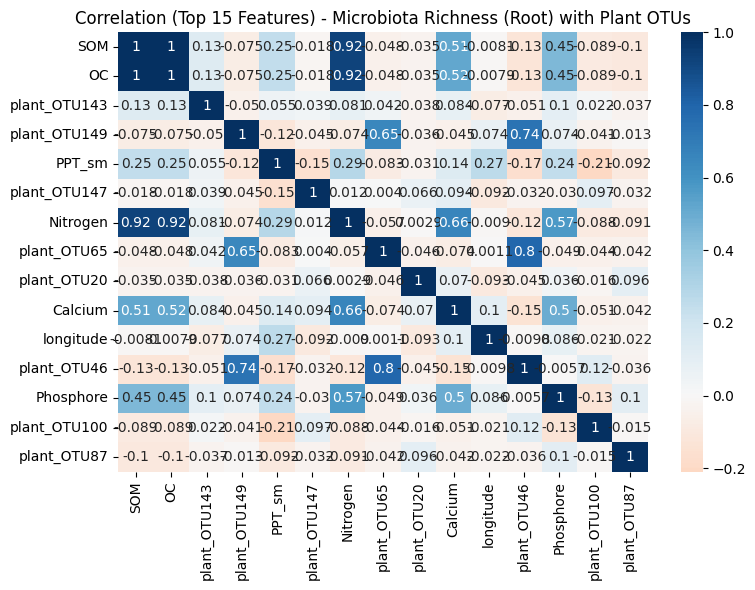


Dropping feature 'SOM' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.044, ΔR² = -0.034
   => Original RMSE: 1.159, Dropped RMSE: 1.141, ΔRMSE = -0.018


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.011, p-value = 0.1015

Dropping feature 'OC' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.045, ΔR² = -0.032
   => Original RMSE: 1.159, Dropped RMSE: 1.142, ΔRMSE = -0.017


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.010, p-value = 0.1091

Dropping feature 'plant_OTU143' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.063, ΔR² = -0.015
   => Original RMSE: 1.159, Dropped RMSE: 1.151, ΔRMSE = -0.008


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = 0.006, p-value = 0.366

Dropping feature 'plant_OTU149' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.045, ΔR² = -0.032
   => Original RMSE: 1.159, Dropped RMSE: 1.142, ΔRMSE = -0.018


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.002, p-value = 0.7966

Dropping feature 'PPT_sm' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.083, ΔR² = 0.006
   => Original RMSE: 1.159, Dropped RMSE: 1.163, ΔRMSE = 0.003


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = 0.041, p-value = 1.166e-05

Dropping feature 'plant_OTU147' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.044, ΔR² = -0.034
   => Original RMSE: 1.159, Dropped RMSE: 1.141, ΔRMSE = -0.018


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = 0.000, p-value = 0.985

Dropping feature 'Nitrogen' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.076, ΔR² = -0.002
   => Original RMSE: 1.159, Dropped RMSE: 1.158, ΔRMSE = -0.001


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.004, p-value = 0.5211

Dropping feature 'plant_OTU65' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.045, ΔR² = -0.033
   => Original RMSE: 1.159, Dropped RMSE: 1.142, ΔRMSE = -0.018


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.002, p-value = 0.7685

Dropping feature 'plant_OTU20' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.041, ΔR² = -0.037
   => Original RMSE: 1.159, Dropped RMSE: 1.140, ΔRMSE = -0.020


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.001, p-value = 0.8785

Dropping feature 'Calcium' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.064, ΔR² = -0.014
   => Original RMSE: 1.159, Dropped RMSE: 1.152, ΔRMSE = -0.007


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = 0.012, p-value = 0.0628

Dropping feature 'longitude' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.102, ΔR² = 0.024
   => Original RMSE: 1.159, Dropped RMSE: 1.172, ΔRMSE = 0.013


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = 0.005, p-value = 0.4915

Dropping feature 'plant_OTU46' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.045, ΔR² = -0.032
   => Original RMSE: 1.159, Dropped RMSE: 1.142, ΔRMSE = -0.017


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.004, p-value = 0.5709

Dropping feature 'Phosphore' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.068, ΔR² = -0.010
   => Original RMSE: 1.159, Dropped RMSE: 1.154, ΔRMSE = -0.005


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = 0.018, p-value = 0.0154

Dropping feature 'plant_OTU100' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.048, ΔR² = -0.030
   => Original RMSE: 1.159, Dropped RMSE: 1.143, ΔRMSE = -0.016


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.009, p-value = 0.2909

Dropping feature 'plant_OTU87' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.045, ΔR² = -0.033
   => Original RMSE: 1.159, Dropped RMSE: 1.142, ΔRMSE = -0.018


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.006, p-value = 0.3584

Dropping feature 'plant_OTU132' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.051, ΔR² = -0.026
   => Original RMSE: 1.159, Dropped RMSE: 1.145, ΔRMSE = -0.014


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.004, p-value = 0.4521

Dropping feature 'plant_OTU113' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.040, ΔR² = -0.038
   => Original RMSE: 1.159, Dropped RMSE: 1.139, ΔRMSE = -0.020


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.006, p-value = 0.4179

Dropping feature 'plant_OTU145' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.042, ΔR² = -0.035
   => Original RMSE: 1.159, Dropped RMSE: 1.140, ΔRMSE = -0.019


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = 0.002, p-value = 0.7633

Dropping feature 'PPT_wt' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.076, ΔR² = -0.002
   => Original RMSE: 1.159, Dropped RMSE: 1.158, ΔRMSE = -0.001


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = 0.002, p-value = 0.7268

Dropping feature 'WHC' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.047, ΔR² = -0.030
   => Original RMSE: 1.159, Dropped RMSE: 1.143, ΔRMSE = -0.016


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = 0.002, p-value = 0.7476

Dropping feature 'Manganese' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.042, ΔR² = -0.036
   => Original RMSE: 1.159, Dropped RMSE: 1.140, ΔRMSE = -0.019


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.001, p-value = 0.8809

Dropping feature 'Sodium' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.079, ΔR² = 0.002
   => Original RMSE: 1.159, Dropped RMSE: 1.160, ΔRMSE = 0.001


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = 0.004, p-value = 0.6014

Dropping feature 'plant_OTU216' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.036, ΔR² = -0.041
   => Original RMSE: 1.159, Dropped RMSE: 1.137, ΔRMSE = -0.022


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = 0.000, p-value = 0.9574

Dropping feature 'plant_OTU202' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.050, ΔR² = -0.028
   => Original RMSE: 1.159, Dropped RMSE: 1.144, ΔRMSE = -0.015


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = 0.014, p-value = 0.006981

Dropping feature 'pH' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.064, ΔR² = -0.014
   => Original RMSE: 1.159, Dropped RMSE: 1.152, ΔRMSE = -0.008


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = 0.014, p-value = 0.02954

Dropping feature 'plant_OTU78' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.045, ΔR² = -0.032
   => Original RMSE: 1.159, Dropped RMSE: 1.142, ΔRMSE = -0.017


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.007, p-value = 0.2262

Dropping feature 'plant_OTU198' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.042, ΔR² = -0.035
   => Original RMSE: 1.159, Dropped RMSE: 1.140, ΔRMSE = -0.019


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.002, p-value = 0.742

Dropping feature 'plant_OTU179' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.040, ΔR² = -0.038
   => Original RMSE: 1.159, Dropped RMSE: 1.139, ΔRMSE = -0.020


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.003, p-value = 0.6615

Dropping feature 'plant_OTU203' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.036, ΔR² = -0.042
   => Original RMSE: 1.159, Dropped RMSE: 1.137, ΔRMSE = -0.023


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.006, p-value = 0.3226

Dropping feature 'Potassium' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.047, ΔR² = -0.030
   => Original RMSE: 1.159, Dropped RMSE: 1.143, ΔRMSE = -0.016


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.004, p-value = 0.4578

Dropping feature 'plant_OTU154' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.045, ΔR² = -0.033
   => Original RMSE: 1.159, Dropped RMSE: 1.142, ΔRMSE = -0.018


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = 0.001, p-value = 0.9014

Dropping feature 'Magnesium' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.060, ΔR² = -0.017
   => Original RMSE: 1.159, Dropped RMSE: 1.150, ΔRMSE = -0.009


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = 0.001, p-value = 0.8393

Dropping feature 'plant_OTU71' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.049, ΔR² = -0.029
   => Original RMSE: 1.159, Dropped RMSE: 1.144, ΔRMSE = -0.016


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.005, p-value = 0.271

Dropping feature 'PPT_at' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.073, ΔR² = -0.004
   => Original RMSE: 1.159, Dropped RMSE: 1.157, ΔRMSE = -0.002


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.001, p-value = 0.8265

Dropping feature 'plant_OTU1' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.038, ΔR² = -0.039
   => Original RMSE: 1.159, Dropped RMSE: 1.138, ΔRMSE = -0.021


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.011, p-value = 0.04715

Dropping feature 'plant_OTU67' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.046, ΔR² = -0.031
   => Original RMSE: 1.159, Dropped RMSE: 1.142, ΔRMSE = -0.017


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.003, p-value = 0.527

Dropping feature 'CN' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.060, ΔR² = -0.018
   => Original RMSE: 1.159, Dropped RMSE: 1.150, ΔRMSE = -0.009


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = 0.003, p-value = 0.5888

Dropping feature 'Aluminium' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.047, ΔR² = -0.030
   => Original RMSE: 1.159, Dropped RMSE: 1.143, ΔRMSE = -0.016


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.005, p-value = 0.6289

Dropping feature 'PPT_sp' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.064, ΔR² = -0.013
   => Original RMSE: 1.159, Dropped RMSE: 1.152, ΔRMSE = -0.007


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.004, p-value = 0.6285

Dropping feature 'Elevation' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.061, ΔR² = -0.017
   => Original RMSE: 1.159, Dropped RMSE: 1.150, ΔRMSE = -0.009


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.004, p-value = 0.5709

Dropping feature 'Iron' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.045, ΔR² = -0.033
   => Original RMSE: 1.159, Dropped RMSE: 1.142, ΔRMSE = -0.018


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.013, p-value = 0.1823

Dropping feature 'plant_OTU27' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.042, ΔR² = -0.036
   => Original RMSE: 1.159, Dropped RMSE: 1.140, ΔRMSE = -0.019


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.004, p-value = 0.4826

Dropping feature 'MCMT' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.072, ΔR² = -0.005
   => Original RMSE: 1.159, Dropped RMSE: 1.157, ΔRMSE = -0.003


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = 0.001, p-value = 0.9305

Dropping feature 'plant_OTU18' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.042, ΔR² = -0.036
   => Original RMSE: 1.159, Dropped RMSE: 1.140, ΔRMSE = -0.019


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = 0.004, p-value = 0.4972

Dropping feature 'plant_OTU49' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.044, ΔR² = -0.033
   => Original RMSE: 1.159, Dropped RMSE: 1.141, ΔRMSE = -0.018


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.004, p-value = 0.5147

Dropping feature 'plant_OTU159' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.041, ΔR² = -0.036
   => Original RMSE: 1.159, Dropped RMSE: 1.140, ΔRMSE = -0.020


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.001, p-value = 0.9315

Dropping feature 'latitude' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.058, ΔR² = -0.020
   => Original RMSE: 1.159, Dropped RMSE: 1.149, ΔRMSE = -0.011


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.007, p-value = 0.3523

Dropping feature 'plant_OTU109' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.042, ΔR² = -0.036
   => Original RMSE: 1.159, Dropped RMSE: 1.140, ΔRMSE = -0.019


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.006, p-value = 0.4174

Dropping feature 'MAT' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.064, ΔR² = -0.014
   => Original RMSE: 1.159, Dropped RMSE: 1.152, ΔRMSE = -0.007


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.003, p-value = 0.7078

Dropping feature 'plant_OTU204' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.036, ΔR² = -0.042
   => Original RMSE: 1.159, Dropped RMSE: 1.137, ΔRMSE = -0.023


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = -0.001, p-value = 0.8143

Dropping feature 'plant_OTU136' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: -0.078, Dropped R2: -0.043, ΔR² = -0.034
   => Original RMSE: 1.159, Dropped RMSE: 1.141, ΔRMSE = -0.019


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


   => Repeated-CV: mean R2 diff = 0.002, p-value = 0.684

=== LOFO & Correlation Plot for Microbiota Richness (Leaf) with Plant OTUs ===
Using RobustScaler for scaling.
Training data scaled shape: (124, 67)
Test data scaled shape: (32, 67)
Training data shape after imputation: (124, 67)
Test data shape after imputation: (32, 67)
Starting training with early stopping using hardcoded parameters...
Task: Microbiota Richness (Leaf) with Plant OTUs
Full Feature Model - RMSE Train: 1.251, RMSE Test: 1.328


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


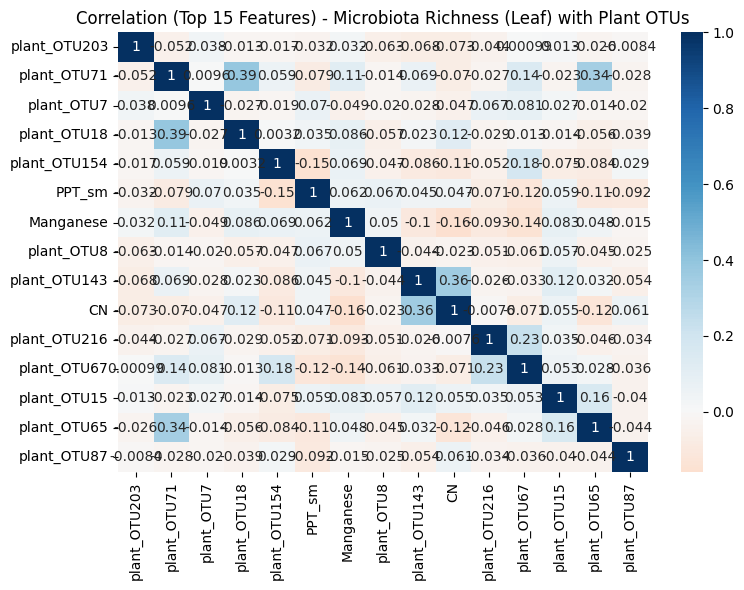


Dropping feature 'plant_OTU203' => measuring test performance difference...
Starting training with early stopping using hardcoded parameters...
   => Original R2: 0.004, Dropped R2: -0.004, ΔR² = 0.008
   => Original RMSE: 1.328, Dropped RMSE: 1.334, ΔRMSE = 0.006


/home/sg8311/.local/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


In [ ]:
"""
CONDITIONAL INDEPENDENCE TESTING USING HARDCODED XGBOOST PARAMETERS
"""

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split, KFold
from scipy.stats import ttest_rel
import xgboost as xgb

# ---------------------------------------------------------------------
# EXTERNAL FUNCTION: XGBOOST TRAINING WITH EARLY STOPPING USING HARD-CODED PARAMETERS
# ---------------------------------------------------------------------
def xgb_train_early_stopping(X, y, params, early_stopping_rounds=20, num_rounds=500, random_state=42):
    """
    Trains an XGBoost model with early stopping using the provided hardcoded parameters.
    
    Parameters:
      X : pandas.DataFrame
          Feature matrix.
      y : pandas.Series
          Target variable.
      params : dict
          Hardcoded parameters for XGBoost.
      early_stopping_rounds : int, optional
          Early stopping rounds.
      num_rounds : int, optional
          Maximum number of boosting rounds.
      random_state : int, optional
          Random state for reproducibility.
    
    Returns:
      model : trained XGBoost Booster
      X_test : Test set features (DataFrame)
      y_test : Test set targets (Series)
      rmse_train : RMSE on the training set
      rmse_test : RMSE on the test set
    """
    # Reset index to ensure alignment
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    
    # Further split training into sub-training and validation sets for early stopping
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_state)
    
    # Create DMatrices with feature names (as list) so that Booster returns proper keys
    dtrain = xgb.DMatrix(X_train_sub, label=y_train_sub, feature_names=X_train_sub.columns.tolist())
    dval = xgb.DMatrix(X_val, label=y_val, feature_names=X_val.columns.tolist())
    dtest = xgb.DMatrix(X_test, feature_names=X_test.columns.tolist())
    
    watchlist = [(dtrain, 'train'), (dval, 'eval')]
    
    print("Starting training with early stopping using hardcoded parameters...")
    model = xgb.train(params, dtrain, num_rounds, watchlist,
                      early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
    
    # Predict on the entire training set and test set
    y_pred_train = model.predict(xgb.DMatrix(X_train, feature_names=X_train.columns.tolist()))
    y_pred_test = model.predict(dtest)
    
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
    
    return model, X_test, y_test, rmse_train, rmse_test

# ---------------------------------------------------------------------
# LOFO and Correlation Plotting Function (using XGBoost baseline)
# ---------------------------------------------------------------------
def perform_lofo_and_correlation_plots(framework, tasks, top_k_corr=15,
                                       do_significance_test=True, test_mode=False,
                                       test_tasks_limit=1, figs_dir='figs'):
    """
    For each 'Richness' task, uses XGBoost with early stopping (with hardcoded parameters)
    as the baseline model, plots correlation heatmaps, performs LOFO analysis on all features,
    and returns dictionaries with results and figure paths.
    """
    
    if test_mode:
        subset_task_names = list(tasks.keys())[:test_tasks_limit]
        tasks = {k: tasks[k] for k in subset_task_names}
        print(f"[TEST MODE] Only running LOFO on the first {test_tasks_limit} tasks.")
    
    # Filter tasks to those involving 'Richness'
    richness_tasks = { t_name: t_info for t_name, t_info in tasks.items()
                       if "Richness" in t_name or "richness" in t_info['target'] }
    
    lofo_results = {}
    correlation_figs = {}
    feature_importance_figs = {}
    dataset_sizes = {}
    
    # Define hardcoded parameters for each task
    hardcoded_params = {
        "Microbiota Richness (Root) with Plant OTUs": {
            'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 
            'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 0.5, 
            'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
        },
        "Microbiota Richness (Leaf) with Plant OTUs": {
            'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 
            'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 
            'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
        },
        "Microbiota Richness (Root) with Plant Metrics": {
            'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 
            'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 
            'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
        },
        "Microbiota Richness (Leaf) with Plant Metrics": {
            'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4, 
            'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 
            'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
        },
        "Microbiota Shannon (Root) with Plant OTUs": {
            'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 
            'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 
            'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
        },
        "Microbiota Shannon (Leaf) with Plant OTUs": {
            'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 
            'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 
            'subsample': 0.8, 'objective': 'reg:squarederror', 'seed': 42
        },
        "Microbiota Shannon (Root) with Plant Metrics": {
            'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 4, 
            'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 
            'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
        },
        "Microbiota Shannon (Leaf) with Plant Metrics": {
            'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 
            'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 
            'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
        },
        "Pathobiota Richness (Root) with Plant OTUs": {
            'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 5, 
            'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 2.0, 
            'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
        },
        "Pathobiota Richness (Leaf) with Plant OTUs": {
            'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 
            'min_child_weight': 1, 'reg_alpha': 0.5, 'reg_lambda': 2.0, 
            'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
        },
        "Pathobiota Richness (Root) with Plant Metrics": {
            'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 5, 
            'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 
            'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
        },
        "Pathobiota Richness (Leaf) with Plant Metrics": {
            'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 
            'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 
            'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
        },
        "Pathobiota Shannon (Root) with Plant OTUs": {
            'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 
            'min_child_weight': 5, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 
            'subsample': 0.9, 'objective': 'reg:squarederror', 'seed': 42
        },
        "Pathobiota Shannon (Leaf) with Plant OTUs": {
            'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3, 
            'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 
            'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
        },
        "Pathobiota Shannon (Root) with Plant Metrics": {
            'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 
            'min_child_weight': 1, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 
            'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
        },
        "Pathobiota Shannon (Leaf) with Plant Metrics": {
            'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4, 
            'min_child_weight': 5, 'reg_alpha': 0.1, 'reg_lambda': 2.0, 
            'subsample': 0.7, 'objective': 'reg:squarederror', 'seed': 42
        }
    }
    
    for task_name, task_info in richness_tasks.items():
        print(f"\n=== LOFO & Correlation Plot for {task_name} ===")
        target = task_info['target']
        all_features = task_info['features']
    
        # Prepare data from framework (assumes framework.data is a DataFrame)
        X_full = framework.data[all_features]
        y_full = framework.data[target]
    
        # Use the framework's imputation (and scaling) method
        X_train, X_test, y_train, y_test = framework.impute_or_drop(X_full, y_full)
        X_train = X_train.reset_index(drop=True)
        X_test = X_test.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)
        X_train = X_train.apply(pd.to_numeric, errors='coerce')
        X_test = X_test.apply(pd.to_numeric, errors='coerce')
    
        num_rows, num_cols = X_train.shape
        dataset_sizes[task_name] = (num_rows, num_cols + 1)
    
        # Retrieve hardcoded parameters for the task; if not found, use default parameters
        params = hardcoded_params.get(task_name, {
            'objective': 'reg:squarederror',
            'max_depth': 3,
            'learning_rate': 0.05,
            'min_child_weight': 5,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'gamma': 1.0,
            'reg_alpha': 0.5,
            'reg_lambda': 1.0,
            'seed': 42
        })
    
        # Baseline model using XGBoost with early stopping
        model, X_test_model, y_test_model, rmse_train, rmse_test = xgb_train_early_stopping(
            X_train, y_train, params, early_stopping_rounds=20
        )
        dtest = xgb.DMatrix(X_test, feature_names=X_test.columns.tolist())
        y_pred_test = model.predict(dtest)
        baseline_r2 = r2_score(y_test, y_pred_test)
        baseline_rmse = sqrt(mean_squared_error(y_test, y_pred_test))
        baseline_std = np.std(y_test)
        print(f"Task: {task_name}")
        print(f"Full Feature Model - RMSE Train: {rmse_train:.3f}, RMSE Test: {baseline_rmse:.3f}")
    
        # Get feature importances from the Booster (using gain)
        importance_dict = model.get_score(importance_type='gain')
        importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance'])
        importance_df = importance_df.sort_values("Importance", ascending=False)
    
        # Plot and save feature importance
        plt.figure(figsize=(6, 4))
        sns.barplot(x="Importance", y="Feature", data=importance_df.head(15))
        plt.title(f"Importance - {task_name}")
        plt.tight_layout()
        safe_task_name = task_name.replace(" ", "_").replace("(", "").replace(")", "").replace("/", "")
        featimp_path = os.path.join(figs_dir, f"{safe_task_name}_feature_importance.png")
        # plt.savefig(featimp_path, dpi=150)
        plt.close()
        feature_importance_figs[task_name] = featimp_path
    
        # Plot correlation heatmap for the top_k_corr features (as per importance order)
        top_features_for_corr = importance_df.head(top_k_corr)['Feature'].tolist()
        top_features_for_corr = [f for f in top_features_for_corr if f in X_train.columns]
        corr_matrix = X_train[top_features_for_corr].corr()
        plt.figure(figsize=(8,6))
        sns.heatmap(corr_matrix, annot=True, cmap='RdBu', center=0)
        plt.title(f"Correlation (Top {top_k_corr} Features) - {task_name}")
        plt.tight_layout()
        fig_path = os.path.join(figs_dir, f"{safe_task_name}_corr_heatmap.png")
        # plt.savefig(fig_path, dpi=150)
        plt.show()
        plt.close()
        correlation_figs[task_name] = fig_path
    
        # LOFO analysis using XGBoost with early stopping over ALL features
        all_feats = importance_df['Feature'].tolist()  # use all features
        drop_results = []
    
        for feat in all_feats:
            print(f"\nDropping feature '{feat}' => measuring test performance difference...")
            X_train_drop = X_train.drop(columns=[feat], errors='ignore')
            X_test_drop = X_test.drop(columns=[feat], errors='ignore')
    
            model_drop, X_test_drop_model, y_test_drop, rmse_train_drop, rmse_test_drop = xgb_train_early_stopping(
                X_train_drop, y_train, params, early_stopping_rounds=20
            )
            dtest_drop = xgb.DMatrix(X_test_drop, feature_names=X_test_drop.columns.tolist())
            y_pred_drop = model_drop.predict(dtest_drop)
            drop_r2 = r2_score(y_test, y_pred_drop)
            drop_rmse = sqrt(mean_squared_error(y_test, y_pred_drop))
    
            r2_diff = baseline_r2 - drop_r2
            rmse_diff = drop_rmse - baseline_rmse
            print(f"   => Original R2: {baseline_r2:.3f}, Dropped R2: {drop_r2:.3f}, ΔR² = {r2_diff:.3f}")
            print(f"   => Original RMSE: {baseline_rmse:.3f}, Dropped RMSE: {drop_rmse:.3f}, ΔRMSE = {rmse_diff:.3f}")
    
            if do_significance_test:
                sig_result = lofo_significance_test(
                    X_train, y_train, feature_to_drop=feat, n_splits=5, n_repeats=3
                )
                p_val = sig_result['p_val']
                mean_diff_cv = sig_result['mean_diff']
                print(f"   => Repeated-CV: mean R2 diff = {mean_diff_cv:.3f}, p-value = {p_val:.4g}")
            else:
                p_val = None
                mean_diff_cv = None
    
            drop_results.append({
                "feature": feat,
                "Test_R2_after_drop": drop_r2,
                "Test_R2_diff": r2_diff,
                "Test_RMSE_after_drop": drop_rmse,
                "Test_RMSE_diff": rmse_diff,
                "Train_RMSE_after_drop": rmse_train_drop,
                "Test_Std": np.std(y_test),
                "RepeatedCV_mean_diff": mean_diff_cv,
                "RepeatedCV_p_value": p_val
            })
    
        # Determine best-drop(s): find the drop with lowest test RMSE
        if drop_results:
            drop_rmses = [d["Test_RMSE_after_drop"] for d in drop_results]
            min_rmse = min(drop_rmses)
            tolerance = 1e-6  # use a small tolerance
            best_drops = [d for d in drop_results if abs(d["Test_RMSE_after_drop"] - min_rmse) < tolerance]
        else:
            best_drops = []
    
        lofo_result_for_task = {
            "Baseline R2": baseline_r2,
            "Baseline RMSE": baseline_rmse,
            "Baseline Test Std": baseline_std,
            "Feature_Drops": drop_results,
            "Best_Drops": best_drops
        }
    
        lofo_results[task_name] = lofo_result_for_task
    
    return lofo_results, correlation_figs, dataset_sizes, feature_importance_figs

# ---------------------------------------------------------------------
# LOFO Significance Test Function (unchanged)
# ---------------------------------------------------------------------
def lofo_significance_test(X, y, feature_to_drop, n_splits=5, n_repeats=3):
    r2_full_scores = []
    r2_drop_scores = []
    for random_seed in range(n_repeats):
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42 + random_seed)
        for train_idx, test_idx in kf.split(X):
            X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
            y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]
            model_full = RandomForestRegressor(
                n_estimators=400, random_state=42, max_features='sqrt',
                max_depth=10, min_samples_split=5, min_samples_leaf=3
            )
            model_full.fit(X_train_cv, y_train_cv)
            y_pred_full = model_full.predict(X_test_cv)
            r2_full = r2_score(y_test_cv, y_pred_full)
            r2_full_scores.append(r2_full)
    
            X_train_dropped = X_train_cv.drop(columns=[feature_to_drop], errors='ignore')
            X_test_dropped = X_test_cv.drop(columns=[feature_to_drop], errors='ignore')
            model_drop = RandomForestRegressor(
                n_estimators=400, random_state=42, max_features='sqrt',
                max_depth=10, min_samples_split=5, min_samples_leaf=3
            )
            model_drop.fit(X_train_dropped, y_train_cv)
            y_pred_drop = model_drop.predict(X_test_dropped)
            r2_drop = r2_score(y_test_cv, y_pred_drop)
            r2_drop_scores.append(r2_drop)
    r2_full_scores = np.array(r2_full_scores)
    r2_drop_scores = np.array(r2_drop_scores)
    r2_diff = r2_full_scores - r2_drop_scores
    mean_diff = np.mean(r2_diff)
    t_stat, p_val = ttest_rel(r2_full_scores, r2_drop_scores)
    return {
        'mean_diff': mean_diff,
        'p_val': p_val,
        'full_model_mean_r2': np.mean(r2_full_scores),
        'drop_model_mean_r2': np.mean(r2_drop_scores),
        'n_splits': n_splits,
        'n_repeats': n_repeats
    }

# ---------------------------------------------------------------------
# PowerPoint Report Generation
# ---------------------------------------------------------------------
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN

def create_powerpoint_report(lofo_results, correlation_figs=None, dataset_sizes=None,
                             feature_importance_figs=None, output_pptx='report.pptx'):
    prs = Presentation()
    # Title slide
    title_slide_layout = prs.slide_layouts[0]
    slide = prs.slides.add_slide(title_slide_layout)
    slide.shapes.title.text = "Ecodynamics AI - Models Results"
    slide.placeholders[1].text = "Data Analysis"
    # Dataset sizes slide
    bullet_slide_layout = prs.slide_layouts[1]
    ds_slide = prs.slides.add_slide(bullet_slide_layout)
    ds_slide.shapes.title.text = "Dataset Sizes"
    ds_body = ds_slide.shapes.placeholders[1].text_frame
    ds_body.text = "Each task uses a dataset with the following shape (X_train):\n"
    for task_name, (rows, cols) in dataset_sizes.items():
        p = ds_body.add_paragraph()
        p.level = 1
        p.text = f"{task_name}: {rows} rows, {cols} columns"
    # Feature importance slides
    image_slide_layout = prs.slide_layouts[5]
    for task_name, fig_path in feature_importance_figs.items():
        if not os.path.exists(fig_path):
            print(f"[WARNING] Feature Importance file not found: {fig_path}")
            continue
        slide_fi = prs.slides.add_slide(image_slide_layout)
        slide_fi.shapes.title.text = f"Feature Importance: {task_name}"
        left = Inches(1)
        top = Inches(1.5)
        height = Inches(4)
        slide_fi.shapes.add_picture(fig_path, left, top, height=height)
    # LOFO results slides
    for task_name, lofo_data in lofo_results.items():
        slide_lofo = prs.slides.add_slide(bullet_slide_layout)
        slide_lofo.shapes.title.text = f"LOFO Results: {task_name}"
        tf_lofo = slide_lofo.shapes.placeholders[1].text_frame
        baseline_rmse = lofo_data["Baseline RMSE"]
        tf_lofo.text = f"Baseline RMSE: {baseline_rmse:.3f}"
        # Report best-drop features
        best_drops = lofo_data.get("Best_Drops", [])
        if best_drops:
            drop_texts = [f"{d['feature']} (Train RMSE: {d['Train_RMSE_after_drop']:.3f}, Test RMSE: {d['Test_RMSE_after_drop']:.3f}, Test Std: {d['Test_Std']:.3f})" for d in best_drops]
            tf_lofo.text += "\nBest Drop(s): " + ", ".join(drop_texts)
        # List all drop details (optional)
        drops = lofo_data["Feature_Drops"]
        for drop_info in drops:
            p = tf_lofo.add_paragraph()
            p.level = 1
            feat = drop_info["feature"]
            rmse_diff = drop_info["Test_RMSE_diff"]
            rmse_after = drop_info["Test_RMSE_after_drop"]
            cv_diff = drop_info.get("RepeatedCV_mean_diff", None)
            p_val = drop_info.get("RepeatedCV_p_value", None)
            text_str = (f"Drop '{feat}' => RMSE diff: {rmse_diff:+.3f} (RMSE after drop: {rmse_after:.3f})")
            if cv_diff is not None and p_val is not None:
                text_str += f" | p = {p_val:.3g}"
            p.text = text_str
    # Correlation heatmap slides
    for task_name, fig_path in correlation_figs.items():
        if not os.path.exists(fig_path):
            print(f"[WARNING] Correlation fig not found: {fig_path}")
            continue
        slide_corr = prs.slides.add_slide(image_slide_layout)
        slide_corr.shapes.title.text = f"Correlation Heatmap: {task_name}"
        left = Inches(1)
        top = Inches(1.5)
        height = Inches(4)
        slide_corr.shapes.add_picture(fig_path, left, top, height=height)
    prs.save(output_pptx)
    print(f"PowerPoint saved to {output_pptx}")

# ---------------------------------------------------------------------
# USAGE EXAMPLE:
# ---------------------------------------------------------------------
# Assume that 'framework' is an object that contains the main dataset in framework.data
# and that 'tasks' is a dictionary with tasks (each task having keys 'target' and 'features').
# For example:
# tasks = {
#     "Microbiota Richness (Root) with Plant OTUs": {
#         "target": "richness_microbiota_root",
#         "features": framework.feature_categories['environmental'] + framework.feature_categories['plant_otus']
#     },
#     ...
# }
#
# Now we call the LOFO & correlation plotting function and then create the PowerPoint report.

lofo_results, correlation_figs, dataset_sizes, feature_importance_figs = perform_lofo_and_correlation_plots(
    framework, tasks,
    top_k_corr=15,
    do_significance_test=True,
    test_mode=False
)

create_powerpoint_report(
    lofo_results=lofo_results,
    correlation_figs=correlation_figs,
    dataset_sizes=dataset_sizes,
    feature_importance_figs=feature_importance_figs,
    output_pptx="final_analysis_report.pptx"
)



=== LOFO & Correlation Plot for Microbiota Richness (Root) with Plant OTUs ===
Using RobustScaler for scaling.
Training data scaled shape: (127, 67)
Test data scaled shape: (32, 67)
Training data shape after imputation: (127, 67)
Test data shape after imputation: (32, 67)

--- Feature Importances ---

         Feature  Importance
7         PPT_sm    0.061495
13       Calcium    0.047513
12     Phosphore    0.045389
1      longitude    0.040802
18     Aluminium    0.039019
..           ...         ...
40   plant_OTU78    0.001409
47  plant_OTU114    0.001046
59  plant_OTU196    0.001032
66  plant_OTU234    0.001006
39   plant_OTU72    0.000154

[67 rows x 2 columns]


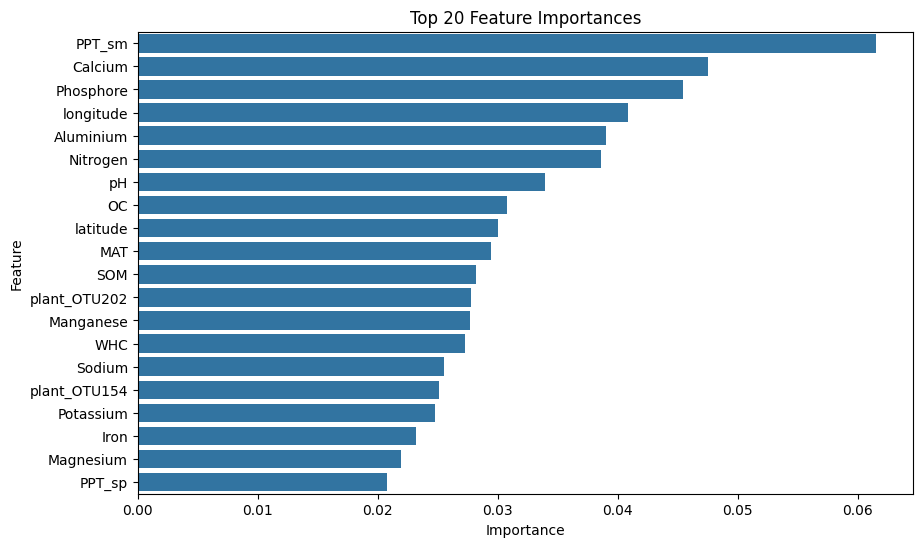

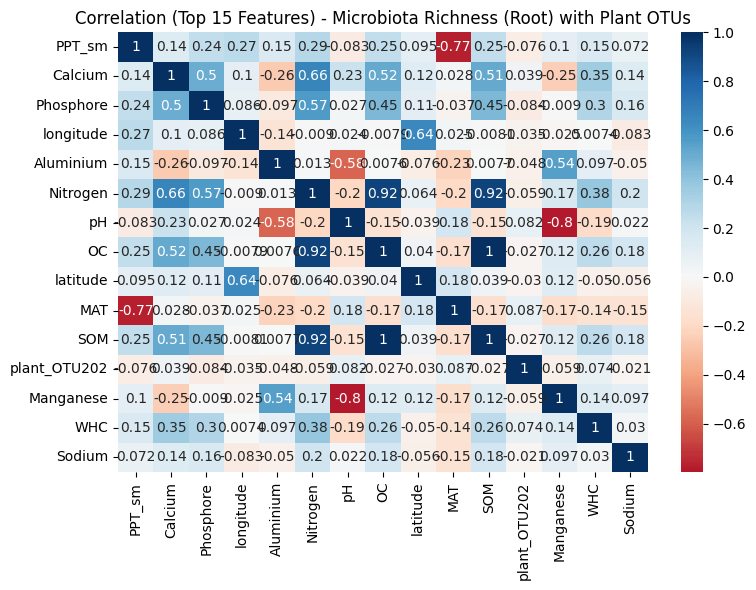


Dropping feature 'PPT_sm' => measuring test performance difference...
   => Original R2: 0.108, Dropped R2: 0.108, ΔR² = -0.000
   => Original RMSE: 1.055, Dropped RMSE: 1.055, ΔRMSE = -0.000
   => Repeated-CV: mean R2 diff = 0.041, p-value = 1.166e-05

Dropping feature 'Calcium' => measuring test performance difference...
   => Original R2: 0.108, Dropped R2: 0.134, ΔR² = -0.026
   => Original RMSE: 1.055, Dropped RMSE: 1.039, ΔRMSE = -0.015


KeyboardInterrupt: 

In [24]:
"""
CONDITIONAL INDEPENDENCE TESTING
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import ttest_rel



def perform_lofo_and_correlation_plots(framework, tasks, top_k_lofo=30, top_k_corr=15,
                                       do_significance_test=True, test_mode=False,
    test_tasks_limit=1, figs_dir='figs'):
    """
    Trains or retrieves models for each 'Richness' task, plots correlation heatmaps,
    performs LOFO, and saves figures in `figs_dir`.

    1) Filter tasks to only those involving 'Richness'.
    2) For each 'Richness' task:
       - Train (or retrieve) a RandomForest model on *all* features, get baseline performance.
       - Determine top_k_corr features => plot correlation heatmap.
       - Then do LOFO on top_k_lofo features => check performance drop
         AND optionally call lofo_significance_test for repeated-CV p-value.
    3) Return a dictionary with LOFO results for each task.
    """

    # Ensure the directory to store figures exists


    # If test_mode, slice the tasks dictionary
    if test_mode:
        # convert tasks to list and slice
        subset_task_names = list(tasks.keys())[:test_tasks_limit]
        tasks = {k: tasks[k] for k in subset_task_names}
        print(f"[TEST MODE] Only running LOFO on the first {test_tasks_limit} tasks.")


    # Identify tasks that have 'Richness'
    richness_tasks = {
        t_name: t_info
        for t_name, t_info in tasks.items()
        if "Richness" in t_name or "richness" in t_info['target']
    }

    lofo_results = {}
    correlation_figs = {}  # new dictionary to store figure paths
    feature_importance_figs = {}
    dataset_sizes = {}


    for task_name, task_info in richness_tasks.items():
        print(f"\n=== LOFO & Correlation Plot for {task_name} ===")

        target = task_info['target']
        all_features = task_info['features']

        # Prepare data
        X_full = framework.data[all_features]  # entire dataset
        y_full = framework.data[target]

        # Use your pipeline's method
        X_train, X_test, y_train, y_test = framework.impute_or_drop(X_full, y_full)


        # Record dataset size (rows, columns) for this task
        num_rows, num_cols = X_train.shape
        dataset_sizes[task_name] = (num_rows, num_cols + 1)  # +1 to count the target column if you wish


        # Train a baseline model on the training set
        model = RandomForestRegressor(
            n_estimators=400,
            random_state=42,
            max_features='sqrt',
            oob_score=True,
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=3
        )
        model.fit(X_train, y_train)

        # Baseline performance on the test set
        y_pred_test = model.predict(X_test)
        baseline_r2 = r2_score(y_test, y_pred_test)
        baseline_rmse = sqrt(mean_squared_error(y_test, y_pred_test))

        # Get feature importances
        importance_df = framework.analyze_feature_importance(model, all_features)
        importance_df = importance_df.sort_values("Importance", ascending=False)

        # -----------------------------------------------------
        # Plot & save a bar chart of feature importance
        # -----------------------------------------------------
        plt.figure(figsize=(6, 4))
        sns.barplot(x="Importance", y="Feature", data=importance_df.head(15))  # top 15 or all
        plt.title(f"Importance - {task_name}")
        plt.tight_layout()

        # Build a safe filename
        safe_task_name = task_name.replace(" ", "_").replace("(", "").replace(")", "").replace("/", "")
        featimp_filename = f"{safe_task_name}_feature_importance.png"
        featimp_path = os.path.join(figs_dir, featimp_filename)

        plt.close()

        # Store path
        feature_importance_figs[task_name] = featimp_path


        # Plot Correlation Heatmap for Top k
        top_features_for_corr = importance_df.head(top_k_corr)['Feature'].tolist()
        top_features_for_corr = [f for f in top_features_for_corr if f in X_train.columns]

        corr_matrix = X_train[top_features_for_corr].corr()

        plt.figure(figsize=(8,6))
        sns.heatmap(corr_matrix, annot=True, cmap='RdBu', center=0)
        plt.title(f"Correlation (Top {top_k_corr} Features) - {task_name}")
        plt.tight_layout()

        # 1) Construct a filename
        safe_task_name = task_name.replace(" ", "_").replace("(", "").replace(")", "").replace("/", "")
        fig_filename = f"{safe_task_name}_corr_heatmap.png"
        fig_path = os.path.join(figs_dir, fig_filename)

        # 2) Save figure

        # Then display (optional)
        plt.show()

        # Close if you want to free memory
        plt.close()

        # 3) Store path for this task
        correlation_figs[task_name] = fig_path


        # 2) LOFO for Top top_k_lofo
        top_features_for_lofo = importance_df.head(top_k_lofo)['Feature'].tolist()

        lofo_result_for_task = {
            "Baseline R2": baseline_r2,
            "Baseline RMSE": baseline_rmse,
            "Feature_Drops": []
        }

        for feat in top_features_for_lofo:
            print(f"\nDropping feature '{feat}' => measuring test performance difference...")

            # Drop from X_train / X_test
            X_train_drop = X_train.drop(columns=[feat], errors='ignore')
            X_test_drop = X_test.drop(columns=[feat], errors='ignore')

            model_drop = RandomForestRegressor(
                n_estimators=400,
                random_state=42,
                max_features='sqrt',
                oob_score=True,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=3
            )
            model_drop.fit(X_train_drop, y_train)

            y_pred_drop = model_drop.predict(X_test_drop)
            drop_r2 = r2_score(y_test, y_pred_drop)
            drop_rmse = sqrt(mean_squared_error(y_test, y_pred_drop))

            r2_diff = baseline_r2 - drop_r2
            rmse_diff = drop_rmse - baseline_rmse

            print(f"   => Original R2: {baseline_r2:.3f}, Dropped R2: {drop_r2:.3f}, ΔR² = {r2_diff:.3f}")
            print(f"   => Original RMSE: {baseline_rmse:.3f}, Dropped RMSE: {drop_rmse:.3f}, ΔRMSE = {rmse_diff:.3f}")

            # (Optional) => Repeated-CV significance test
            if do_significance_test:
                # Decide on whether to pass X_full,y_full or X_train,y_train
                # Usually repeated CV is done on the entire dataset.
                # Here we do it on the training set only, but either is possible.
                sig_result = lofo_significance_test(
                    X_train,  # or X_full
                    y_train,  # or y_full
                    feature_to_drop=feat,
                    n_splits=5,
                    n_repeats=3
                )
                p_val = sig_result['p_val']
                mean_diff_cv = sig_result['mean_diff']
                print(f"   => Repeated-CV: mean R2 diff = {mean_diff_cv:.3f}, p-value = {p_val:.4g}")
            else:
                p_val = None
                mean_diff_cv = None

            lofo_result_for_task["Feature_Drops"].append({
                "feature": feat,
                "Test_R2_after_drop": drop_r2,
                "Test_R2_diff": r2_diff,
                "Test_RMSE_after_drop": drop_rmse,
                "Test_RMSE_diff": rmse_diff,
                "RepeatedCV_mean_diff": mean_diff_cv,
                "RepeatedCV_p_value": p_val
            })

        lofo_results[task_name] = lofo_result_for_task

    return lofo_results, correlation_figs, dataset_sizes, feature_importance_figs




def lofo_significance_test(X, y, feature_to_drop, n_splits=5, n_repeats=3):
    """
    Perform a LOFO test for 'feature_to_drop' using repeated CV and
    return the mean R² difference and a p-value from a paired t-test.

    - X, y: the entire dataset on which to do cross-validation
    - feature_to_drop: the name of the feature we drop
    - n_splits: number of folds for cross-validation
    - n_repeats: how many times to repeat with different random seeds
    """
    r2_full_scores = []
    r2_drop_scores = []

    # Setup repeated K-fold
    for random_seed in range(n_repeats):
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42 + random_seed)

        for train_idx, test_idx in kf.split(X):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            # --- Full model ---
            model_full = RandomForestRegressor(
                n_estimators=400,
                random_state=42,
                max_features='sqrt',
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=3
            )
            model_full.fit(X_train, y_train)
            y_pred_full = model_full.predict(X_test)
            r2_full = r2_score(y_test, y_pred_full)
            r2_full_scores.append(r2_full)

            # --- Dropped-feature model ---
            X_train_dropped = X_train.drop(columns=[feature_to_drop], errors='ignore')
            X_test_dropped = X_test.drop(columns=[feature_to_drop], errors='ignore')

            model_drop = RandomForestRegressor(
                n_estimators=400,
                random_state=42,
                max_features='sqrt',
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=3
            )
            model_drop.fit(X_train_dropped, y_train)
            y_pred_drop = model_drop.predict(X_test_dropped)
            r2_drop = r2_score(y_test, y_pred_drop)
            r2_drop_scores.append(r2_drop)

    r2_full_scores = np.array(r2_full_scores)
    r2_drop_scores = np.array(r2_drop_scores)

    # Compute the differences
    r2_diff = r2_full_scores - r2_drop_scores  # if positive => full model does better
    mean_diff = np.mean(r2_diff)

    # Paired t-test
    t_stat, p_val = ttest_rel(r2_full_scores, r2_drop_scores)

    return {
        'mean_diff': mean_diff,
        'p_val': p_val,
        'full_model_mean_r2': np.mean(r2_full_scores),
        'drop_model_mean_r2': np.mean(r2_drop_scores),
        'n_splits': n_splits,
        'n_repeats': n_repeats
    }




import os
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN

def create_powerpoint_report(
    lofo_results,
    correlation_figs=None,
    dataset_sizes=None,
    feature_importance_figs=None,
    output_pptx='report.pptx'
):
    """
    Create a PowerPoint presentation summarizing LOFO, correlation heatmaps,
    and partial correlation results (if provided).

    :param lofo_results: dict with LOFO results. See example structure above.
    :param correlation_figs: dict mapping task_name -> path_to_corr_figure.png
    :param partial_corr_results: dict mapping task_name -> list of partial corr dicts
    :param output_pptx: str, path to save the output PPTX file.
    """

    prs = Presentation()

    # (1) Title Slide (layout index 0)
    title_slide_layout = prs.slide_layouts[0]
    slide = prs.slides.add_slide(title_slide_layout)
    slide.shapes.title.text = "Ecodynamics AI - Models Results"
    slide.placeholders[1].text = "Data Analysis"

    # (2) Dataset Sizes Slide
    # layout index 1 is usually "Title and Content"
    bullet_slide_layout = prs.slide_layouts[1]
    ds_slide = prs.slides.add_slide(bullet_slide_layout)
    ds_slide.shapes.title.text = "Dataset Sizes"

    ds_body = ds_slide.shapes.placeholders[1].text_frame
    ds_body.text = "Each task uses a dataset with the following shape(X_train):\n"

    for task_name, (rows, cols) in dataset_sizes.items():
        p = ds_body.add_paragraph()
        p.level = 1
        p.text = f"{task_name}: {rows} rows, {cols} columns"

    # (3) Feature Importance Slides
    # layout index 5 might be "Title Only" or blank
    image_slide_layout = prs.slide_layouts[5]
    for task_name, fig_path in feature_importance_figs.items():
        if not os.path.exists(fig_path):
            print(f"[WARNING] Feature Importance file not found: {fig_path}")
            continue

        slide_fi = prs.slides.add_slide(image_slide_layout)
        slide_fi.shapes.title.text = f"Feature Importance: {task_name}"

        left = Inches(1)
        top = Inches(1.5)
        height = Inches(4)

        slide_fi.shapes.add_picture(fig_path, left, top, height=height)

    # (4) LOFO Results Slides
    # We'll reuse layout index 1 for bullets
    for task_name, lofo_data in lofo_results.items():
        slide_lofo = prs.slides.add_slide(bullet_slide_layout)
        slide_lofo.shapes.title.text = f"LOFO(leave-one-feature-out) Results: {task_name}"

        tf_lofo = slide_lofo.shapes.placeholders[1].text_frame
        #baseline_r2 = lofo_data["Baseline R2"]
        baseline_rmse = lofo_data["Baseline RMSE"]
        #tf_lofo.text = f"Baseline R²: {baseline_r2:.3f}, Baseline RMSE: {baseline_rmse:.3f}"
        tf_lofo.text = f"Baseline RMSE: {baseline_rmse:.3f}"


        # List feature drops
        drops = lofo_data["Feature_Drops"]
        for drop_info in drops:
            p = tf_lofo.add_paragraph()
            p.level = 1

            feat = drop_info["feature"]
            rmse_diff = drop_info["Test_RMSE_diff"]  # e.g. +0.007
            rmse_after = drop_info["Test_RMSE_after_drop"]  # e.g. 1.060

            # If you have repeated CV stats
            cv_diff = drop_info.get("RepeatedCV_mean_diff", None)
            p_val = drop_info.get("RepeatedCV_p_value", None)

            # Build the text string
            text_str = (f"Drop '{feat}' => "
                        f"RMSE diff: {rmse_diff:+.3f} "
                        f"(RMSE after drop: {rmse_after:.3f})")

            # If repeated CV info is available, append it
            if cv_diff is not None and p_val is not None:
                # e.g. "| CV diff = +0.054, p = 4.261e-07"
                #text_str += f" | CV diff = {cv_diff:+.3f}, p = {p_val:.3g}"
                text_str += f" | p = {p_val:.3g}"

            p.text = text_str

    # (5) Correlation Heatmaps Slides
    # Same approach
    for task_name, fig_path in correlation_figs.items():
        if not os.path.exists(fig_path):
            print(f"[WARNING] Correlation fig not found: {fig_path}")
            continue

        slide_corr = prs.slides.add_slide(image_slide_layout)
        slide_corr.shapes.title.text = f"Correlation Heatmap (Top-10): {task_name}"

        left = Inches(1)
        top = Inches(1.5)
        height = Inches(4)

        slide_corr.shapes.add_picture(fig_path, left, top, height=height)

    # (6) Save the PPTX
    prs.save(output_pptx)
    print(f"PowerPoint saved to {output_pptx}")




lofo_results, correlation_figs, dataset_sizes, feature_importance_figs = perform_lofo_and_correlation_plots(framework, tasks,
    top_k_lofo=30,
    top_k_corr=15,
    do_significance_test=True,
    test_mode=False
)



create_powerpoint_report(
    lofo_results=lofo_results,
    correlation_figs=correlation_figs,
    dataset_sizes=dataset_sizes,
    feature_importance_figs=feature_importance_figs,
    output_pptx="final_analysis_report.pptx"
)




# This will:
# 1) Train models for each Richness task
# 2) Plot correlation for the top 10 features
# 3) Run LOFO on the top 5 features
# 4) For each feature drop, do a repeated CV LOFO significance test
# 5) Return a dictionary with all the results

In [ ]:
correlation_figs

{'Microbiota Richness (Root) with Plant OTUs': 'figs/Microbiota_Richness_Root_with_Plant_OTUs_corr_heatmap.png'}

In [ ]:
%pip install python-pptx
#framework.display_results()

"""Print the results in a nice-looking table for a PowerPoint presentation."""
table_data = []
headers = ["Task", "RMSE (Train)", "RMSE (Test)", "Linear RMSE (Train)", "Linear RMSE (Test)", "Standard Deviation Y test", "Top-k RMSE (Train)", "Top-k RMSE (Test)"]



for task_name, metrics in framework.results.items():
    table_data.append([
        task_name,
        f"{metrics['RMSE (Train)']:.3f}",
        f"{metrics['RMSE (Test)']:.3f}",
        f"{metrics['Linear RMSE (Train)']:.3f}",
        f"{metrics['Linear RMSE (Test)']:.3f}",
        f"{metrics['Standard Deviation Y test']:.3f}",
        f"{metrics['Top-k RMSE (Train)']:.3f}",
        f"{metrics['Top-k RMSE (Test)']:.3f}"
    ])

# print(tabulate(table_data, headers=headers, tablefmt="grid"))


# framework.print_results_table()

from pptx import Presentation
from pptx.util import Inches
from pptx.dml.color import RGBColor
from pptx.oxml import parse_xml

# Create PowerPoint presentation
prs = Presentation()
slide_layout = prs.slide_layouts[5]  # Blank slide layout
slide = prs.slides.add_slide(slide_layout)

# Prepare data (using your existing variables)
combined_data = [headers] + table_data  # Include headers as first row

# Calculate table dimensions
rows = len(combined_data)
cols = len(headers)

# Create table (position and size)
left = Inches(0.5)
top = Inches(1)
width = Inches(9)  # Slide width is typically 13.33", adjust as needed
height = Inches(0.5)
table_shape = slide.shapes.add_table(rows, cols, left, top, width, height)
table = table_shape.table

# Populate table with styling
for row_idx, row in enumerate(combined_data):
    for col_idx, value in enumerate(row):
        cell = table.cell(row_idx, col_idx)
        cell.text = str(value)

        # Style header row
        if row_idx == 0:
            cell.fill.solid()
            cell.fill.fore_color.rgb = RGBColor(59, 89, 152)  # Blue header
            paragraph = cell.text_frame.paragraphs[0]
            paragraph.font.color.rgb = RGBColor(255, 255, 255)  # White text
            paragraph.font.bold = True

# Auto-adjust column widths (percentage-based)
col_widths = [1.5, 1.0, 1.0, 1.2, 1.2, 1.5, 1.2, 1.2]  # Relative widths
total_width = sum(col_widths)
for col_idx, width in enumerate(col_widths):
    table.columns[col_idx].width = Inches(width * (9 / total_width))  # 9" total width

# Add slide title
title_shape = slide.shapes.add_textbox(Inches(0.5), Inches(0.2), Inches(9), Inches(0.5))
title_frame = title_shape.text_frame
title_frame.text = "Model Performance Metrics"
title_frame.paragraphs[0].font.bold = True
title_frame.paragraphs[0].font.size = Inches(0.2)

# Save presentation
prs.save("model_performance.pptx")
print("PowerPoint table created successfully!")

In [ ]:
#Scale and Input -- slightly better

--- Training Model for Microbiota Richness (Root) with Plant OTUs ---
Training data scaled shape: (127, 67)
Test data scaled shape: (32, 67)
Training data shape after imputation: (127, 67)
Test data shape after imputation: (32, 67)
R2 (Train): 0.8684509417438899
MSE (Train): 0.29363194025598244
R2 (Test): 0.15825055037226876
MSE (Test): 1.0501111658428786
OOB Score: 0.01636670165686105
Correlation Coefficient: 0.430327412716056

--- Training Model for Microbiota Richness (Leaf) with Plant OTUs ---
Training data scaled shape: (124, 67)
Test data scaled shape: (32, 67)
Training data shape after imputation: (124, 67)
Test data shape after imputation: (32, 67)
R2 (Train): 0.8565940297708485
MSE (Train): 0.2769779657984198
R2 (Test): -0.09501800728465293
MSE (Test): 1.9399713307357505
OOB Score: -0.060900056120134494
Correlation Coefficient: -0.07905287641131653

--- Training Model for Microbiota Richness (Root) with Plant Metrics ---
Training data scaled shape: (127, 25)
Test data scaled shape: (32, 25)
Training data shape after imputation: (127, 25)
Test data shape after imputation: (32, 25)
R2 (Train): 0.8752756545060862
MSE (Train): 0.27839843211370424
R2 (Test): 0.1198801372229441
MSE (Test): 1.09797956576156
OOB Score: 0.06553170395148045
Correlation Coefficient: 0.3911257277666242

--- Training Model for Microbiota Richness (Leaf) with Plant Metrics ---
Training data scaled shape: (124, 25)
Test data scaled shape: (32, 25)
Training data shape after imputation: (124, 25)
Test data shape after imputation: (32, 25)
R2 (Train): 0.8591818620174699
MSE (Train): 0.27197976028193105
R2 (Test): -0.14523882984575875
MSE (Test): 2.02894425659302
OOB Score: -0.046820389460780154
Correlation Coefficient: -0.14225732022116427

--- Training Model for Microbiota Shannon (Root) with Plant OTUs ---
Training data scaled shape: (127, 67)
Test data scaled shape: (32, 67)
Training data shape after imputation: (127, 67)
Test data shape after imputation: (32, 67)
R2 (Train): 0.8695403849082675
MSE (Train): 0.014659993183488007
R2 (Test): -0.18186907487196668
MSE (Test): 0.07573725580122936
OOB Score: 0.0034981693537382563
Correlation Coefficient: 0.046347776365608134

--- Training Model for Microbiota Shannon (Leaf) with Plant OTUs ---
Training data scaled shape: (124, 67)
Test data scaled shape: (32, 67)
Training data shape after imputation: (124, 67)
Test data shape after imputation: (32, 67)
R2 (Train): 0.8637288789660391
MSE (Train): 0.007552408481106395
R2 (Test): -0.17154988685469386
MSE (Test): 0.06585050023028818
OOB Score: 0.027177420000899843
Correlation Coefficient: -0.29083989379354547

--- Training Model for Microbiota Shannon (Root) with Plant Metrics ---
Training data scaled shape: (127, 25)
Test data scaled shape: (32, 25)
Training data shape after imputation: (127, 25)
Test data shape after imputation: (32, 25)
R2 (Train): 0.8784444003052997
MSE (Train): 0.013659432167464923
R2 (Test): 0.01256712014859962
MSE (Test): 0.06327727681338281
OOB Score: 0.07600988195358527
Correlation Coefficient: 0.29300018899611285

--- Training Model for Microbiota Shannon (Leaf) with Plant Metrics ---
Training data scaled shape: (124, 25)
Test data scaled shape: (32, 25)
Training data shape after imputation: (124, 25)
Test data shape after imputation: (32, 25)
R2 (Train): 0.8639139574631655
MSE (Train): 0.00754215107366187
R2 (Test): -0.13866972961491086
MSE (Test): 0.06400237167325065
OOB Score: 0.012529481812172505
Correlation Coefficient: -0.19336577199712085

--- Training Model for Pathobiota Richness (Root) with Plant OTUs ---
Training data scaled shape: (110, 67)
Test data scaled shape: (28, 67)
Training data shape after imputation: (110, 67)
Test data shape after imputation: (28, 67)
R2 (Train): 0.8685539631988054
MSE (Train): 0.0054535763815690965
R2 (Test): -0.015608693688900166
MSE (Test): 0.05260994376541967
OOB Score: -0.05529251162785864
Correlation Coefficient: 0.1090284826276948

--- Training Model for Pathobiota Richness (Leaf) with Plant OTUs ---
Training data scaled shape: (124, 67)
Test data scaled shape: (31, 67)
Training data shape after imputation: (124, 67)
Test data shape after imputation: (31, 67)
R2 (Train): 0.8594888265285523
MSE (Train): 0.041855901246450354
R2 (Test): 0.1397127568303569
MSE (Test): 0.2095731848231524
OOB Score: -0.01783343390809966
Correlation Coefficient: 0.46131606410913323

--- Training Model for Pathobiota Richness (Root) with Plant Metrics ---
Training data scaled shape: (110, 25)
Test data scaled shape: (28, 25)
Training data shape after imputation: (110, 25)
Test data shape after imputation: (28, 25)
R2 (Train): 0.8643066124820343
MSE (Train): 0.005629795095475676
R2 (Test): -0.08920251845409877
MSE (Test): 0.05642220630948691
OOB Score: -0.08401995635922455
Correlation Coefficient: 0.018568975587560585

--- Training Model for Pathobiota Richness (Leaf) with Plant Metrics ---
Training data scaled shape: (124, 25)
Test data scaled shape: (31, 25)
Training data shape after imputation: (124, 25)
Test data shape after imputation: (31, 25)
R2 (Train): 0.8647477152562107
MSE (Train): 0.040289367270448295
R2 (Test): 0.11526217950239581
MSE (Test): 0.21552955044645983
OOB Score: 0.02384848419740515
Correlation Coefficient: 0.4262858463251791

--- Training Model for Pathobiota Shannon (Root) with Plant OTUs ---
Training data scaled shape: (110, 67)
Test data scaled shape: (28, 67)
Training data shape after imputation: (110, 67)
Test data shape after imputation: (28, 67)
R2 (Train): 0.8727007478498761
MSE (Train): 0.001589643083914407
R2 (Test): -0.03578036060473688
MSE (Test): 0.013686234741249323
OOB Score: 0.026726317959398838
Correlation Coefficient: 0.08911450828367803

--- Training Model for Pathobiota Shannon (Leaf) with Plant OTUs ---
Training data scaled shape: (124, 67)
Test data scaled shape: (31, 67)
Training data shape after imputation: (124, 67)
Test data shape after imputation: (31, 67)
R2 (Train): 0.8644997340015919
MSE (Train): 0.0030254133354992684
R2 (Test): -0.20173032191565565
MSE (Test): 0.015335921159907135
OOB Score: -0.0017705463831141355
Correlation Coefficient: 0.057859106731347774

--- Training Model for Pathobiota Shannon (Root) with Plant Metrics ---
Training data scaled shape: (110, 25)
Test data scaled shape: (28, 25)
Training data shape after imputation: (110, 25)
Test data shape after imputation: (28, 25)
R2 (Train): 0.8687182955914952
MSE (Train): 0.001639373758546248
R2 (Test): -0.031992045856047424
MSE (Test): 0.013636178023728603
OOB Score: -0.006868174599617971
Correlation Coefficient: 0.12285544217563377

--- Training Model for Pathobiota Shannon (Leaf) with Plant Metrics ---
Training data scaled shape: (124, 25)
Test data scaled shape: (31, 25)
Training data shape after imputation: (124, 25)
Test data shape after imputation: (31, 25)
R2 (Train): 0.8686888616950631
MSE (Train): 0.0029318796240002383
R2 (Test): -0.21549473140090036
MSE (Test): 0.015511576125774931
OOB Score: 0.022863802771192376
Correlation Coefficient: 0.12357669812280478



# DROP
--- Training Model for Microbiota Richness (Root) with Plant OTUs ---
Training data shape after dropping missing values: (110, 67)
Test data shape after dropping missing values: (28, 67)
R2 (Train): 0.8612189704466142
MSE (Train): 0.30262927919664445
R2 (Test): 0.1574426965552791
MSE (Test): 1.0157216668019184
OOB Score: 0.0005939328094681784
Correlation Coefficient: 0.4127784585749283

--- Training Model for Microbiota Richness (Leaf) with Plant OTUs ---
Training data shape after dropping missing values: (108, 67)
Test data shape after dropping missing values: (27, 67)
R2 (Train): 0.8620658280899647
MSE (Train): 0.27653322924193435
R2 (Test): -0.10217404724210555
MSE (Test): 1.774899369542158
OOB Score: -0.037814833364959055
Correlation Coefficient: -0.010263502689184762

--- Training Model for Microbiota Richness (Root) with Plant Metrics ---
Training data shape after dropping missing values: (110, 25)
Test data shape after dropping missing values: (28, 25)
R2 (Train): 0.860897298681507
MSE (Train): 0.3033307244498293
R2 (Test): 0.0704488518172054
MSE (Test): 1.1205946916010687
OOB Score: -0.006344772955906963
Correlation Coefficient: 0.28940324463933215

--- Training Model for Microbiota Richness (Leaf) with Plant Metrics ---
Training data shape after dropping missing values: (108, 25)
Test data shape after dropping missing values: (27, 25)
R2 (Train): 0.8542926833318278
MSE (Train): 0.29211698772300576
R2 (Test): -0.10066678806202423
MSE (Test): 1.7724721364067408
OOB Score: -0.09214649715391987
Correlation Coefficient: 0.05540351893430505

--- Training Model for Microbiota Shannon (Root) with Plant OTUs ---
Training data shape after dropping missing values: (110, 67)
Test data shape after dropping missing values: (28, 67)
R2 (Train): 0.8699785061367991
MSE (Train): 0.012864020605947973
R2 (Test): -0.19271588001501616
MSE (Test): 0.04121419273055716
OOB Score: 0.039323643292506816
Correlation Coefficient: 0.16633406168453074

--- Training Model for Microbiota Shannon (Leaf) with Plant OTUs ---
Training data shape after dropping missing values: (108, 67)
Test data shape after dropping missing values: (27, 67)
R2 (Train): 0.8664166886917224
MSE (Train): 0.006813403475870331
R2 (Test): 0.1309169833883279
MSE (Test): 0.05744817485997224
OOB Score: -0.010726912614949624
Correlation Coefficient: 0.42744679601956004

--- Training Model for Microbiota Shannon (Root) with Plant Metrics ---
Training data shape after dropping missing values: (110, 25)
Test data shape after dropping missing values: (28, 25)
R2 (Train): 0.8727000489727385
MSE (Train): 0.01259475756272891
R2 (Test): -0.3147584185962804
MSE (Test): 0.045431361958111476
OOB Score: 0.049125545356001665
Correlation Coefficient: 0.16396815668185172

--- Training Model for Microbiota Shannon (Leaf) with Plant Metrics ---
Training data shape after dropping missing values: (108, 25)
Test data shape after dropping missing values: (27, 25)
R2 (Train): 0.8668610091934809
MSE (Train): 0.006790740952974074
R2 (Test): 0.08115092112712319
MSE (Test): 0.06073781393038042
OOB Score: -0.00958383374503824
Correlation Coefficient: 0.30896481282092986

--- Training Model for Pathobiota Richness (Root) with Plant OTUs ---
Training data shape after dropping missing values: (94, 67)
Test data shape after dropping missing values: (24, 67)
R2 (Train): 0.8564853699041556
MSE (Train): 0.007221125294964745
R2 (Test): 0.11741284070361435
MSE (Test): 0.03090875228919022
OOB Score: -0.12321270542749518
Correlation Coefficient: 0.3992891913105495

--- Training Model for Pathobiota Richness (Leaf) with Plant OTUs ---
Training data shape after dropping missing values: (107, 67)
Test data shape after dropping missing values: (27, 67)
R2 (Train): 0.8540555869970164
MSE (Train): 0.03356338109862121
R2 (Test): -0.04968747080211822
MSE (Test): 0.3670864937461991
OOB Score: -0.03583215979787391
Correlation Coefficient: 0.04837568226696036

--- Training Model for Pathobiota Richness (Root) with Plant Metrics ---
Training data shape after dropping missing values: (94, 25)
Test data shape after dropping missing values: (24, 25)
R2 (Train): 0.8581423488716133
MSE (Train): 0.007137752242843557
R2 (Test): 0.14565288060190495
MSE (Test): 0.02991976849460502
OOB Score: -0.112169550890171
Correlation Coefficient: 0.40355297719762995

--- Training Model for Pathobiota Richness (Leaf) with Plant Metrics ---
Training data shape after dropping missing values: (107, 25)
Test data shape after dropping missing values: (27, 25)
R2 (Train): 0.8495265514103673
MSE (Train): 0.03460494030788547
R2 (Test): -0.036155769245257874
MSE (Test): 0.3623543186778122
OOB Score: -0.07161735076558995
Correlation Coefficient: 0.12990398048129403

--- Training Model for Pathobiota Shannon (Root) with Plant OTUs ---
Training data shape after dropping missing values: (94, 67)
Test data shape after dropping missing values: (24, 67)
R2 (Train): 0.8546318329137798
MSE (Train): 0.0020182947408605477
R2 (Test): 0.06108207793307174
MSE (Test): 0.01043038675346999
OOB Score: -0.07454683231288572
Correlation Coefficient: 0.2642756658157044

--- Training Model for Pathobiota Shannon (Leaf) with Plant OTUs ---
Training data shape after dropping missing values: (107, 67)
Test data shape after dropping missing values: (27, 67)
R2 (Train): 0.8623498297537079
MSE (Train): 0.0026302923328911662
R2 (Test): -0.07718886096611621
MSE (Test): 0.010452950600891965
OOB Score: -0.007670551684729965
Correlation Coefficient: -0.013090984995069967

--- Training Model for Pathobiota Shannon (Root) with Plant Metrics ---
Training data shape after dropping missing values: (94, 25)
Test data shape after dropping missing values: (24, 25)
R2 (Train): 0.8501528821149917
MSE (Train): 0.002080480589543673
R2 (Test): 0.058394970101387944
MSE (Test): 0.010460237684285155
OOB Score: -0.1046685869514481
Correlation Coefficient: 0.25559100172787097

--- Training Model for Pathobiota Shannon (Leaf) with Plant Metrics ---
Training data shape after dropping missing values: (107, 25)
Test data shape after dropping missing values: (27, 25)
R2 (Train): 0.8619927822920301
MSE (Train): 0.002637114984830127
R2 (Test): -0.20146722004977735
MSE (Test): 0.011658937401661795
OOB Score: -0.008376008339970431
Correlation Coefficient: -0.07230054021074585




# IMPUTATION

--- Training Model for Microbiota Richness (Root) with Plant OTUs ---
Training data shape after imputation: (127, 67)
Test data shape after imputation: (32, 67)
R2 (Train): 0.8696332741193795
MSE (Train): 0.29099284459049624
R2 (Test): 0.11820818521782195
MSE (Test): 1.1000653829487392
OOB Score: 0.02340820252085407
Correlation Coefficient: 0.36731075986231393

--- Training Model for Microbiota Richness (Leaf) with Plant OTUs ---
Training data shape after imputation: (124, 67)
Test data shape after imputation: (32, 67)
R2 (Train): 0.8611522404575566
MSE (Train): 0.2681741208701535
R2 (Test): -0.07544323140424658
MSE (Test): 1.9052919886966797
OOB Score: -0.026295295622795534
Correlation Coefficient: -0.020585203168547197

--- Training Model for Microbiota Richness (Root) with Plant Metrics ---
Training data shape after imputation: (127, 25)
Test data shape after imputation: (32, 25)
R2 (Train): 0.8761573488757173
MSE (Train): 0.27643039348310067
R2 (Test): 0.13962348534143865
MSE (Test): 1.0733490651778967
OOB Score: 0.07210804842847174
Correlation Coefficient: 0.4081168633762274

--- Training Model for Microbiota Richness (Leaf) with Plant Metrics ---
Training data shape after imputation: (124, 25)
Test data shape after imputation: (32, 25)
R2 (Train): 0.8550164912621037
MSE (Train): 0.2800248640999522
R2 (Test): -0.09322614046630417
MSE (Test): 1.9367967982322045
OOB Score: -0.0756820896513355
Correlation Coefficient: 0.009464285045001498

--- Training Model for Microbiota Shannon (Root) with Plant OTUs ---
Training data shape after imputation: (127, 67)
Test data shape after imputation: (32, 67)
R2 (Train): 0.8698875176991788
MSE (Train): 0.01462098521657849
R2 (Test): -0.05971618274411683
MSE (Test): 0.06790937957141163
OOB Score: 0.013682387126631723
Correlation Coefficient: 0.10481335335838646

--- Training Model for Microbiota Shannon (Leaf) with Plant OTUs ---
Training data shape after imputation: (124, 67)
Test data shape after imputation: (32, 67)
R2 (Train): 0.8670734448796249
MSE (Train): 0.007367046184386974
R2 (Test): -0.1172651363059698
MSE (Test): 0.06279926185058335
OOB Score: 0.04652352741001464
Correlation Coefficient: -0.15026284561757863

--- Training Model for Microbiota Shannon (Root) with Plant Metrics ---
Training data shape after imputation: (127, 25)
Test data shape after imputation: (32, 25)
R2 (Train): 0.8789677397049174
MSE (Train): 0.01360062353135442
R2 (Test): 0.008031264994719955
MSE (Test): 0.06356794625331542
OOB Score: 0.07911076219018309
Correlation Coefficient: 0.29363240953930375

--- Training Model for Microbiota Shannon (Leaf) with Plant Metrics ---
Training data shape after imputation: (124, 25)
Test data shape after imputation: (32, 25)
R2 (Train): 0.8628742990849788
MSE (Train): 0.0075997709471412505
R2 (Test): -0.10406967237014242
MSE (Test): 0.062057570941220705
OOB Score: 0.009168229090094737
Correlation Coefficient: -0.0862991565636284

--- Training Model for Pathobiota Richness (Root) with Plant OTUs ---
Training data shape after imputation: (110, 67)
Test data shape after imputation: (28, 67)
R2 (Train): 0.8639940244388915
MSE (Train): 0.005642764088765469
R2 (Test): -0.008947715093082786
MSE (Test): 0.052264895804008706
OOB Score: -0.08764145302753623
Correlation Coefficient: 0.12030478460694993

--- Training Model for Pathobiota Richness (Leaf) with Plant OTUs ---
Training data shape after imputation: (124, 67)
Test data shape after imputation: (31, 67)
R2 (Train): 0.8615671980998196
MSE (Train): 0.04123678951966607
R2 (Test): 0.09686842336046086
MSE (Test): 0.22001042365030155
OOB Score: -0.005065687412428188
Correlation Coefficient: 0.43324490966127666

--- Training Model for Pathobiota Richness (Root) with Plant Metrics ---
Training data shape after imputation: (110, 25)
Test data shape after imputation: (28, 25)
R2 (Train): 0.8645135040219589
MSE (Train): 0.005621211353864769
R2 (Test): -0.07640591118679563
MSE (Test): 0.05575932424387986
OOB Score: -0.08261439189354713
Correlation Coefficient: 0.03342020744228706

--- Training Model for Pathobiota Richness (Leaf) with Plant Metrics ---
Training data shape after imputation: (124, 25)
Test data shape after imputation: (31, 25)
R2 (Train): 0.8628773636652333
MSE (Train): 0.040846513364627066
R2 (Test): 0.09796983755511035
MSE (Test): 0.21974210991856274
OOB Score: 0.010829328900948898
Correlation Coefficient: 0.4178054738525441

--- Training Model for Pathobiota Shannon (Root) with Plant OTUs ---
Training data shape after imputation: (110, 67)
Test data shape after imputation: (28, 67)
R2 (Train): 0.8698977656195094
MSE (Train): 0.0016246451851960602
R2 (Test): -0.03505603624207687
MSE (Test): 0.013676663915586649
OOB Score: 0.002476470287102628
Correlation Coefficient: 0.09650938387322787

--- Training Model for Pathobiota Shannon (Leaf) with Plant OTUs ---
Training data shape after imputation: (124, 67)
Test data shape after imputation: (31, 67)
R2 (Train): 0.8672052902656724
MSE (Train): 0.002965004406107285
R2 (Test): -0.2803009725159742
MSE (Test): 0.01633860311035364
OOB Score: 0.011544399131450223
Correlation Coefficient: 0.1252508159469502

--- Training Model for Pathobiota Shannon (Root) with Plant Metrics ---
Training data shape after imputation: (110, 25)
Test data shape after imputation: (28, 25)
R2 (Train): 0.8697077535583015
MSE (Train): 0.0016270179513659907
R2 (Test): -0.05360960165764839
MSE (Test): 0.013921820573525576
OOB Score: 0.00039554760324078675
Correlation Coefficient: 0.08632647143128482

--- Training Model for Pathobiota Shannon (Leaf) with Plant Metrics ---
Training data shape after imputation: (124, 25)
Test data shape after imputation: (31, 25)
R2 (Train): 0.8681163452113028
MSE (Train): 0.002944662617391423
R2 (Test): -0.23259718155199072
MSE (Test): 0.01572982960775437
OOB Score: 0.019327529957543943
Correlation Coefficient: 0.13989252484711429

In [ ]:
# TOP-15 IMPROVES

Analysis of Results with Top-15 Features
Training Performance (Top-k R² Train):

The training performance for the models trained on the top 15 features is consistently high or slightly improved compared to the original models.
For example:
"Microbiota Richness (Root) with Plant OTUs": R² Train improved from 0.868 to 0.874.
"Pathobiota Richness (Leaf) with Plant OTUs": R² Train improved from 0.859 to 0.874.
Test Performance (Top-k R² Test):

Test performance is mixed:
Some tasks showed improvement or marginal changes, such as "Pathobiota Richness (Leaf) with Plant OTUs", where R² Test improved from 0.139 to 0.163.
Others experienced a decline, such as "Microbiota Richness (Root) with Plant OTUs", where R² Test dropped from 0.158 to 0.072.
Out-of-Bag (OOB) Scores (Top-k OOB Score):

OOB scores generally improved across tasks when using the top 15 features.
For example:
"Microbiota Shannon (Root) with Plant OTUs": OOB score improved from 0.003 to 0.146.
"Pathobiota Shannon (Leaf) with Plant OTUs": OOB score improved from -0.001 to 0.121.
This suggests that the top 15 features contribute to better generalization on the training data.
Correlation:

Correlation between predictions and actual values remains poor or slightly negative for many tasks.
For example:
"Microbiota Shannon (Root) with Plant OTUs": Correlation was 0.046 in the original model, but the test R² (-0.03) still indicates poor generalization.
Insights and Recommendations
1. Feature Selection Benefits
The improved OOB scores for many tasks indicate that the top 15 features help reduce overfitting on the training set.
However, the inconsistent test performance highlights that these features alone may not capture all the variability in the test set.
2. Possible Causes of Poor Test Scores
Dataset Size: The dataset may be too small to effectively train a generalizable model, even with feature reduction.
Feature Interactions: Some important interactions between features may be lost when reducing to the top 15.

In [ ]:
Insights
Top-20 Features vs. Top-15 Features:

Top-20 Features perform slightly better in most cases than Top-15, especially in test R² scores.
Adding a few more features (20 instead of 15) helps capture additional variability that might be lost with stricter reduction.
Model Generalization:

Despite better OOB scores, test scores remain low or negative in many tasks. This indicates:
Overfitting: The model may still be overfitting the training data, even with fewer features.
Dataset Limitations: Small dataset size and noise may hinder generalization, regardless of feature selection.
Task-Specific Behavior:

Some tasks (e.g., "Microbiota Richness (Root) with Plant OTUs") benefit from reducing to the top-15 or top-20 features.
Others (e.g., "Microbiota Shannon (Leaf) with Plant Metrics") show little improvement, suggesting these tasks may need alternative approaches like dimensionality reduction (PCA) or different models.


In [ ]:
from google.colab import files
import io
from pprint import pprint
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.impute import KNNImputer

In [ ]:
%pip install --upgrade mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.1 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.23.3
    Uninstalling mlxtend-0.23.3:
      Successfully uninstalled mlxtend-0.23.3


In [ ]:
#OOB with rmse

import numpy as np
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Initialize model with OOB enabled
model = RandomForestRegressor(
    n_estimators=100,
    oob_score=True,
    random_state=42
)

# Train the model
model.fit(X, y)

# Compute OOB RMSE
oob_predictions = model.oob_prediction_
oob_rmse = mean_squared_error(y, oob_predictions, squared=False)
print(f"OOB RMSE: {oob_rmse:.4f}")  # Example output: OOB RMSE: 0.1234